In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import r2_score
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
import seaborn as sns
import statsmodels.api as sm

In [5]:
Brain_pheno = r"c:\Users\Romina\Downloads\ukb674360 (1).txt"

In [6]:
Brain_preview = pd.read_csv(Brain_pheno, nrows=5, sep="\t")

In [7]:
columns_to_include = ["eid", "31-0.0", "34-0.0", "23323-3.0", "23324-2.0", "23324-3.0", "24485-2.0", "24485-3.0", "24486-2.0", "24486-3.0", "25011-2.0",
"25011-3.0", "25012-2.0", "25012-3.0", "25013-2.0", "25013-3.0", "25014-2.0", "25014-3.0", "25015-2.0",
"25015-3.0", "25016-2.0", "25016-3.0", "25017-2.0", "25017-3.0", "25018-2.0", "25018-3.0", "25019-2.0",
"25019-3.0", "25020-2.0", "25020-3.0", "25021-2.0", "25021-3.0", "25022-2.0", "25022-3.0", "25023-2.0",
"25023-3.0", "25024-2.0", "25024-3.0", "25781-2.0", "25781-3.0", "26302-2.0", "26302-3.0", "26434-0.0",
"26501-2.0", "26501-3.0", "26502-2.0", "26502-3.0", "26503-2.0", "26503-3.0", "26504-2.0", "26504-3.0",
"26505-2.0", "26505-3.0", "26506-2.0", "26506-3.0", "26507-2.0", "26507-3.0", "26508-2.0", "26508-3.0",
"26509-2.0", "26509-3.0", "26510-2.0", "26510-3.0", "26511-2.0", "26511-3.0", "26512-2.0", "26512-3.0",
"26513-2.0", "26513-3.0", "26514-2.0", "26514-3.0", "26515-2.0", "26515-3.0", "26516-2.0", "26516-3.0",
"26517-2.0", "26517-3.0", "26518-2.0", "26518-3.0", "26519-2.0", "26519-3.0", "26520-2.0", "26520-3.0",
"26521-2.0", "26521-3.0", "26522-2.0", "26522-3.0", "26523-2.0", "26523-3.0", "26524-2.0", "26524-3.0",
"26525-2.0", "26525-3.0", "26526-2.0", "26526-3.0", "26527-2.0", "26527-3.0", "26528-2.0", "26528-3.0",
"26529-2.0", "26529-3.0", "26530-2.0", "26530-3.0", "26531-2.0", "26531-3.0", "26532-2.0", "26532-3.0",
"26533-2.0", "26533-3.0", "26534-2.0", "26534-3.0", "26535-2.0", "26535-3.0", "26536-2.0", "26536-3.0",
"26537-2.0", "26537-3.0", "26538-2.0", "26538-3.0", "26539-2.0", "26539-3.0", "26540-2.0", "26540-3.0",
"26541-2.0", "26541-3.0", "26542-2.0", "26542-3.0", "26543-2.0", "26543-3.0", "26544-2.0", "26544-3.0",
"26545-2.0", "26545-3.0", "26546-2.0", "26546-3.0", "26547-2.0", "26547-3.0", "26548-2.0", "26548-3.0",
"26549-2.0", "26549-3.0", "26550-2.0", "26550-3.0", "26551-2.0", "26551-3.0", "26552-2.0", "26552-3.0",
"26553-2.0", "26553-3.0", "26554-2.0", "26554-3.0", "26555-2.0", "26555-3.0", "26556-2.0", "26556-3.0",
"26557-2.0", "26557-3.0", "26558-2.0", "26558-3.0", "26559-2.0", "26559-3.0", "26560-2.0", "26560-3.0",
"26561-2.0", "26561-3.0", "26562-2.0", "26562-3.0", "26563-2.0", "26563-3.0", "26564-2.0", "26564-3.0",
"26565-2.0", "26565-3.0", "26566-2.0", "26566-3.0", "26567-2.0", "26567-3.0", "26568-2.0", "26568-3.0",
"26569-2.0", "26569-3.0", "26570-2.0", "26570-3.0", "26571-2.0", "26571-3.0", "26572-2.0", "26572-3.0",
"26573-2.0", "26573-3.0", "26574-2.0", "26574-3.0", "26575-2.0", "26575-3.0", "26576-2.0", "26576-3.0",
"26577-2.0", "26577-3.0", "26578-2.0", "26578-3.0", "26579-2.0", "26579-3.0", "26580-2.0", "26580-3.0",
"26581-2.0", "26581-3.0", "26582-2.0", "26582-3.0", "26583-2.0", "26583-3.0", "26584-2.0", "26584-3.0",
"26585-2.0", "26585-3.0", "26586-2.0", "26586-3.0", "26587-2.0", "26587-3.0", "26588-2.0", "26588-3.0",
"26589-2.0", "26589-3.0", "26590-2.0", "26590-3.0", "26591-2.0", "26591-3.0", "26592-2.0", "26592-3.0",
"26593-2.0", "26593-3.0", "26594-2.0", "26594-3.0", "26595-2.0", "26595-3.0", "26596-2.0", "26596-3.0",
"26597-2.0", "26597-3.0", "26598-2.0", "26598-3.0", "26599-3.0", "27143-2.0", "27143-3.0", "27144-2.0",
"27144-3.0", "27145-2.0", "27145-3.0", "27146-2.0", "27146-3.0", "27147-2.0", "27147-3.0", "27148-2.0",
"27148-3.0", "27149-2.0", "27149-3.0", "27150-2.0", "27150-3.0", "27151-2.0", "27151-3.0", "27152-2.0",
"27152-3.0", "27153-2.0", "27153-3.0", "27154-2.0", "27154-3.0", "27155-2.0", "27155-3.0", "27156-2.0",
"27156-3.0", "27157-2.0", "27157-3.0", "27158-2.0", "27158-3.0", "27159-2.0", "27159-3.0", "27160-2.0",
"27160-3.0", "27161-2.0", "27161-3.0", "27162-2.0", "27162-3.0", "27163-2.0", "27163-3.0", "27164-2.0",
"27164-3.0", "27165-2.0", "27165-3.0", "27166-2.0", "27166-3.0", "27167-2.0", "27167-3.0", "27168-2.0",
"27168-3.0", "27169-2.0", "27169-3.0", "27170-2.0", "27170-3.0", "27171-2.0", "27171-3.0", "27172-2.0",
"27172-3.0", "27173-2.0", "27173-3.0", "27174-2.0", "27174-3.0", "27175-2.0", "27175-3.0", "27176-2.0",
"27176-3.0", "27177-2.0", "27177-3.0", "27178-2.0", "27178-3.0", "27179-2.0", "27179-3.0", "27180-2.0",
"27180-3.0", "27181-2.0", "27181-3.0", "27182-2.0", "27182-3.0", "27183-2.0", "27183-3.0", "27184-2.0",
"27184-3.0", "27185-2.0", "27185-3.0", "27186-2.0", "27186-3.0", "27187-2.0", "27187-3.0", "27188-2.0",
"27188-3.0", "27189-2.0", "27189-3.0", "27190-2.0", "27190-3.0", "27191-2.0", "27191-3.0", "27192-2.0",
"27192-3.0", "27193-2.0", "27193-3.0", "27194-2.0", "27194-3.0", "27195-2.0", "27195-3.0", "27196-2.0",
"27196-3.0", "27197-2.0", "27197-3.0", "27198-2.0", "27198-3.0", "27199-2.0", "27199-3.0", "27200-2.0",
"27200-3.0", "27201-2.0", "27201-3.0", "27202-2.0", "27202-3.0", "27203-2.0", "27203-3.0", "27204-2.0",
"27204-3.0", "27205-2.0", "27205-3.0", "27206-2.0", "27206-3.0", "27207-2.0", "27207-3.0", "27208-2.0",
"27208-3.0", "27209-2.0", "27209-3.0", "27210-2.0", "27210-3.0", "27211-2.0", "27211-3.0", "27212-2.0",
"27212-3.0", "27213-2.0", "27213-3.0", "27214-2.0", "27214-3.0", "27215-2.0", "27215-3.0", "27216-2.0",
"27216-3.0", "27217-2.0", "27217-3.0", "27218-2.0", "27218-3.0", "27219-2.0", "27219-3.0", "27220-2.0",
"27220-3.0", "27221-2.0", "27221-3.0", "27222-2.0", "27222-3.0", "27223-2.0", "27223-3.0", "27224-2.0",
"27224-3.0", "27225-2.0", "27225-3.0", "27226-2.0", "27226-3.0", "27227-2.0", "27227-3.0", "27228-2.0",
"27228-3.0", "27229-2.0", "27229-3.0", "27230-2.0", "27230-3.0", "27231-2.0", "27231-3.0", "27232-2.0",
"27232-3.0", "27233-2.0", "27233-3.0", "27234-2.0", "27234-3.0", "27235-2.0", "27235-3.0", "27236-2.0",
"27236-3.0", "27237-2.0", "27237-3.0", "27238-2.0", "27238-3.0", "27239-2.0", "27239-3.0", "27240-2.0",
"27240-3.0", "27241-2.0", "27241-3.0", "27242-2.0", "27242-3.0", "27243-2.0", "27243-3.0", "27244-2.0",
"27244-3.0", "27245-2.0", "27245-3.0", "27246-2.0", "27246-3.0", "27247-2.0", "27247-3.0", "27248-2.0",
"27248-3.0", "27249-2.0", "27249-3.0", "27250-2.0", "27250-3.0", "27251-2.0", "27251-3.0", "27252-2.0",
"27252-3.0", "27253-2.0", "27253-3.0", "27254-2.0", "27254-3.0", "27255-2.0", "27255-3.0", "27256-2.0",
"27256-3.0", "27257-2.0", "27257-3.0", "27258-2.0", "27258-3.0", "27259-2.0", "27259-3.0", "27260-2.0",
"27260-3.0", "27261-2.0", "27261-3.0", "27262-2.0", "27262-3.0", "27263-2.0", "27263-3.0", "27264-2.0",
"27264-3.0", "27265-2.0", "27265-3.0", "27266-2.0", "27266-3.0", "27267-2.0", "27267-3.0", "27268-2.0",
"27268-3.0", "27269-2.0", "27269-3.0", "27270-2.0", "27270-3.0", "27271-2.0", "27271-3.0", "27272-2.0",
"27272-3.0", "27273-2.0", "27273-3.0", "27274-2.0", "27274-3.0", "27275-2.0", "27275-3.0", "27276-2.0",
"27276-3.0", "27277-2.0", "27277-3.0", "27278-2.0", "27278-3.0", "27279-2.0", "27279-3.0", "27280-2.0",
"27280-3.0", "27281-2.0", "27281-3.0", "27282-2.0", "27282-3.0", "27283-2.0", "27283-3.0", "27284-2.0",
"27284-3.0", "27285-2.0", "27285-3.0", "27286-2.0", "27286-3.0", "27287-2.0", "27287-3.0", "27288-2.0",
"27288-3.0", "27289-2.0", "27289-3.0", "27290-2.0", "27290-3.0", "27291-2.0", "27291-3.0", "27292-2.0",
"27292-3.0", "27293-2.0", "27293-3.0", "27294-2.0", "27294-3.0", "27295-2.0", "27295-3.0", "27296-2.0",
"27296-3.0", "27297-2.0", "27297-3.0", "27298-2.0", "27298-3.0", "27299-2.0", "27299-3.0", "27300-2.0",
"27300-3.0", "27301-2.0", "27301-3.0", "27302-2.0", "27302-3.0", "27303-2.0", "27303-3.0", "27304-2.0",
"27304-3.0", "27305-2.0", "27305-3.0", "27306-2.0", "27306-3.0", "27307-2.0", "27307-3.0", "27308-2.0",
"27308-3.0", "27309-2.0", "27309-3.0", "27310-2.0", "27310-3.0", "27311-2.0", "27311-3.0", "27312-2.0",
"27312-3.0", "27313-2.0", "27313-3.0", "27314-2.0", "27314-3.0", "27315-2.0", "27315-3.0", "27316-2.0",
"27316-3.0", "27317-2.0", "27317-3.0", "27318-2.0", "27318-3.0", "27319-2.0", "27319-3.0", "27320-2.0",
"27320-3.0", "27321-2.0", "27321-3.0", "27322-2.0", "27322-3.0", "27323-2.0", "27323-3.0", "27324-2.0",
"27324-3.0", "27325-2.0", "27325-3.0", "27326-2.0", "27326-3.0", "27327-2.0", "27327-3.0", "27328-2.0",
"27328-3.0"] 

In [8]:
Brain_pheno = pd.read_csv( Brain_pheno, usecols=columns_to_include, sep="\t", on_bad_lines='skip')

In [9]:
Brain_pheno

eid  31-0.0  34-0.0  23323-3.0  23324-2.0  23324-3.0  24485-2.0  \
NaN 1000018  1.0    1954  1045.0        NaN        NaN        NaN        NaN   
    1000024  1.0    1940  1051.0        NaN        NaN        NaN        NaN   
    1000031  1.0    1948  1058.0        NaN        NaN        NaN        NaN   
    1000043  1.0    1945  2817.0       15.0        NaN    10101.1        NaN   
    1000059  1.0    1952  1045.0        NaN        NaN        NaN        NaN   
...          ...     ...     ...        ...        ...        ...        ...   
    4946719  1.0    1942  2815.0        NaN        NaN        NaN        NaN   
    4946727  1.0    1943   156.0        NaN        NaN        NaN        NaN   
    4946736  1.0    1949  2816.0        NaN        NaN        NaN        NaN   
    4946742  1.0    1958  2817.0        NaN        NaN        NaN        NaN   
    4946758  1.0    1957  2815.0        NaN        NaN        NaN        NaN   

             24485-3.0  24486-2.0  24486-3.0  ...  27324-2.0  27324-3.0  \
NaN 1000018        NaN        NaN        NaN  ...        NaN        NaN   
    1000024        NaN        NaN        NaN  ...        NaN        NaN   
    1000031        NaN        NaN        NaN  ...        NaN        NaN   
    1000043    600.003        NaN     6774.0  ...        NaN    16217.0   
    1000059        NaN        NaN        NaN  ...        NaN        NaN   
...                ...        ...        ...  ...        ...        ...   
    4946719        NaN        NaN        NaN  ...        NaN        NaN   
    4946727        NaN        NaN        NaN  ...        NaN        NaN   
    4946736        NaN        NaN        NaN  ...        NaN        NaN   
    4946742        NaN        NaN        NaN  ...        NaN        NaN   
    4946758        NaN        NaN        NaN  ...        NaN        NaN   

             27325-2.0  27325-3.0  27326-2.0  27326-3.0  27327-2.0  27327-3.0  \
NaN 1000018        NaN        NaN        NaN        NaN        NaN        NaN   
    1000024        NaN        NaN        NaN        NaN        NaN        NaN   
    1000031        NaN        NaN        NaN        NaN        NaN        NaN   
    1000043        NaN    11242.0        NaN      915.0        NaN     6353.0   
    1000059        NaN        NaN        NaN        NaN        NaN        NaN   
...                ...        ...        ...        ...        ...        ...   
    4946719        NaN        NaN        NaN        NaN        NaN        NaN   
    4946727        NaN        NaN        NaN        NaN        NaN        NaN   
    4946736        NaN        NaN        NaN        NaN        NaN        NaN   
    4946742        NaN        NaN        NaN        NaN        NaN        NaN   
    4946758        NaN        NaN        NaN        NaN        NaN        NaN   

             27328-2.0  27328-3.0  
NaN 1000018        NaN       5.22  
    1000024        NaN       7.50  
    1000031        NaN       8.27  
    1000043        NaN       5.22  
    1000059        NaN       7.70  
...                ...        ...  
    4946719        NaN       5.19  
    4946727        NaN       6.19  
    4946736        NaN       4.57  
    4946742        NaN       5.80  
    4946758        NaN        NaN  

[394668 rows x 612 columns]

In [10]:
if isinstance(Brain_pheno.index, pd.MultiIndex):
    Brain_pheno = Brain_pheno.reset_index()

In [11]:
Brain_pheno

,level_0,level_1,eid,31-0.0,34-0.0,23323-3.0,23324-2.0,23324-3.0,24485-2.0,24485-3.0,...,27324-2.0,27324-3.0,27325-2.0,27325-3.0,27326-2.0,27326-3.0,27327-2.0,27327-3.0,27328-2.0,27328-3.0
0,NaN,1000018,1.0,1954,1045.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.22
1,NaN,1000024,1.0,1940,1051.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.50
2,NaN,1000031,1.0,1948,1058.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.27
3,NaN,1000043,1.0,1945,2817.0,15.0,NaN,10101.1,NaN,600.003,...,NaN,16217.0,NaN,11242.0,NaN,915.0,NaN,6353.0,NaN,5.22
4,NaN,1000059,1.0,1952,1045.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394663,NaN,4946719,1.0,1942,2815.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.19
394664,NaN,4946727,1.0,1943,156.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.19
394665,NaN,4946736,1.0,1949,2816.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.57
394666,NaN,4946742,1.0,1958,2817.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.80


In [12]:
Brain_pheno.drop(columns=["level_0"], inplace=True)

In [13]:
Brain_pheno.rename(columns={"level_1": "temp_eid"}, inplace=True)

In [14]:
old_cols = Brain_pheno.columns.tolist()
num_cols = len(old_cols)

In [15]:
new_cols = [None] * num_cols

In [16]:
new_cols[0] = "eid"

In [17]:
for i in range(1, num_cols - 1):
    new_cols[i] = old_cols[i + 1]

In [18]:
new_cols[-1] = "unknown"

In [19]:
Brain_pheno.columns = new_cols

In [20]:
columns_to_drop = ["unknown", "31-0.0", "34-0.0", "23324-2.0", "23324-3.0", "23323-3.0", "26434-0.0", "26599-3.0"]
Brain_pheno.drop(columns=columns_to_drop, inplace=True, errors='ignore')


In [21]:
Brain_pheno

,eid,24485-2.0,24485-3.0,24486-2.0,24486-3.0,25011-2.0,25011-3.0,25012-2.0,25012-3.0,25013-2.0,...,27324-2.0,27324-3.0,27325-2.0,27325-3.0,27326-2.0,27326-3.0,27327-2.0,27327-3.0,27328-2.0,27328-3.0
0,1000018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000043,10101.1,NaN,600.003,NaN,6774.0,NaN,7232.0,NaN,3342.0,...,11672.0,NaN,16217.0,NaN,11242.0,NaN,915.0,NaN,6353.0,NaN
4,1000059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394663,4946719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394664,4946727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394665,4946736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394666,4946742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
Brain_pheno.to_csv("correct but original Brain Mri_pheno.csv", index=False)

In [73]:
proteomics_file = r"C:\Users\Romina\OneDrive\Desktop\Project\Clean Notebooks and files\proteomics_preprocessed.csv"
proteomics_df = pd.read_csv(proteomics_file)

C:\Users\Romina\AppData\Local\Temp\ipykernel_48988\889670466.py:2: DtypeWarning: Columns (25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,

In [74]:
proteomics_df

,eid,Sex,Ethnic_background,Age_at_recruitment,Diagnoses_main_ICD10,Diagnoses_main_ICD10_1,Diagnoses_main_ICD10_2,Diagnoses_main_ICD10_3,Diagnoses_main_ICD10_4,Diagnoses_main_ICD10_5,...,ZFYVE19,ZHX2,ZNF174,ZNF75D,ZNF830,ZNRD2,ZNRF4,ZP3,ZP4,ZPR1
0,1000024,0,1001.0,67,F019,G309,I48,I620,I639,M169,...,-1.292154e+00,-0.450031,-1.884634e-01,0.301836,-0.136744,-1.723948e+00,-1.069217,1.512075,-1.092510e+00,9.121869e-01
1,1000043,1,1001.0,65,NaN,NaN,NaN,NaN,NaN,NaN,...,1.689146e+00,-0.337896,1.010863e+00,-1.086189,-0.489580,2.008019e+00,1.567717,0.000000,-5.385477e-01,-3.585828e-02
2,1000156,0,1001.0,62,E871,H258,H269,R074,NaN,NaN,...,-2.225614e-01,0.123892,-2.329263e-01,-0.695610,0.520704,-1.001482e+00,0.730239,0.646381,1.089124e+00,2.811340e+00
3,1000217,1,1003.0,63,C060,I269,R509,R69,NaN,NaN,...,6.083435e-18,0.321668,4.688260e-01,0.000000,0.000000,2.077975e-17,0.000000,1.822812,-1.045976e+00,3.542480e-17
4,1000309,1,4002.0,60,NaN,NaN,NaN,NaN,NaN,NaN,...,6.083435e-18,0.000000,-2.029756e-17,0.000000,0.000000,2.077975e-17,0.000000,0.000000,2.374236e-17,3.542480e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52695,6023140,0,1001.0,55,H264,H269,H521,I259,I319,M201,...,-6.660624e-01,0.804712,-7.966097e-01,-0.257296,-0.616569,-1.231435e-01,-1.489726,-0.117697,-2.915057e-01,-5.660386e-01
52696,6023206,1,2004.0,64,C447,D509,E831,G562,I839,K219,...,9.513021e-01,0.797318,1.269157e+00,0.000000,-0.193675,1.706455e+00,0.957802,-2.448594,-2.193092e-01,-5.813544e-01
52697,6023457,1,1001.0,48,D125,I841,I848,K621,K640,Q433,...,3.824892e-01,-0.406902,-2.029756e-17,-1.363535,-0.390454,-9.589190e-02,0.670251,0.547028,7.377222e-01,-1.613198e-01
52698,6023548,1,1001.0,62,C155,C159,C160,C675,C679,K918,...,-1.211496e+00,0.019458,-4.659188e-02,0.519791,0.867244,8.234741e-01,-0.631793,0.000000,4.564638e-01,-1.206109e+00


In [25]:
Brain_pheno = r"C:\Users\Romina\OneDrive\Desktop\Project\Clean Notebooks and files\correct but original Brain Mri_pheno.csv"
Brain_pheno = pd.read_csv(Brain_pheno)

In [26]:
Brain_pheno

,eid,24485-2.0,24485-3.0,24486-2.0,24486-3.0,25011-2.0,25011-3.0,25012-2.0,25012-3.0,25013-2.0,...,27324-2.0,27324-3.0,27325-2.0,27325-3.0,27326-2.0,27326-3.0,27327-2.0,27327-3.0,27328-2.0,27328-3.0
0,1000018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000043,10101.1,NaN,600.003,NaN,6774.0,NaN,7232.0,NaN,3342.0,...,11672.0,NaN,16217.0,NaN,11242.0,NaN,915.0,NaN,6353.0,NaN
4,1000059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394663,4946719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394664,4946727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394665,4946736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394666,4946742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# keep only shared participants
shared_eids = set(proteomics_df['eid']).intersection(set(Brain_pheno['eid']))
print(f"shared eids: {len(shared_eids)}")

shared eids: 41305


In [28]:
shared_eids = set(proteomics_df['eid']).intersection(set(Brain_pheno['eid']))
proteomics_shared = proteomics_df[proteomics_df['eid'].isin(shared_eids)].copy()
Brain_pheno_shared = Brain_pheno[Brain_pheno['eid'].isin(shared_eids)].copy()


In [29]:
merged_df = pd.merge(proteomics_shared, Brain_pheno_shared, on="eid", how="inner")


In [30]:
merged_df

,eid,Sex,Ethnic_background,Age_at_recruitment,Diagnoses_main_ICD10,Diagnoses_main_ICD10_1,Diagnoses_main_ICD10_2,Diagnoses_main_ICD10_3,Diagnoses_main_ICD10_4,Diagnoses_main_ICD10_5,...,27324-2.0,27324-3.0,27325-2.0,27325-3.0,27326-2.0,27326-3.0,27327-2.0,27327-3.0,27328-2.0,27328-3.0
0,1000024,0,1001.0,67,F019,G309,I48,I620,I639,M169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000043,1,1001.0,65,NaN,NaN,NaN,NaN,NaN,NaN,...,11672.0,NaN,16217.0,NaN,11242.0,NaN,915.0,NaN,6353.0,NaN
2,1000156,0,1001.0,62,E871,H258,H269,R074,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000217,1,1003.0,63,C060,I269,R509,R69,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000309,1,4002.0,60,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41300,4946434,0,1001.0,62,A419,C509,G510,H042,I48,J690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41301,4946496,1,1001.0,67,C19,D124,D126,D235,I251,K029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41302,4946567,0,1001.0,41,A419,B59,C910,D728,J100,K635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41303,4946648,0,1001.0,53,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
Brain_cols_of_interest = ["26518-2.0", "26518-3.0"] 
imaging_df = Brain_pheno_shared[Brain_pheno_shared[Brain_cols_of_interest].notna().any(axis=1)].copy()


In [32]:
start_col = "24485-2.0"
start_idx = list(imaging_df.columns).index(start_col)
imaging_cols_to_preprocess = imaging_df.columns[start_idx:]
imaging_cols_to_preprocess = imaging_cols_to_preprocess.drop("eid", errors="ignore")

In [33]:
# Missing value filter (≤50% missing)
missing_ratio = imaging_df[imaging_cols_to_preprocess].isna().mean()
columns_to_keep = missing_ratio[missing_ratio <= 0.5].index.tolist()

In [34]:
# Keep eid + valid imaging columns
columns_to_keep = ['eid'] + columns_to_keep
imaging_df = imaging_df[columns_to_keep]


In [35]:
numeric_cols = imaging_df.select_dtypes(include=[np.number]).columns.difference(['eid'])
z_scores = imaging_df[numeric_cols].apply(zscore)
imaging_df[numeric_cols] = imaging_df[numeric_cols].mask((z_scores > 3) | (z_scores < -3))

In [36]:
imaging_df[numeric_cols] = imaging_df[numeric_cols].fillna(imaging_df[numeric_cols].mean())

In [37]:
imaging_df

,eid,24485-2.0,24486-2.0,25011-2.0,25012-2.0,25013-2.0,25014-2.0,25015-2.0,25016-2.0,25017-2.0,...,27319-2.0,27320-2.0,27321-2.0,27322-2.0,27323-2.0,27324-2.0,27325-2.0,27326-2.0,27327-2.0,27328-2.0
3,1000043,10101.100,600.0030,6774.0,7232.0,3342.0,3595.0,5108.0,4771.0,1704.0,...,13921.0,11092.0,2790.0,14412.0,27460.0,11672.0,16217.0,11242.0,915.0,6353.0
76,1000773,2529.010,534.0020,7951.0,7326.0,3239.0,3514.0,5147.0,5123.0,1907.0,...,13351.0,12804.0,3088.0,13278.0,27148.0,13325.0,18054.0,10632.0,966.0,7236.0
159,1001606,9310.990,4329.0000,8663.0,8641.0,3666.0,4154.0,4430.0,4952.0,1689.0,...,13938.0,11743.0,3100.0,12231.0,33313.0,12440.0,17936.0,9731.0,996.0,7434.0
328,1003296,1832.000,370.0010,7636.0,7181.0,3189.0,3416.0,4320.0,4592.0,1779.0,...,13300.0,10714.0,2972.0,11246.0,25722.0,9534.0,15631.0,9995.0,888.0,6016.0
388,1003897,2829.000,295.0000,7288.0,6717.0,3567.0,3517.0,3833.0,4272.0,1114.0,...,13174.0,11405.0,2509.0,10598.0,25418.0,11603.0,15049.0,10231.0,938.0,5893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393854,4938629,1200.000,417.0000,7046.0,6915.0,3167.0,3029.0,4054.0,3835.0,1486.0,...,13046.0,10536.0,2249.0,13262.0,31694.0,10253.0,14903.0,8685.0,983.0,6546.0
393863,4938712,756.001,774.0010,7557.0,7333.0,2736.0,2961.0,4634.0,4548.0,1610.0,...,11751.0,11459.0,2406.0,10918.0,26404.0,11563.0,16986.0,11000.0,907.0,6627.0
394251,4942598,857.995,83.9995,7458.0,6857.0,4023.0,4211.0,5550.0,5706.0,1609.0,...,12827.0,11124.0,2642.0,14022.0,30926.0,11406.0,15589.0,10012.0,943.0,5934.0
394270,4942789,722.999,150.0000,7280.0,6918.0,3239.0,3268.0,4323.0,4205.0,1578.0,...,13840.0,10603.0,2657.0,11304.0,28588.0,11818.0,16217.0,10441.0,926.0,6462.0


In [38]:
rename_dict = { "24485-2.0": "Total_Volume_Peri_Ventricular_WM_Hyperintensities",
    "24485-3.0": "Total_Volume_Peri_Ventricular_WM_Hyperintensities_1",
    "24486-2.0": "Total_Volume_Deep_WM_Hyperintensities",
    "24486-3.0": "Total_Volume_Deep_WM_Hyperintensities_1",
    "25011-2.0": "Volume_Thalamus_Left",
    "25011-3.0": "Volume_Thalamus_Left_1",
    "25012-2.0": "Volume_Thalamus_Right",
    "25012-3.0": "Volume_Thalamus_Right_1",
    "25013-2.0": "Volume_Caudate_Left",
    "25013-3.0": "Volume_Caudate_Left_1",
    "25014-2.0": "Volume_Caudate_Right",
    "25014-3.0": "Volume_Caudate_Right_1",
    "25015-2.0": "Volume_Putamen_Left",
    "25015-3.0": "Volume_Putamen_Left_1",
    "25016-2.0": "Volume_Putamen_Right",
    "25016-3.0": "Volume_Putamen_Right_1",
    "25017-2.0": "Volume_Pallidum_Left",
    "25017-3.0": "Volume_Pallidum_Left_1",
    "25018-2.0": "Volume_Pallidum_Right",
    "25018-3.0": "Volume_Pallidum_Right_1",
    "25019-2.0": "Volume_Hippocampus_Left",
    "25019-3.0": "Volume_Hippocampus_Left_1",
    "25020-2.0": "Volume_Hippocampus_Right",
    "25020-3.0": "Volume_Hippocampus_Right_1",
    "25021-2.0": "Volume_Amygdala_Left",
    "25021-3.0": "Volume_Amygdala_Left_1",
    "25022-2.0": "Volume_Amygdala_Right",
    "25022-3.0": "Volume_Amygdala_Right_1",
    "25023-2.0": "Volume_Accumbens_Left",
    "25023-3.0": "Volume_Accumbens_Left_1",
    "25024-2.0": "Volume_Accumbens_Right",
    "25024-3.0": "Volume_Accumbens_Right_1",
    "25781-2.0": "Total_Volume_WM_Hyperintensities_T1_T2_FLAIR",
    "25781-3.0": "Total_Volume_WM_Hyperintensities_T1_T2_FLAIR_1",
    "26302-2.0": "Specific_Cognitive_Ability_AS",
    "26302-3.0": "Specific_Cognitive_Ability_AS_1",
    "26501-2.0": "Mean_Intensity_3rd_Ventricle_Whole_Brain",
    "26501-3.0": "Mean_Intensity_3rd_Ventricle_Whole_Brain_1",
    "26502-2.0": "Mean_Intensity_4th_Ventricle_Whole_Brain",
    "26502-3.0": "Mean_Intensity_4th_Ventricle_Whole_Brain_1",
    "26503-2.0": "Mean_Intensity_5th_Ventricle_Whole_Brain",
    "26503-3.0": "Mean_Intensity_5th_Ventricle_Whole_Brain_1",
    "26504-2.0": "Mean_Intensity_Brain_Stem_Whole_Brain",
    "26504-3.0": "Mean_Intensity_Brain_Stem_Whole_Brain_1",
    "26505-2.0": "Mean_Intensity_CSF_Whole_Brain",
    "26505-3.0": "Mean_Intensity_CSF_Whole_Brain_1",
    "26506-2.0": "Mean_Intensity_WM_Hypointensities_Whole_Brain",
    "26506-3.0": "Mean_Intensity_WM_Hypointensities_Whole_Brain_1",
    "26507-2.0": "Mean_Intensity_Non_WM_Hypointensities_Whole_Brain",
    "26507-3.0": "Mean_Intensity_Non_WM_Hypointensities_Whole_Brain_1",
    "26508-2.0": "Mean_Intensity_Optic_Chiasm_Whole_Brain",
    "26508-3.0": "Mean_Intensity_Optic_Chiasm_Whole_Brain_1",
    "26509-2.0": "Mean_Intensity_CC_Posterior_Whole_Brain",
    "26509-3.0": "Mean_Intensity_CC_Posterior_Whole_Brain_1",
    "26510-2.0": "Mean_Intensity_CC_Mid_Posterior_Whole_Brain",
    "26510-3.0": "Mean_Intensity_CC_Mid_Posterior_Whole_Brain_1",
    "26511-2.0": "Mean_Intensity_CC_Central_Whole_Brain",
    "26511-3.0": "Mean_Intensity_CC_Central_Whole_Brain_1",
    "26512-2.0": "Mean_Intensity_CC_Mid_Anterior_Whole_Brain",
    "26512-3.0": "Mean_Intensity_CC_Mid_Anterior_Whole_Brain_1",
    "26513-2.0": "Mean_Intensity_CC_Anterior_Whole_Brain",
    "26513-3.0": "Mean_Intensity_CC_Anterior_Whole_Brain_1",
    "26514-2.0": "Volume_BrainSeg_Whole_Brain",
    "26514-3.0": "Volume_BrainSeg_Whole_Brain_1",
    "26515-2.0": "Volume_BrainSegNotVent_Whole_Brain",
    "26515-3.0": "Volume_BrainSegNotVent_Whole_Brain_1",
    "26516-2.0": "Volume_BrainSegNotVentSurf_Whole_Brain",
    "26516-3.0": "Volume_BrainSegNotVentSurf_Whole_Brain_1",
    "26517-2.0": "Volume_SubCortGray_Whole_Brain",
    "26517-3.0": "Volume_SubCortGray_Whole_Brain_1",
    "26518-2.0": "Volume_TotalGray_Whole_Brain",
    "26518-3.0": "Volume_TotalGray_Whole_Brain_1",
    "26519-2.0": "Volume_SupraTentorial_Whole_Brain",
    "26519-3.0": "Volume_SupraTentorial_Whole_Brain_1",
    "26520-2.0": "Volume_SupraTentorialNotVent_Whole_Brain",
    "26520-3.0": "Volume_SupraTentorialNotVent_Whole_Brain_1",
    "26521-2.0": "Volume_EstimatedTotalIntraCranial_Whole_Brain",
    "26521-3.0": "Volume_EstimatedTotalIntraCranial_Whole_Brain_1",
    "26522-2.0": "Volume_VentricleChoroid_Whole_Brain",
    "26522-3.0": "Volume_VentricleChoroid_Whole_Brain_1",
    "26523-2.0": "Volume_3rd_Ventricle_Whole_Brain",
    "26523-3.0": "Volume_3rd_Ventricle_Whole_Brain_1",
    "26524-2.0": "Volume_4th_Ventricle_Whole_Brain",
    "26524-3.0": "Volume_4th_Ventricle_Whole_Brain_1",
    "26525-2.0": "Volume_5th_Ventricle_Whole_Brain",
    "26525-3.0": "Volume_5th_Ventricle_Whole_Brain_1",
    "26526-2.0": "Volume_Brain_Stem_Whole_Brain",
    "26526-3.0": "Volume_Brain_Stem_Whole_Brain_1",
    "26527-2.0": "Volume_CSF_Whole_Brain",
    "26527-3.0": "Volume_CSF_Whole_Brain_1",
    "26528-2.0": "Volume_WM_Hypointensities_Whole_Brain",
    "26528-3.0": "Volume_WM_Hypointensities_Whole_Brain_1",
    "26529-2.0": "Volume_Non_WM_Hypointensities_Whole_Brain",
    "26529-3.0": "Volume_Non_WM_Hypointensities_Whole_Brain_1",
    "26530-2.0": "Volume_Optic_Chiasm_Whole_Brain",
    "26530-3.0": "Volume_Optic_Chiasm_Whole_Brain_1",
    "26531-2.0": "Volume_CC_Posterior_Whole_Brain",
    "26531-3.0": "Volume_CC_Posterior_Whole_Brain_1",
    "26532-2.0": "Volume_CC_Mid_Posterior_Whole_Brain",
    "26532-3.0": "Volume_CC_Mid_Posterior_Whole_Brain_1",
    "26533-2.0": "Volume_CC_Central_Whole_Brain",
    "26533-3.0": "Volume_CC_Central_Whole_Brain_1",
    "26534-2.0": "Volume_CC_Mid_Anterior_Whole_Brain",
    "26534-3.0": "Volume_CC_Mid_Anterior_Whole_Brain_1",
    "26535-2.0": "Volume_CC_Anterior_Whole_Brain",
    "26535-3.0": "Volume_CC_Anterior_Whole_Brain_1",
    "26536-2.0": "Volume_Ratio_BrainSegVol_to_eTIV_Whole_Brain",
    "26536-3.0": "Volume_Ratio_BrainSegVol_to_eTIV_Whole_Brain_1",
    "26537-2.0": "Volume_Ratio_MaskVol_to_eTIV_Whole_Brain",
    "26537-3.0": "Volume_Ratio_MaskVol_to_eTIV_Whole_Brain_1",
    "26538-2.0": "Mean_Intensity_Lateral_Ventricle_Left_Hemisphere",
    "26538-3.0": "Mean_Intensity_Lateral_Ventricle_Left_Hemisphere_1",
    "26539-2.0": "Mean_Intensity_Inf_Lat_Vent_Left_Hemisphere",
    "26539-3.0": "Mean_Intensity_Inf_Lat_Vent_Left_Hemisphere_1",
    "26540-2.0": "Mean_Intensity_Cerebellum_White_Matter_Left_Hemisphere",
    "26540-3.0": "Mean_Intensity_Cerebellum_White_Matter_Left_Hemisphere_1",
    "26541-2.0": "Mean_Intensity_Cerebellum_Cortex_Left_Hemisphere",
    "26541-3.0": "Mean_Intensity_Cerebellum_Cortex_Left_Hemisphere_1",
    "26542-2.0": "Mean_Intensity_Thalamus_Proper_Left_Hemisphere",
    "26542-3.0": "Mean_Intensity_Thalamus_Proper_Left_Hemisphere_1",
    "26543-2.0": "Mean_Intensity_Caudate_Left_Hemisphere",
    "26543-3.0": "Mean_Intensity_Caudate_Left_Hemisphere_1",
    "26544-2.0": "Mean_Intensity_Putamen_Left_Hemisphere",
    "26544-3.0": "Mean_Intensity_Putamen_Left_Hemisphere_1",
    "26545-2.0": "Mean_Intensity_Pallidum_Left_Hemisphere",
    "26545-3.0": "Mean_Intensity_Pallidum_Left_Hemisphere_1",
    "26546-2.0": "Mean_Intensity_Hippocampus_Left_Hemisphere",
    "26546-3.0": "Mean_Intensity_Hippocampus_Left_Hemisphere_1",
    "26547-2.0": "Mean_Intensity_Amygdala_Left_Hemisphere",
    "26547-3.0": "Mean_Intensity_Amygdala_Left_Hemisphere_1",
    "26548-2.0": "Mean_Intensity_Accumbens_Area_Left_Hemisphere",
    "26548-3.0": "Mean_Intensity_Accumbens_Area_Left_Hemisphere_1",
    "26549-2.0": "Mean_Intensity_VentralDC_Left_Hemisphere",
    "26549-3.0": "Mean_Intensity_VentralDC_Left_Hemisphere_1",
    "26550-2.0": "Mean_Intensity_Vessel_Left_Hemisphere",
    "26550-3.0": "Mean_Intensity_Vessel_Left_Hemisphere_1",
    "26551-2.0": "Mean_Intensity_Choroid_Plexus_Left_Hemisphere",
    "26551-3.0": "Mean_Intensity_Choroid_Plexus_Left_Hemisphere_1",
    "26552-2.0": "Volume_Cortex_Left_Hemisphere",
    "26552-3.0": "Volume_Cortex_Left_Hemisphere_1",
    "26553-2.0": "Volume_CerebralWhiteMatter_Left_Hemisphere",
    "26553-3.0": "Volume_CerebralWhiteMatter_Left_Hemisphere_1",
    "26554-2.0": "Volume_Lateral_Ventricle_Left_Hemisphere",
    "26554-3.0": "Volume_Lateral_Ventricle_Left_Hemisphere_1",
    "26555-2.0": "Volume_Inf_Lat_Vent_Left_Hemisphere",
    "26555-3.0": "Volume_Inf_Lat_Vent_Left_Hemisphere_1",
    "26556-2.0": "Volume_Cerebellum_White_Matter_Left_Hemisphere",
    "26556-3.0": "Volume_Cerebellum_White_Matter_Left_Hemisphere_1",
    "26557-2.0": "Volume_Cerebellum_Cortex_Left_Hemisphere",
    "26557-3.0": "Volume_Cerebellum_Cortex_Left_Hemisphere_1",
    "26558-2.0": "Volume_Thalamus_Proper_Left_Hemisphere",
    "26558-3.0": "Volume_Thalamus_Proper_Left_Hemisphere_1",
    "26559-2.0": "Volume_Caudate_Left_Hemisphere",
    "26559-3.0": "Volume_Caudate_Left_Hemisphere_1",
    "26560-2.0": "Volume_Putamen_Left_Hemisphere",
    "26560-3.0": "Volume_Putamen_Left_Hemisphere_1",
    "26561-2.0": "Volume_Pallidum_Left_Hemisphere",
    "26561-3.0": "Volume_Pallidum_Left_Hemisphere_1",
    "26562-2.0": "Volume_Hippocampus_Left_Hemisphere",
    "26562-3.0": "Volume_Hippocampus_Left_Hemisphere_1",
    "26563-2.0": "Volume_Amygdala_Left_Hemisphere",
    "26563-3.0": "Volume_Amygdala_Left_Hemisphere_1",
    "26564-2.0": "Volume_Accumbens_Area_Left_Hemisphere",
    "26564-3.0": "Volume_Accumbens_Area_Left_Hemisphere_1",
    "26565-2.0": "Volume_VentralDC_Left_Hemisphere",
    "26565-3.0": "Volume_VentralDC_Left_Hemisphere_1",
    "26566-2.0": "Volume_Vessel_Left_Hemisphere",
    "26566-3.0": "Volume_Vessel_Left_Hemisphere_1",
    "26567-2.0": "Volume_Choroid_Plexus_Left_Hemisphere",
    "26567-3.0": "Volume_Choroid_Plexus_Left_Hemisphere_1",
    "26569-2.0": "Mean_Intensity_Lateral_Ventricle_Right_Hemisphere",
    "26569-3.0": "Mean_Intensity_Lateral_Ventricle_Right_Hemisphere_1",
    "26570-2.0": "Mean_Intensity_Inf_Lat_Vent_Right_Hemisphere",
    "26570-3.0": "Mean_Intensity_Inf_Lat_Vent_Right_Hemisphere_1",
    "26571-2.0": "Mean_Intensity_Cerebellum_White_Matter_Right_Hemisphere",
    "26571-3.0": "Mean_Intensity_Cerebellum_White_Matter_Right_Hemisphere_1",
    "26572-2.0": "Mean_Intensity_Cerebellum_Cortex_Right_Hemisphere",
    "26572-3.0": "Mean_Intensity_Cerebellum_Cortex_Right_Hemisphere_1",
    "26573-2.0": "Mean_Intensity_Thalamus_Proper_Right_Hemisphere",
    "26573-3.0": "Mean_Intensity_Thalamus_Proper_Right_Hemisphere_1",
    "26574-2.0": "Mean_Intensity_Caudate_Right_Hemisphere",
    "26574-3.0": "Mean_Intensity_Caudate_Right_Hemisphere_1",
    "26575-2.0": "Mean_Intensity_Putamen_Right_Hemisphere",
    "26575-3.0": "Mean_Intensity_Putamen_Right_Hemisphere_1",
    "26576-2.0": "Mean_Intensity_Pallidum_Right_Hemisphere",
    "26576-3.0": "Mean_Intensity_Pallidum_Right_Hemisphere_1",
    "26577-2.0": "Mean_Intensity_Hippocampus_Right_Hemisphere",
    "26577-3.0": "Mean_Intensity_Hippocampus_Right_Hemisphere_1",
    "26578-2.0": "Mean_Intensity_Amygdala_Right_Hemisphere",
    "26578-3.0": "Mean_Intensity_Amygdala_Right_Hemisphere_1",
    "26579-2.0": "Mean_Intensity_Accumbens_Area_Right_Hemisphere",
    "26579-3.0": "Mean_Intensity_Accumbens_Area_Right_Hemisphere_1",
    "26580-2.0": "Mean_Intensity_VentralDC_Right_Hemisphere",
    "26580-3.0": "Mean_Intensity_VentralDC_Right_Hemisphere_1",
    "26581-2.0": "Mean_Intensity_Vessel_Right_Hemisphere",
    "26581-3.0": "Mean_Intensity_Vessel_Right_Hemisphere_1",
    "26582-2.0": "Mean_Intensity_Choroid_Plexus_Right_Hemisphere",
    "26582-3.0": "Mean_Intensity_Choroid_Plexus_Right_Hemisphere_1",
    "26583-2.0": "Volume_Cortex_Right_Hemisphere",
    "26583-3.0": "Volume_Cortex_Right_Hemisphere_1",
    "26584-2.0": "Volume_CerebralWhiteMatter_Right_Hemisphere",
    "26584-3.0": "Volume_CerebralWhiteMatter_Right_Hemisphere_1",
    "26585-2.0": "Volume_Lateral_Ventricle_Right_Hemisphere",
    "26585-3.0": "Volume_Lateral_Ventricle_Right_Hemisphere_1",
    "26586-2.0": "Volume_Inf_Lat_Vent_Right_Hemisphere",
    "26586-3.0": "Volume_Inf_Lat_Vent_Right_Hemisphere_1",
    "26587-2.0": "Volume_Cerebellum_White_Matter_Right_Hemisphere",
    "26587-3.0": "Volume_Cerebellum_White_Matter_Right_Hemisphere_1",
    "26588-2.0": "Volume_Cerebellum_Cortex_Right_Hemisphere",
    "26588-3.0": "Volume_Cerebellum_Cortex_Right_Hemisphere_1",
    "26589-2.0": "Volume_Thalamus_Proper_Right_Hemisphere",
    "26589-3.0": "Volume_Thalamus_Proper_Right_Hemisphere_1",
    "26590-2.0": "Volume_Caudate_Right_Hemisphere",
    "26590-3.0": "Volume_Caudate_Right_Hemisphere_1",
    "26591-2.0": "Volume_Putamen_Right_Hemisphere",
    "26591-3.0": "Volume_Putamen_Right_Hemisphere_1",
    "26592-2.0": "Volume_Pallidum_Right_Hemisphere",
    "26592-3.0": "Volume_Pallidum_Right_Hemisphere_1",
    "26593-2.0": "Volume_Hippocampus_Right_Hemisphere",
    "26593-3.0": "Volume_Hippocampus_Right_Hemisphere_1",
    "26594-2.0": "Volume_Amygdala_Right_Hemisphere",
    "26594-3.0": "Volume_Amygdala_Right_Hemisphere_1",
    "26595-2.0": "Volume_Accumbens_Area_Right_Hemisphere",
    "26595-3.0": "Volume_Accumbens_Area_Right_Hemisphere_1",
    "26596-2.0": "Volume_VentralDC_Right_Hemisphere",
    "26596-3.0": "Volume_VentralDC_Right_Hemisphere_1",
    "26597-2.0": "Volume_Vessel_Right_Hemisphere",
    "26597-3.0": "Volume_Vessel_Right_Hemisphere_1",
    "26598-2.0": "Volume_Choroid_Plexus_Right_Hemisphere",
    "26598-3.0": "Volume_Choroid_Plexus_Right_Hemisphere_1",
    "27143-2.0": "Area_CaudalAnteriorCingulate_Left_Hemisphere",
    "27143-3.0": "Area_CaudalAnteriorCingulate_Left_Hemisphere_1",
    "27144-2.0": "Area_CaudalMiddleFrontal_Left_Hemisphere",
    "27144-3.0": "Area_CaudalMiddleFrontal_Left_Hemisphere_1",
    "27145-2.0": "Area_Cuneus_Left_Hemisphere",
    "27145-3.0": "Area_Cuneus_Left_Hemisphere_1",
    "27146-2.0": "Area_Entorhinal_Left_Hemisphere",
    "27146-3.0": "Area_Entorhinal_Left_Hemisphere_1",
    "27147-2.0": "Area_Fusiform_Left_Hemisphere",
    "27147-3.0": "Area_Fusiform_Left_Hemisphere_1",
    "27148-2.0": "Area_InferiorParietal_Left_Hemisphere",
    "27148-3.0": "Area_InferiorParietal_Left_Hemisphere_1",
    "27149-2.0": "Area_InferiorTemporal_Left_Hemisphere",
    "27149-3.0": "Area_InferiorTemporal_Left_Hemisphere_1",
    "27150-2.0": "Area_IsthmusCingulate_Left_Hemisphere",
    "27150-3.0": "Area_IsthmusCingulate_Left_Hemisphere_1",
    "27151-2.0": "Area_LateralOccipital_Left_Hemisphere",
    "27151-3.0": "Area_LateralOccipital_Left_Hemisphere_1",
    "27152-2.0": "Area_LateralOrbitoFrontal_Left_Hemisphere",
    "27152-3.0": "Area_LateralOrbitoFrontal_Left_Hemisphere_1",
    "27153-2.0": "Area_Lingual_Left_Hemisphere",
    "27153-3.0": "Area_Lingual_Left_Hemisphere_1",
    "27154-2.0": "Area_MedialOrbitoFrontal_Left_Hemisphere",
    "27154-3.0": "Area_MedialOrbitoFrontal_Left_Hemisphere_1",
    "27155-2.0": "Area_MiddleTemporal_Left_Hemisphere",
    "27155-3.0": "Area_MiddleTemporal_Left_Hemisphere_1",
    "27156-2.0": "Area_Parahippocampal_Left_Hemisphere",
    "27156-3.0": "Area_Parahippocampal_Left_Hemisphere_1",
    "27157-2.0": "Area_Paracentral_Left_Hemisphere",
    "27157-3.0": "Area_Paracentral_Left_Hemisphere_1",
    "27158-2.0": "Area_ParsOpercularis_Left_Hemisphere",
    "27158-3.0": "Area_ParsOpercularis_Left_Hemisphere_1",
    "27159-2.0": "Area_ParsOrbitalis_Left_Hemisphere",
    "27159-3.0": "Area_ParsOrbitalis_Left_Hemisphere_1",
    "27160-2.0": "Area_ParsTriangularis_Left_Hemisphere",
    "27160-3.0": "Area_ParsTriangularis_Left_Hemisphere_1",
    "27161-2.0": "Area_Pericalcarine_Left_Hemisphere",
    "27161-3.0": "Area_Pericalcarine_Left_Hemisphere_1",
    "27162-2.0": "Area_Postcentral_Left_Hemisphere",
    "27162-3.0": "Area_Postcentral_Left_Hemisphere_1",
    "27163-2.0": "Area_PosteriorCingulate_Left_Hemisphere",
    "27163-3.0": "Area_PosteriorCingulate_Left_Hemisphere_1",
    "27164-2.0": "Area_Precentral_Left_Hemisphere",
    "27164-3.0": "Area_Precentral_Left_Hemisphere_1",
    "27165-2.0": "Area_Precuneus_Left_Hemisphere",
    "27165-3.0": "Area_Precuneus_Left_Hemisphere_1",
    "27166-2.0": "Area_RostralAnteriorCingulate_Left_Hemisphere",
    "27166-3.0": "Area_RostralAnteriorCingulate_Left_Hemisphere_1",
    "27167-2.0": "Area_RostralMiddleFrontal_Left_Hemisphere",
    "27167-3.0": "Area_RostralMiddleFrontal_Left_Hemisphere_1",
    "27168-2.0": "Area_SuperiorFrontal_Left_Hemisphere",
    "27168-3.0": "Area_SuperiorFrontal_Left_Hemisphere_1",
    "27169-2.0": "Area_SuperiorParietal_Left_Hemisphere",
    "27169-3.0": "Area_SuperiorParietal_Left_Hemisphere_1",
    "27170-2.0": "Area_SuperiorTemporal_Left_Hemisphere",
    "27170-3.0": "Area_SuperiorTemporal_Left_Hemisphere_1",
    "27171-2.0": "Area_Supramarginal_Left_Hemisphere",
    "27171-3.0": "Area_Supramarginal_Left_Hemisphere_1",
    "27172-2.0": "Area_TransverseTemporal_Left_Hemisphere",
    "27172-3.0": "Area_TransverseTemporal_Left_Hemisphere_1",
    "27173-2.0": "Area_Insula_Left_Hemisphere",
    "27173-3.0": "Area_Insula_Left_Hemisphere_1",
    "27174-2.0": "Mean_Thickness_CaudalAnteriorCingulate_Left_Hemisphere",
    "27174-3.0": "Mean_Thickness_CaudalAnteriorCingulate_Left_Hemisphere_1",
    "27175-2.0": "Mean_Thickness_CaudalMiddleFrontal_Left_Hemisphere",
    "27175-3.0": "Mean_Thickness_CaudalMiddleFrontal_Left_Hemisphere_1",
    "27176-2.0": "Mean_Thickness_Cuneus_Left_Hemisphere",
    "27176-3.0": "Mean_Thickness_Cuneus_Left_Hemisphere_1",
    "27177-2.0": "Mean_Thickness_Entorhinal_Left_Hemisphere",
    "27177-3.0": "Mean_Thickness_Entorhinal_Left_Hemisphere_1",
    "27178-2.0": "Mean_Thickness_Fusiform_Left_Hemisphere",
    "27178-3.0": "Mean_Thickness_Fusiform_Left_Hemisphere_1",
    "27179-2.0": "Mean_Thickness_InferiorParietal_Left_Hemisphere",
    "27179-3.0": "Mean_Thickness_InferiorParietal_Left_Hemisphere_1",
    "27180-2.0": "Mean_Thickness_InferiorTemporal_Left_Hemisphere",
    "27180-3.0": "Mean_Thickness_InferiorTemporal_Left_Hemisphere_1",
    "27181-2.0": "Mean_Thickness_IsthmusCingulate_Left_Hemisphere",
    "27181-3.0": "Mean_Thickness_IsthmusCingulate_Left_Hemisphere_1",
    "27182-2.0": "Mean_Thickness_LateralOccipital_Left_Hemisphere",
    "27182-3.0": "Mean_Thickness_LateralOccipital_Left_Hemisphere_1",
    "27183-2.0": "Mean_Thickness_LateralOrbitoFrontal_Left_Hemisphere",
    "27183-3.0": "Mean_Thickness_LateralOrbitoFrontal_Left_Hemisphere_1",
    "27184-2.0": "Mean_Thickness_Lingual_Left_Hemisphere",
    "27184-3.0": "Mean_Thickness_Lingual_Left_Hemisphere_1",
    "27185-2.0": "Mean_Thickness_MedialOrbitoFrontal_Left_Hemisphere",
    "27185-3.0": "Mean_Thickness_MedialOrbitoFrontal_Left_Hemisphere_1",
    "27186-2.0": "Mean_Thickness_MiddleTemporal_Left_Hemisphere",
    "27186-3.0": "Mean_Thickness_MiddleTemporal_Left_Hemisphere_1",
    "27187-2.0": "Mean_Thickness_Parahippocampal_Left_Hemisphere",
    "27187-3.0": "Mean_Thickness_Parahippocampal_Left_Hemisphere_1",
    "27188-2.0": "Mean_Thickness_Paracentral_Left_Hemisphere",
    "27188-3.0": "Mean_Thickness_Paracentral_Left_Hemisphere_1",
    "27189-2.0": "Mean_Thickness_ParsOpercularis_Left_Hemisphere",
    "27189-3.0": "Mean_Thickness_ParsOpercularis_Left_Hemisphere_1",
    "27190-2.0": "Mean_Thickness_ParsOrbitalis_Left_Hemisphere",
    "27190-3.0": "Mean_Thickness_ParsOrbitalis_Left_Hemisphere_1",
    "27191-2.0": "Mean_Thickness_ParsTriangularis_Left_Hemisphere",
    "27191-3.0": "Mean_Thickness_ParsTriangularis_Left_Hemisphere_1",
    "27192-2.0": "Mean_Thickness_Pericalcarine_Left_Hemisphere",
    "27192-3.0": "Mean_Thickness_Pericalcarine_Left_Hemisphere_1",
    "27193-2.0": "Mean_Thickness_Postcentral_Left_Hemisphere",
    "27193-3.0": "Mean_Thickness_Postcentral_Left_Hemisphere_1",
    "27194-2.0": "Mean_Thickness_PosteriorCingulate_Left_Hemisphere",
    "27194-3.0": "Mean_Thickness_PosteriorCingulate_Left_Hemisphere_1",
    "27195-2.0": "Mean_Thickness_Precentral_Left_Hemisphere",
    "27195-3.0": "Mean_Thickness_Precentral_Left_Hemisphere_1",
    "27196-2.0": "Mean_Thickness_Precuneus_Left_Hemisphere",
    "27196-3.0": "Mean_Thickness_Precuneus_Left_Hemisphere_1",
    "27197-2.0": "Mean_Thickness_RostralAnteriorCingulate_Left_Hemisphere",
    "27197-3.0": "Mean_Thickness_RostralAnteriorCingulate_Left_Hemisphere_1",
    "27198-2.0": "Mean_Thickness_RostralMiddleFrontal_Left_Hemisphere",
    "27198-3.0": "Mean_Thickness_RostralMiddleFrontal_Left_Hemisphere_1",
    "27199-2.0": "Mean_Thickness_SuperiorFrontal_Left_Hemisphere",
    "27199-3.0": "Mean_Thickness_SuperiorFrontal_Left_Hemisphere_1",
    "27200-2.0": "Mean_Thickness_SuperiorParietal_Left_Hemisphere",
    "27200-3.0": "Mean_Thickness_SuperiorParietal_Left_Hemisphere_1",
    "27201-2.0": "Mean_Thickness_SuperiorTemporal_Left_Hemisphere",
    "27201-3.0": "Mean_Thickness_SuperiorTemporal_Left_Hemisphere_1",
    "27202-2.0": "Mean_Thickness_Supramarginal_Left_Hemisphere",
    "27202-3.0": "Mean_Thickness_Supramarginal_Left_Hemisphere_1",
    "27203-2.0": "Mean_Thickness_TransverseTemporal_Left_Hemisphere",
    "27203-3.0": "Mean_Thickness_TransverseTemporal_Left_Hemisphere_1",
    "27204-2.0": "Mean_Thickness_Insula_Left_Hemisphere",
    "27204-3.0": "Mean_Thickness_Insula_Left_Hemisphere_1",
    "27205-2.0": "Volume_CaudalAnteriorCingulate_Left_Hemisphere",
    "27205-3.0": "Volume_CaudalAnteriorCingulate_Left_Hemisphere_1",
    "27206-2.0": "Volume_CaudalMiddleFrontal_Left_Hemisphere",
    "27206-3.0": "Volume_CaudalMiddleFrontal_Left_Hemisphere_1",
    "27207-2.0": "Volume_Cuneus_Left_Hemisphere",
    "27207-3.0": "Volume_Cuneus_Left_Hemisphere_1",
    "27208-2.0": "Volume_Entorhinal_Left_Hemisphere",
    "27208-3.0": "Volume_Entorhinal_Left_Hemisphere_1",
    "27209-2.0": "Volume_Fusiform_Left_Hemisphere",
    "27209-3.0": "Volume_Fusiform_Left_Hemisphere_1",
    "27210-2.0": "Volume_InferiorParietal_Left_Hemisphere",
    "27210-3.0": "Volume_InferiorParietal_Left_Hemisphere_1",
    "27211-2.0": "Volume_InferiorTemporal_Left_Hemisphere",
    "27211-3.0": "Volume_InferiorTemporal_Left_Hemisphere_1",
    "27212-2.0": "Volume_IsthmusCingulate_Left_Hemisphere",
    "27212-3.0": "Volume_IsthmusCingulate_Left_Hemisphere_1",
    "27213-2.0": "Volume_LateralOccipital_Left_Hemisphere",
    "27213-3.0": "Volume_LateralOccipital_Left_Hemisphere_1",
    "27214-2.0": "Volume_LateralOrbitoFrontal_Left_Hemisphere",
    "27214-3.0": "Volume_LateralOrbitoFrontal_Left_Hemisphere_1",
    "27215-2.0": "Volume_Lingual_Left_Hemisphere",
    "27215-3.0": "Volume_Lingual_Left_Hemisphere_1",
    "27216-2.0": "Volume_MedialOrbitoFrontal_Left_Hemisphere",
    "27216-3.0": "Volume_MedialOrbitoFrontal_Left_Hemisphere_1",
    "27217-2.0": "Volume_MiddleTemporal_Left_Hemisphere",
    "27217-3.0": "Volume_MiddleTemporal_Left_Hemisphere_1",
    "27218-2.0": "Volume_Parahippocampal_Left_Hemisphere",
    "27218-3.0": "Volume_Parahippocampal_Left_Hemisphere_1",
    "27219-2.0": "Volume_Paracentral_Left_Hemisphere",
    "27219-3.0": "Volume_Paracentral_Left_Hemisphere_1",
    "27220-2.0": "Volume_ParsOpercularis_Left_Hemisphere",
    "27220-3.0": "Volume_ParsOpercularis_Left_Hemisphere_1",
    "27221-2.0": "Volume_ParsOrbitalis_Left_Hemisphere",
    "27221-3.0": "Volume_ParsOrbitalis_Left_Hemisphere_1",
    "27222-2.0": "Volume_ParsTriangularis_Left_Hemisphere",
    "27222-3.0": "Volume_ParsTriangularis_Left_Hemisphere_1",
    "27223-2.0": "Volume_Pericalcarine_Left_Hemisphere",
    "27223-3.0": "Volume_Pericalcarine_Left_Hemisphere_1",
    "27224-2.0": "Volume_Postcentral_Left_Hemisphere",
    "27224-3.0": "Volume_Postcentral_Left_Hemisphere_1",
    "27225-2.0": "Volume_PosteriorCingulate_Left_Hemisphere",
    "27225-3.0": "Volume_PosteriorCingulate_Left_Hemisphere_1",
    "27226-2.0": "Volume_Precentral_Left_Hemisphere",
    "27226-3.0": "Volume_Precentral_Left_Hemisphere_1",
    "27227-2.0": "Volume_Precuneus_Left_Hemisphere",
    "27227-3.0": "Volume_Precuneus_Left_Hemisphere_1",
    "27228-2.0": "Volume_RostralAnteriorCingulate_Left_Hemisphere",
    "27228-3.0": "Volume_RostralAnteriorCingulate_Left_Hemisphere_1",
    "27229-2.0": "Volume_RostralMiddleFrontal_Left_Hemisphere",
    "27229-3.0": "Volume_RostralMiddleFrontal_Left_Hemisphere_1",
    "27230-2.0": "Volume_SuperiorFrontal_Left_Hemisphere",
    "27230-3.0": "Volume_SuperiorFrontal_Left_Hemisphere_1",
    "27231-2.0": "Volume_SuperiorParietal_Left_Hemisphere",
    "27231-3.0": "Volume_SuperiorParietal_Left_Hemisphere_1",
    "27232-2.0": "Volume_SuperiorTemporal_Left_Hemisphere",
    "27232-3.0": "Volume_SuperiorTemporal_Left_Hemisphere_1",
    "27233-2.0": "Volume_Supramarginal_Left_Hemisphere",
    "27233-3.0": "Volume_Supramarginal_Left_Hemisphere_1",
    "27234-2.0": "Volume_TransverseTemporal_Left_Hemisphere",
    "27234-3.0": "Volume_TransverseTemporal_Left_Hemisphere_1",
    "27235-2.0": "Volume_Insula_Left_Hemisphere",
    "27235-3.0": "Volume_Insula_Left_Hemisphere_1",
    "27236-2.0": "Area_CaudalAnteriorCingulate_Right_Hemisphere",
    "27236-3.0": "Area_CaudalAnteriorCingulate_Right_Hemisphere_1",
    "27237-2.0": "Area_CaudalMiddleFrontal_Right_Hemisphere",
    "27237-3.0": "Area_CaudalMiddleFrontal_Right_Hemisphere_1",
    "27238-2.0": "Area_Cuneus_Right_Hemisphere",
    "27238-3.0": "Area_Cuneus_Right_Hemisphere_1",
    "27239-2.0": "Area_Entorhinal_Right_Hemisphere",
    "27239-3.0": "Area_Entorhinal_Right_Hemisphere_1",
    "27240-2.0": "Area_Fusiform_Right_Hemisphere",
    "27240-3.0": "Area_Fusiform_Right_Hemisphere_1",
    "27241-2.0": "Area_InferiorParietal_Right_Hemisphere",
    "27241-3.0": "Area_InferiorParietal_Right_Hemisphere_1",
    "27242-2.0": "Area_InferiorTemporal_Right_Hemisphere",
    "27242-3.0": "Area_InferiorTemporal_Right_Hemisphere_1",
    "27243-2.0": "Area_IsthmusCingulate_Right_Hemisphere",
    "27243-3.0": "Area_IsthmusCingulate_Right_Hemisphere_1",
    "27244-2.0": "Area_LateralOccipital_Right_Hemisphere",
    "27244-3.0": "Area_LateralOccipital_Right_Hemisphere_1",
    "27245-2.0": "Area_LateralOrbitoFrontal_Right_Hemisphere",
    "27245-3.0": "Area_LateralOrbitoFrontal_Right_Hemisphere_1",
    "27246-2.0": "Area_Lingual_Right_Hemisphere",
    "27246-3.0": "Area_Lingual_Right_Hemisphere_1",
    "27247-2.0": "Area_MedialOrbitoFrontal_Right_Hemisphere",
    "27247-3.0": "Area_MedialOrbitoFrontal_Right_Hemisphere_1",
    "27248-2.0": "Area_MiddleTemporal_Right_Hemisphere",
    "27248-3.0": "Area_MiddleTemporal_Right_Hemisphere_1",
    "27249-2.0": "Area_Parahippocampal_Right_Hemisphere",
    "27249-3.0": "Area_Parahippocampal_Right_Hemisphere_1",
    "27250-2.0": "Area_Paracentral_Right_Hemisphere",
    "27250-3.0": "Area_Paracentral_Right_Hemisphere_1",
    "27251-2.0": "Area_ParsOpercularis_Right_Hemisphere",
    "27251-3.0": "Area_ParsOpercularis_Right_Hemisphere_1",
    "27252-2.0": "Area_ParsOrbitalis_Right_Hemisphere",
    "27252-3.0": "Area_ParsOrbitalis_Right_Hemisphere_1",
    "27253-2.0": "Area_ParsTriangularis_Right_Hemisphere",
    "27253-3.0": "Area_ParsTriangularis_Right_Hemisphere_1",
    "27254-2.0": "Area_Pericalcarine_Right_Hemisphere",
    "27254-3.0": "Area_Pericalcarine_Right_Hemisphere_1",
    "27255-2.0": "Area_Postcentral_Right_Hemisphere",
    "27255-3.0": "Area_Postcentral_Right_Hemisphere_1",
    "27256-2.0": "Area_PosteriorCingulate_Right_Hemisphere",
    "27256-3.0": "Area_PosteriorCingulate_Right_Hemisphere_1",
    "27257-2.0": "Area_Precentral_Right_Hemisphere",
    "27257-3.0": "Area_Precentral_Right_Hemisphere_1",
    "27258-2.0": "Area_Precuneus_Right_Hemisphere",
    "27258-3.0": "Area_Precuneus_Right_Hemisphere_1",
    "27259-2.0": "Area_RostralAnteriorCingulate_Right_Hemisphere",
    "27259-3.0": "Area_RostralAnteriorCingulate_Right_Hemisphere_1",
    "27260-2.0": "Area_RostralMiddleFrontal_Right_Hemisphere",
    "27260-3.0": "Area_RostralMiddleFrontal_Right_Hemisphere_1",
    "27261-2.0": "Area_SuperiorFrontal_Right_Hemisphere",
    "27261-3.0": "Area_SuperiorFrontal_Right_Hemisphere_1",
    "27262-2.0": "Area_SuperiorParietal_Right_Hemisphere",
    "27262-3.0": "Area_SuperiorParietal_Right_Hemisphere_1",
    "27263-2.0": "Area_SuperiorTemporal_Right_Hemisphere",
    "27263-3.0": "Area_SuperiorTemporal_Right_Hemisphere_1",
    "27264-2.0": "Area_Supramarginal_Right_Hemisphere",
    "27264-3.0": "Area_Supramarginal_Right_Hemisphere_1",
    "27265-2.0": "Area_TransverseTemporal_Right_Hemisphere",
    "27265-3.0": "Area_TransverseTemporal_Right_Hemisphere_1",
    "27266-2.0": "Area_Insula_Right_Hemisphere",
    "27266-3.0": "Area_Insula_Right_Hemisphere_1",
    "27267-2.0": "Mean_Thickness_CaudalAnteriorCingulate_Right_Hemisphere",
    "27267-3.0": "Mean_Thickness_CaudalAnteriorCingulate_Right_Hemisphere_1",
    "27268-2.0": "Mean_Thickness_CaudalMiddleFrontal_Right_Hemisphere",
    "27268-3.0": "Mean_Thickness_CaudalMiddleFrontal_Right_Hemisphere_1",
    "27269-2.0": "Mean_Thickness_Cuneus_Right_Hemisphere",
    "27269-3.0": "Mean_Thickness_Cuneus_Right_Hemisphere_1",
    "27270-2.0": "Mean_Thickness_Entorhinal_Right_Hemisphere",
    "27270-3.0": "Mean_Thickness_Entorhinal_Right_Hemisphere_1",
    "27271-2.0": "Mean_Thickness_Fusiform_Right_Hemisphere",
    "27271-3.0": "Mean_Thickness_Fusiform_Right_Hemisphere_1",
    "27272-2.0": "Mean_Thickness_InferiorParietal_Right_Hemisphere",
    "27272-3.0": "Mean_Thickness_InferiorParietal_Right_Hemisphere_1",
    "27273-2.0": "Mean_Thickness_InferiorTemporal_Right_Hemisphere",
    "27273-3.0": "Mean_Thickness_InferiorTemporal_Right_Hemisphere_1",
    "27274-2.0": "Mean_Thickness_IsthmusCingulate_Right_Hemisphere",
    "27274-3.0": "Mean_Thickness_IsthmusCingulate_Right_Hemisphere_1",
    "27275-2.0": "Mean_Thickness_LateralOccipital_Right_Hemisphere",
    "27275-3.0": "Mean_Thickness_LateralOccipital_Right_Hemisphere_1",
    "27276-2.0": "Mean_Thickness_LateralOrbitoFrontal_Right_Hemisphere",
    "27276-3.0": "Mean_Thickness_LateralOrbitoFrontal_Right_Hemisphere_1",
    "27277-2.0": "Mean_Thickness_Lingual_Right_Hemisphere",
    "27277-3.0": "Mean_Thickness_Lingual_Right_Hemisphere_1",
    "27278-2.0": "Mean_Thickness_MedialOrbitoFrontal_Right_Hemisphere",
    "27278-3.0": "Mean_Thickness_MedialOrbitoFrontal_Right_Hemisphere_1",
    "27279-2.0": "Mean_Thickness_MiddleTemporal_Right_Hemisphere",
    "27279-3.0": "Mean_Thickness_MiddleTemporal_Right_Hemisphere_1",
    "27280-2.0": "Mean_Thickness_Parahippocampal_Right_Hemisphere",
    "27280-3.0": "Mean_Thickness_Parahippocampal_Right_Hemisphere_1",
    "27281-2.0": "Mean_Thickness_Paracentral_Right_Hemisphere",
    "27281-3.0": "Mean_Thickness_Paracentral_Right_Hemisphere_1",
    "27282-2.0": "Mean_Thickness_ParsOpercularis_Right_Hemisphere",
    "27282-3.0": "Mean_Thickness_ParsOpercularis_Right_Hemisphere_1",
    "27283-2.0": "Mean_Thickness_ParsOrbitalis_Right_Hemisphere",
    "27283-3.0": "Mean_Thickness_ParsOrbitalis_Right_Hemisphere_1",
    "27284-2.0": "Mean_Thickness_ParsTriangularis_Right_Hemisphere",
    "27284-3.0": "Mean_Thickness_ParsTriangularis_Right_Hemisphere_1",
    "27285-2.0": "Mean_Thickness_Pericalcarine_Right_Hemisphere",
    "27285-3.0": "Mean_Thickness_Pericalcarine_Right_Hemisphere_1",
    "27286-2.0": "Mean_Thickness_Postcentral_Right_Hemisphere",
    "27286-3.0": "Mean_Thickness_Postcentral_Right_Hemisphere_1",
    "27287-2.0": "Mean_Thickness_PosteriorCingulate_Right_Hemisphere",
    "27287-3.0": "Mean_Thickness_PosteriorCingulate_Right_Hemisphere_1",
    "27288-2.0": "Mean_Thickness_Precentral_Right_Hemisphere",
    "27288-3.0": "Mean_Thickness_Precentral_Right_Hemisphere_1",
    "27289-2.0": "Mean_Thickness_Precuneus_Right_Hemisphere",
    "27289-3.0": "Mean_Thickness_Precuneus_Right_Hemisphere_1",
    "27290-2.0": "Mean_Thickness_RostralAnteriorCingulate_Right_Hemisphere",
    "27290-3.0": "Mean_Thickness_RostralAnteriorCingulate_Right_Hemisphere_1",
    "27291-2.0": "Mean_Thickness_RostralMiddleFrontal_Right_Hemisphere",
    "27291-3.0": "Mean_Thickness_RostralMiddleFrontal_Right_Hemisphere_1",
    "27292-2.0": "Mean_Thickness_SuperiorFrontal_Right_Hemisphere",
    "27292-3.0": "Mean_Thickness_SuperiorFrontal_Right_Hemisphere_1",
    "27293-2.0": "Mean_Thickness_SuperiorParietal_Right_Hemisphere",
    "27293-3.0": "Mean_Thickness_SuperiorParietal_Right_Hemisphere_1",
    "27294-2.0": "Mean_Thickness_SuperiorTemporal_Right_Hemisphere",
    "27294-3.0": "Mean_Thickness_SuperiorTemporal_Right_Hemisphere_1",
    "27295-2.0": "Mean_Thickness_Supramarginal_Right_Hemisphere",
    "27295-3.0": "Mean_Thickness_Supramarginal_Right_Hemisphere_1",
    "27296-2.0": "Mean_Thickness_TransverseTemporal_Right_Hemisphere",
    "27296-3.0": "Mean_Thickness_TransverseTemporal_Right_Hemisphere_1",
    "27297-2.0": "Mean_Thickness_Insula_Right_Hemisphere",
    "27297-3.0": "Mean_Thickness_Insula_Right_Hemisphere_1",
    "27298-2.0": "Volume_CaudalAnteriorCingulate_Right_Hemisphere",
    "27298-3.0": "Volume_CaudalAnteriorCingulate_Right_Hemisphere_1",
    "27299-3.0": "Volume_CaudalMiddleFrontal_Right_Hemisphere_1",
    "27300-2.0": "Volume_Cuneus_Right_Hemisphere",
    "27300-3.0": "Volume_Cuneus_Right_Hemisphere_1",
    "27301-2.0": "Volume_Entorhinal_Right_Hemisphere",
    "27301-3.0": "Volume_Entorhinal_Right_Hemisphere_1",
    "27302-2.0": "Volume_Fusiform_Right_Hemisphere",
    "27302-3.0": "Volume_Fusiform_Right_Hemisphere_1",
    "27303-2.0": "Volume_InferiorParietal_Right_Hemisphere",
    "27303-3.0": "Volume_InferiorParietal_Right_Hemisphere_1",
    "27304-2.0": "Volume_InferiorTemporal_Right_Hemisphere",
    "27304-3.0": "Volume_InferiorTemporal_Right_Hemisphere_1",
    "27305-2.0": "Volume_IsthmusCingulate_Right_Hemisphere",
    "27305-3.0": "Volume_IsthmusCingulate_Right_Hemisphere_1",
    "27306-2.0": "Volume_LateralOccipital_Right_Hemisphere",
    "27306-3.0": "Volume_LateralOccipital_Right_Hemisphere_1",
    "27307-2.0": "Volume_LateralOrbitoFrontal_Right_Hemisphere",
    "27307-3.0": "Volume_LateralOrbitoFrontal_Right_Hemisphere_1",
    "27308-2.0": "Volume_Lingual_Right_Hemisphere",
    "27308-3.0": "Volume_Lingual_Right_Hemisphere_1",
    "27309-2.0": "Volume_MedialOrbitoFrontal_Right_Hemisphere",
    "27309-3.0": "Volume_MedialOrbitoFrontal_Right_Hemisphere_1",
    "27310-2.0": "Volume_MiddleTemporal_Right_Hemisphere",
    "27310-3.0": "Volume_MiddleTemporal_Right_Hemisphere_1",
    "27311-2.0": "Volume_Parahippocampal_Right_Hemisphere",
    "27311-3.0": "Volume_Parahippocampal_Right_Hemisphere_1",
    "27312-2.0": "Volume_Paracentral_Right_Hemisphere",
    "27312-3.0": "Volume_Paracentral_Right_Hemisphere_1",
    "27313-2.0": "Volume_ParsOpercularis_Right_Hemisphere",
    "27313-3.0": "Volume_ParsOpercularis_Right_Hemisphere_1",
    "27314-2.0": "Volume_ParsOrbitalis_Right_Hemisphere",
    "27314-3.0": "Volume_ParsOrbitalis_Right_Hemisphere_1",
    "27315-2.0": "Volume_ParsTriangularis_Right_Hemisphere",
    "27315-3.0": "Volume_ParsTriangularis_Right_Hemisphere_1",
    "27316-2.0": "Volume_Pericalcarine_Right_Hemisphere",
    "27316-3.0": "Volume_Pericalcarine_Right_Hemisphere_1",
    "27317-2.0": "Volume_Postcentral_Right_Hemisphere",
    "27317-3.0": "Volume_Postcentral_Right_Hemisphere_1",
    "27318-2.0": "Volume_PosteriorCingulate_Right_Hemisphere",
    "27318-3.0": "Volume_PosteriorCingulate_Right_Hemisphere_1",
    "27319-2.0": "Volume_Precentral_Right_Hemisphere",
    "27319-3.0": "Volume_Precentral_Right_Hemisphere_1",
    "27320-2.0": "Volume_Precuneus_Right_Hemisphere",
    "27320-3.0": "Volume_Precuneus_Right_Hemisphere_1",
    "27321-2.0": "Volume_RostralAnteriorCingulate_Right_Hemisphere",
    "27321-3.0": "Volume_RostralAnteriorCingulate_Right_Hemisphere_1",
    "27322-2.0": "Volume_RostralMiddle", "27322-3.0": "Volume_RostralMiddle_1",
    "27323-2.0": "Volume_Superiorfrontal_Right_Hemisphere",
    "27324-2.0": "Volume_Superiorparietal_Right_Hemisphere",
    "27325-2.0": "Volume_Superiortemporal_Right_Hemisphere", 
    "27326-2.0": "Volume_Supramarginal_Right_Hemisphere", 
    "27327-2.0": "Volume_Transversetemporal_Right_Hemisphere",
    "27328-2.0": "Volume_Insula_Right_Hemisphere"

}

imaging_df.rename(columns=rename_dict, inplace=True)

In [39]:
Brain_final_df = pd.merge(merged_df, imaging_df, on="eid", how="left")

In [40]:
Brain_final_df

,eid,Sex,Ethnic_background,Age_at_recruitment,Diagnoses_main_ICD10,Diagnoses_main_ICD10_1,Diagnoses_main_ICD10_2,Diagnoses_main_ICD10_3,Diagnoses_main_ICD10_4,Diagnoses_main_ICD10_5,...,Volume_Precentral_Right_Hemisphere,Volume_Precuneus_Right_Hemisphere,Volume_RostralAnteriorCingulate_Right_Hemisphere,Volume_RostralMiddle,Volume_Superiorfrontal_Right_Hemisphere,Volume_Superiorparietal_Right_Hemisphere,Volume_Superiortemporal_Right_Hemisphere,Volume_Supramarginal_Right_Hemisphere,Volume_Transversetemporal_Right_Hemisphere,Volume_Insula_Right_Hemisphere
0,1000024,0,1001.0,67,F019,G309,I48,I620,I639,M169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000043,1,1001.0,65,NaN,NaN,NaN,NaN,NaN,NaN,...,13921.0,11092.0,2790.0,14412.0,27460.0,11672.0,16217.0,11242.0,915.0,6353.0
2,1000156,0,1001.0,62,E871,H258,H269,R074,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000217,1,1003.0,63,C060,I269,R509,R69,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000309,1,4002.0,60,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41300,4946434,0,1001.0,62,A419,C509,G510,H042,I48,J690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41301,4946496,1,1001.0,67,C19,D124,D126,D235,I251,K029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41302,4946567,0,1001.0,41,A419,B59,C910,D728,J100,K635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41303,4946648,0,1001.0,53,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **PLS model for Brain**
* Individuals with both brain imaging data and proteomics data
→ n = 4698

* X (Predictors):
2923 plasma protein levels

* Y (Outcomes):
303 brain-related variables

* PLSRegression, Number of components: 1 (to simplify interpretation)

* 80% training, 20% testing

In [41]:
Brain_final_df["imaging"] = Brain_final_df["Volume_TotalGray_Whole_Brain"].notna().astype(int)

In [42]:
Brain_final_df

,eid,Sex,Ethnic_background,Age_at_recruitment,Diagnoses_main_ICD10,Diagnoses_main_ICD10_1,Diagnoses_main_ICD10_2,Diagnoses_main_ICD10_3,Diagnoses_main_ICD10_4,Diagnoses_main_ICD10_5,...,Volume_Precuneus_Right_Hemisphere,Volume_RostralAnteriorCingulate_Right_Hemisphere,Volume_RostralMiddle,Volume_Superiorfrontal_Right_Hemisphere,Volume_Superiorparietal_Right_Hemisphere,Volume_Superiortemporal_Right_Hemisphere,Volume_Supramarginal_Right_Hemisphere,Volume_Transversetemporal_Right_Hemisphere,Volume_Insula_Right_Hemisphere,imaging
0,1000024,0,1001.0,67,F019,G309,I48,I620,I639,M169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1000043,1,1001.0,65,NaN,NaN,NaN,NaN,NaN,NaN,...,11092.0,2790.0,14412.0,27460.0,11672.0,16217.0,11242.0,915.0,6353.0,1
2,1000156,0,1001.0,62,E871,H258,H269,R074,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1000217,1,1003.0,63,C060,I269,R509,R69,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1000309,1,4002.0,60,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41300,4946434,0,1001.0,62,A419,C509,G510,H042,I48,J690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
41301,4946496,1,1001.0,67,C19,D124,D126,D235,I251,K029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
41302,4946567,0,1001.0,41,A419,B59,C910,D728,J100,K635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
41303,4946648,0,1001.0,53,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [199]:
print(Brain_final_df.columns.tolist())


['eid', 'Sex', 'Ethnic_background', 'Age_at_recruitment', 'Diagnoses_main_ICD10', 'Diagnoses_main_ICD10_1', 'Diagnoses_main_ICD10_2', 'Diagnoses_main_ICD10_3', 'Diagnoses_main_ICD10_4', 'Diagnoses_main_ICD10_5', 'Diagnoses_main_ICD10_6', 'Diagnoses_main_ICD10_7', 'Diagnoses_main_ICD10_8', 'Diagnoses_main_ICD10_9', 'Diagnoses_main_ICD10_10', 'Diagnoses_main_ICD10_11', 'Diagnoses_main_ICD10_12', 'Diagnoses_main_ICD10_13', 'Diagnoses_main_ICD10_14', 'Diagnoses_main_ICD10_15', 'Diagnoses_main_ICD10_16', 'Diagnoses_main_ICD10_17', 'Diagnoses_main_ICD10_18', 'Diagnoses_main_ICD10_19', 'Diagnoses_main_ICD10_20', 'Diagnoses_main_ICD10_21', 'Diagnoses_main_ICD10_22', 'Diagnoses_main_ICD10_23', 'Diagnoses_main_ICD10_24', 'Diagnoses_main_ICD10_25', 'Diagnoses_main_ICD10_26', 'Diagnoses_main_ICD10_27', 'Diagnoses_main_ICD10_28', 'Diagnoses_main_ICD10_29', 'Diagnoses_main_ICD10_30', 'Diagnoses_main_ICD10_31', 'Diagnoses_main_ICD10_32', 'Diagnoses_main_ICD10_33', 'Diagnoses_main_ICD10_34', 'Diagnose

In [43]:
Brain_final_df.to_csv("Brain variables and proteomics data.csv", index=False)

In [15]:
Brain_final_df = pd.read_csv("Brain variables and proteomics data.csv")

C:\Users\Romina\AppData\Local\Temp\ipykernel_48988\1591644362.py:1: DtypeWarning: Columns (20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,

In [16]:
Brain_pheno = Brain_final_df[Brain_final_df["imaging"] == 1].copy()
print("Number of participants with brain imaging:", Brain_pheno.shape[0])


Number of participants with brain imaging: 4698


In [17]:
# Protein columns
protein_cols = Brain_pheno.loc[:, "A1BG": "ZPR1"].columns
X_brain = Brain_pheno[protein_cols]

In [18]:
start_col = "Total_Volume_Peri_Ventricular_WM_Hyperintensities"
end_col = "Volume_Insula_Right_Hemisphere"
brain_outcome_cols = Brain_pheno.loc[:, start_col:end_col].columns

In [19]:
Y_brain = Brain_pheno[brain_outcome_cols]

In [20]:
print("X shape:", X_brain.shape)
print("Y shape:", Y_brain.shape)


X shape: (4698, 2923)
Y shape: (4698, 302)


In [21]:
X_brain_clean = X_brain.dropna()
Y_brain_clean = Y_brain.loc[X_brain_clean.index].dropna()

X_brain_clean = X_brain_clean.loc[Y_brain_clean.index]
print("Clean X shape:", X_brain_clean.shape)
print("Clean Y shape:", Y_brain_clean.shape)

Clean X shape: (4698, 2923)
Clean Y shape: (4698, 302)


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_brain_clean, Y_brain_clean, test_size=0.2, random_state=42
)

pls_model = PLSRegression(n_components=1)

pls_model.fit(X_train, Y_train)

Y_pred = pls_model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print("PLS Regression Test R² Score:", r2)

PLS Regression Test R² Score: 0.06385141492229687


In [23]:
# Extract weights
protein_weights = pd.Series(
    pls_model.x_weights_.flatten(),
    index=X_brain_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_proteins = protein_weights.abs().sort_values(ascending=False).head(10)

print(protein_weights.loc[top_proteins.index])

CGA       0.122849
INSL3    -0.118530
XG        0.112294
PSPN     -0.109236
FSHB      0.108060
EDDM3B   -0.107756
KLK3     -0.105513
LEP       0.104353
PROK1    -0.103767
OBP2B    -0.099915
Name: PLS_Component_1_Weight, dtype: float64


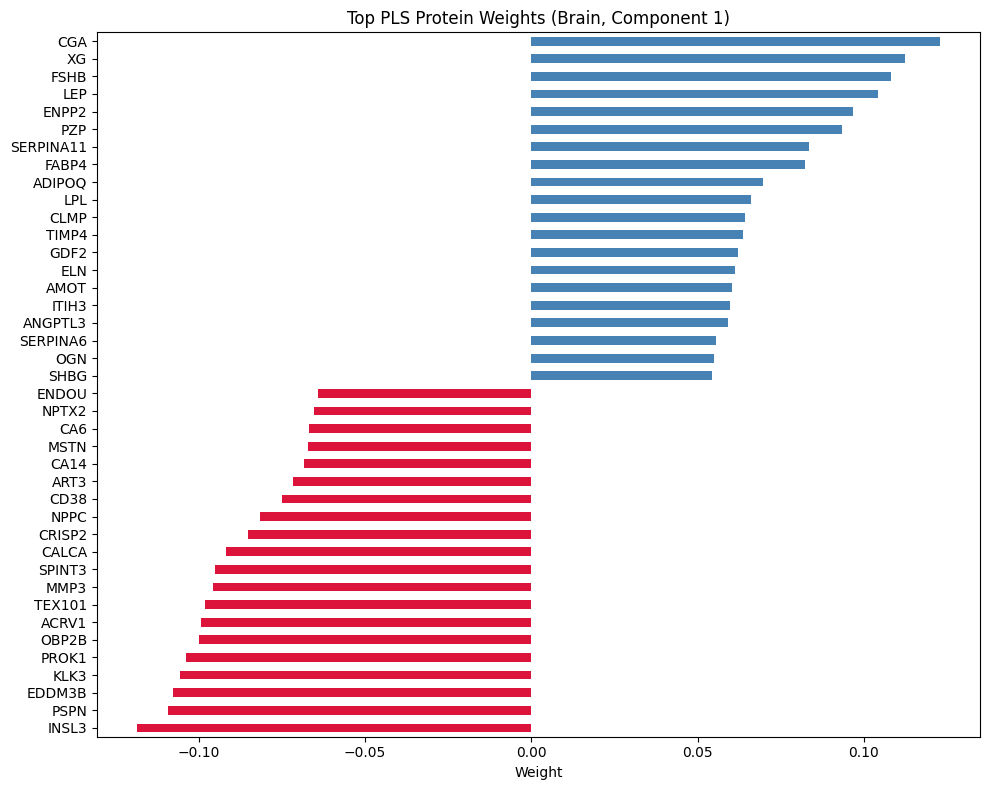

In [52]:
sorted_weights = protein_weights.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 8))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights (Brain, Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [24]:
# Extract weights
pheno_weights = pd.Series(
    pls_model.y_weights_.flatten(),
    index=Y_brain_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_pheno = pheno_weights.abs().sort_values(ascending=False).head(20)

# Display top 20 proteins (with their signed weights)
print(pheno_weights.loc[top_pheno.index])


Volume_TotalGray_Whole_Brain                    -0.076260
Volume_BrainSeg_Whole_Brain                     -0.076223
Volume_BrainSegNotVentSurf_Whole_Brain          -0.075719
Volume_BrainSegNotVent_Whole_Brain              -0.075419
Volume_SupraTentorial_Whole_Brain               -0.074700
Volume_SupraTentorialNotVent_Whole_Brain        -0.073883
Volume_EstimatedTotalIntraCranial_Whole_Brain   -0.071747
Volume_SubCortGray_Whole_Brain                  -0.070269
Volume_Cortex_Left_Hemisphere                   -0.070241
Volume_Cortex_Right_Hemisphere                  -0.069907
Volume_CerebralWhiteMatter_Right_Hemisphere     -0.067846
Volume_CerebralWhiteMatter_Left_Hemisphere      -0.067504
Volume_Cerebellum_Cortex_Right_Hemisphere       -0.066530
Volume_VentralDC_Right_Hemisphere               -0.066285
Volume_VentralDC_Left_Hemisphere                -0.065402
Volume_Cerebellum_Cortex_Left_Hemisphere        -0.063832
Volume_Brain_Stem_Whole_Brain                   -0.063300
Area_SuperiorF

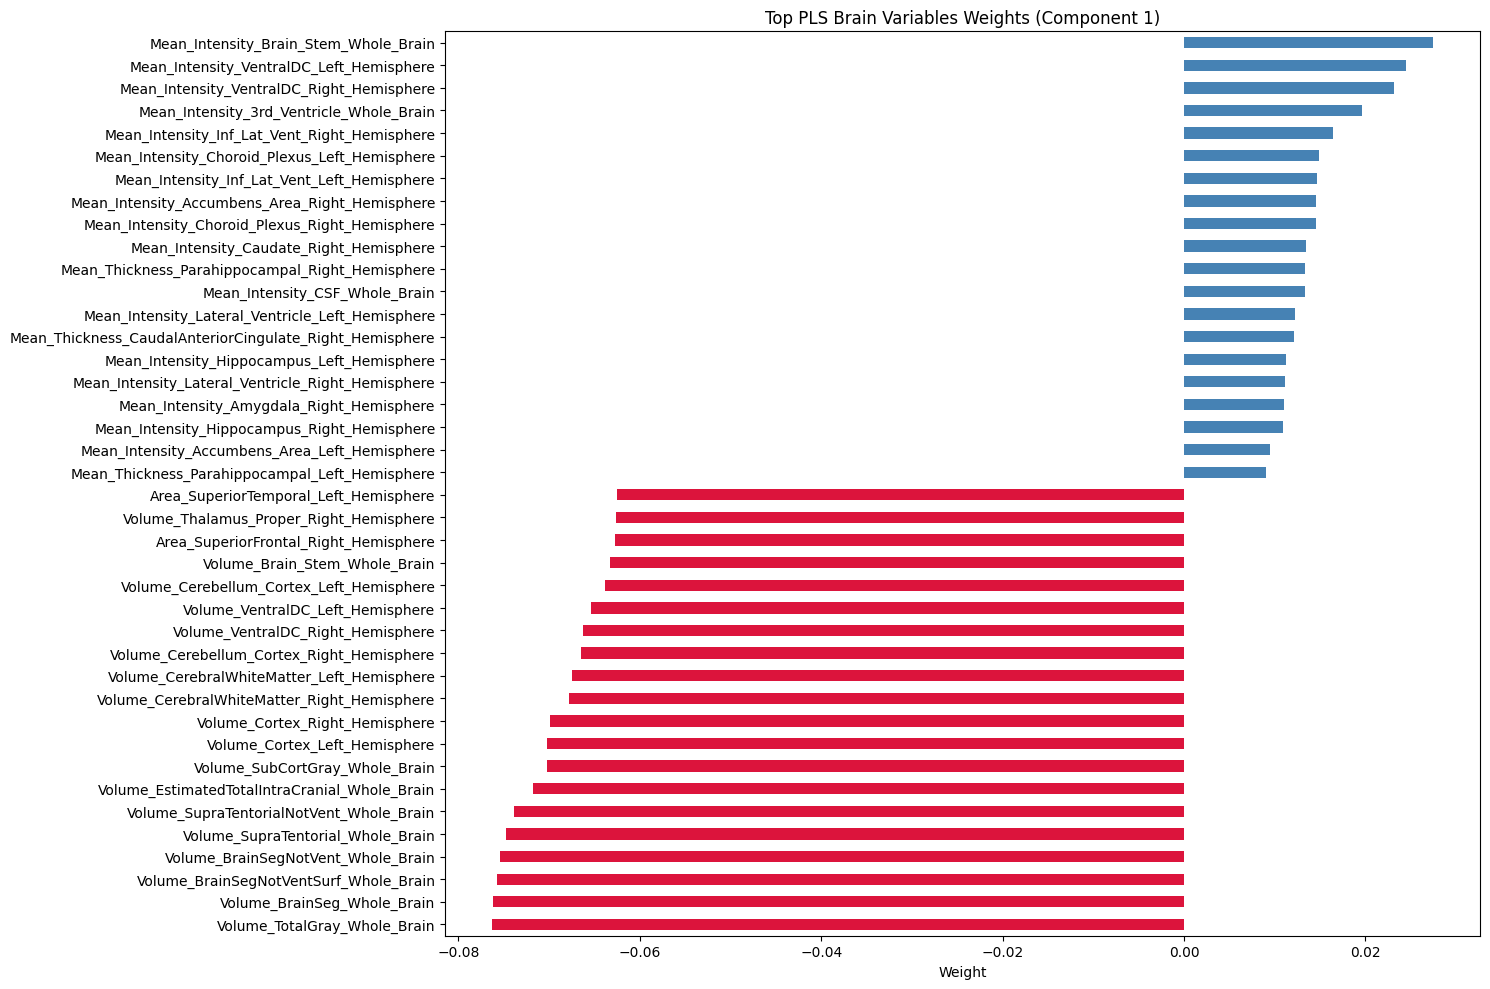

In [54]:
sorted_weights = pheno_weights.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(15, 10))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Brain Variables Weights (Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

### **removed the first principal component (PC1) across proteins**

In [25]:
# 1. Standardize protein data
X_standardized = (X_brain_clean - X_brain_clean.mean()) / X_brain_clean.std()

In [26]:
# 2. Run PCA and extract the first principal component
pca = PCA(n_components=1)
pc1 = pca.fit_transform(X_standardized)

In [27]:
# 3. Regress out PC1 from each protein
X_residualized = pd.DataFrame(index=X_standardized.index, columns=X_standardized.columns)

In [28]:
for col in X_standardized.columns:
    model = LinearRegression()
    model.fit(pc1, X_standardized[col])
    predicted = model.predict(pc1)
    residual = X_standardized[col] - predicted
    X_residualized[col] = residual

In [29]:
# 4. the residualized protein data
X_residualized = X_residualized.astype(float)

In [30]:
print("Original X shape:", X_brain_clean.shape)
print("Residualized X shape:", X_residualized.shape)

Original X shape: (4698, 2923)
Residualized X shape: (4698, 2923)


In [31]:
# 1. Split the residualized data
X_train_resid, X_test_resid, Y_train_resid, Y_test_resid = train_test_split(
    X_residualized, Y_brain_clean, test_size=0.2, random_state=42
)

In [32]:
# 2. Define and fit the PLS model
pls_model_resid = PLSRegression(n_components=1)
pls_model_resid.fit(X_train_resid, Y_train_resid)

PLSRegression(n_components=1)

In [33]:
# 3. Predict on the test set
Y_pred_resid = pls_model_resid.predict(X_test_resid)


In [34]:
# 4. Evaluate performance
r2_resid = r2_score(Y_test_resid, Y_pred_resid)
r2_resid


0.06642132748609855

In [35]:
# 5. Extract top X weights (proteins)
protein_weights_resid = pd.Series(
    pls_model_resid.x_weights_.flatten(),
    index=X_residualized.columns,
    name="PLS_Component_1_Weight"
)
top_proteins_resid = protein_weights_resid.abs().sort_values(ascending=False).head(10)
top_protein_weights = protein_weights_resid.loc[top_proteins_resid.index]
top_protein_weights


CGA       0.120418
INSL3    -0.115704
XG        0.110088
PSPN     -0.106130
FSHB      0.105864
EDDM3B   -0.105122
LEP       0.102720
KLK3     -0.102444
PROK1    -0.101545
OBP2B    -0.097778
Name: PLS_Component_1_Weight, dtype: float64

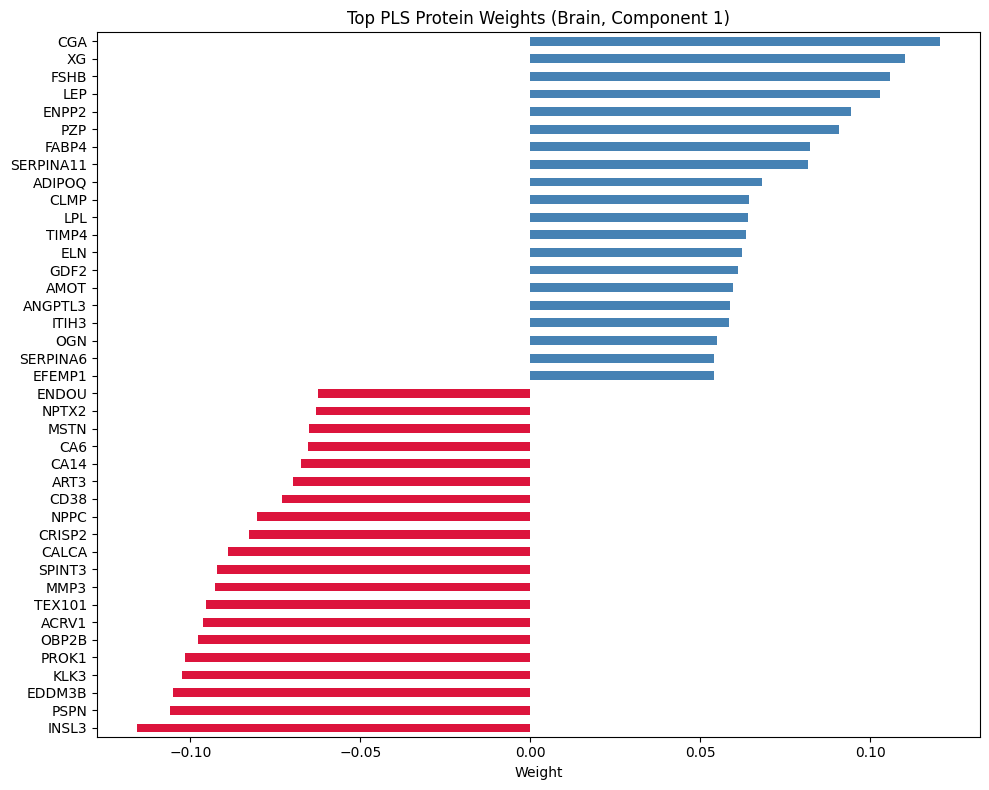

In [36]:
sorted_weights = protein_weights_resid.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 8))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights (Brain, Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [37]:
# 6. Extract top Y weights (phenotypes)
pheno_weights_resid = pd.Series(
    pls_model_resid.y_weights_.flatten(),
    index=Y_brain_clean.columns,
    name="PLS_Component_1_Weight"
)
top_pheno_resid = pheno_weights_resid.abs().sort_values(ascending=False).head(20)
top_pheno_weights = pheno_weights_resid.loc[top_pheno_resid.index]

top_pheno_weights

Volume_TotalGray_Whole_Brain                    -0.080009
Volume_BrainSegNotVentSurf_Whole_Brain          -0.079775
Volume_BrainSeg_Whole_Brain                     -0.079761
Volume_BrainSegNotVent_Whole_Brain              -0.079482
Volume_SupraTentorial_Whole_Brain               -0.078043
Volume_SupraTentorialNotVent_Whole_Brain        -0.077751
Volume_EstimatedTotalIntraCranial_Whole_Brain   -0.074412
Volume_SubCortGray_Whole_Brain                  -0.074306
Volume_Cortex_Left_Hemisphere                   -0.073675
Volume_Cortex_Right_Hemisphere                  -0.073204
Volume_CerebralWhiteMatter_Right_Hemisphere     -0.071575
Volume_CerebralWhiteMatter_Left_Hemisphere      -0.071297
Volume_VentralDC_Right_Hemisphere               -0.070661
Volume_VentralDC_Left_Hemisphere                -0.070178
Volume_Cerebellum_Cortex_Right_Hemisphere       -0.069706
Volume_Brain_Stem_Whole_Brain                   -0.067336
Volume_Cerebellum_Cortex_Left_Hemisphere        -0.067217
Volume_Thalamu

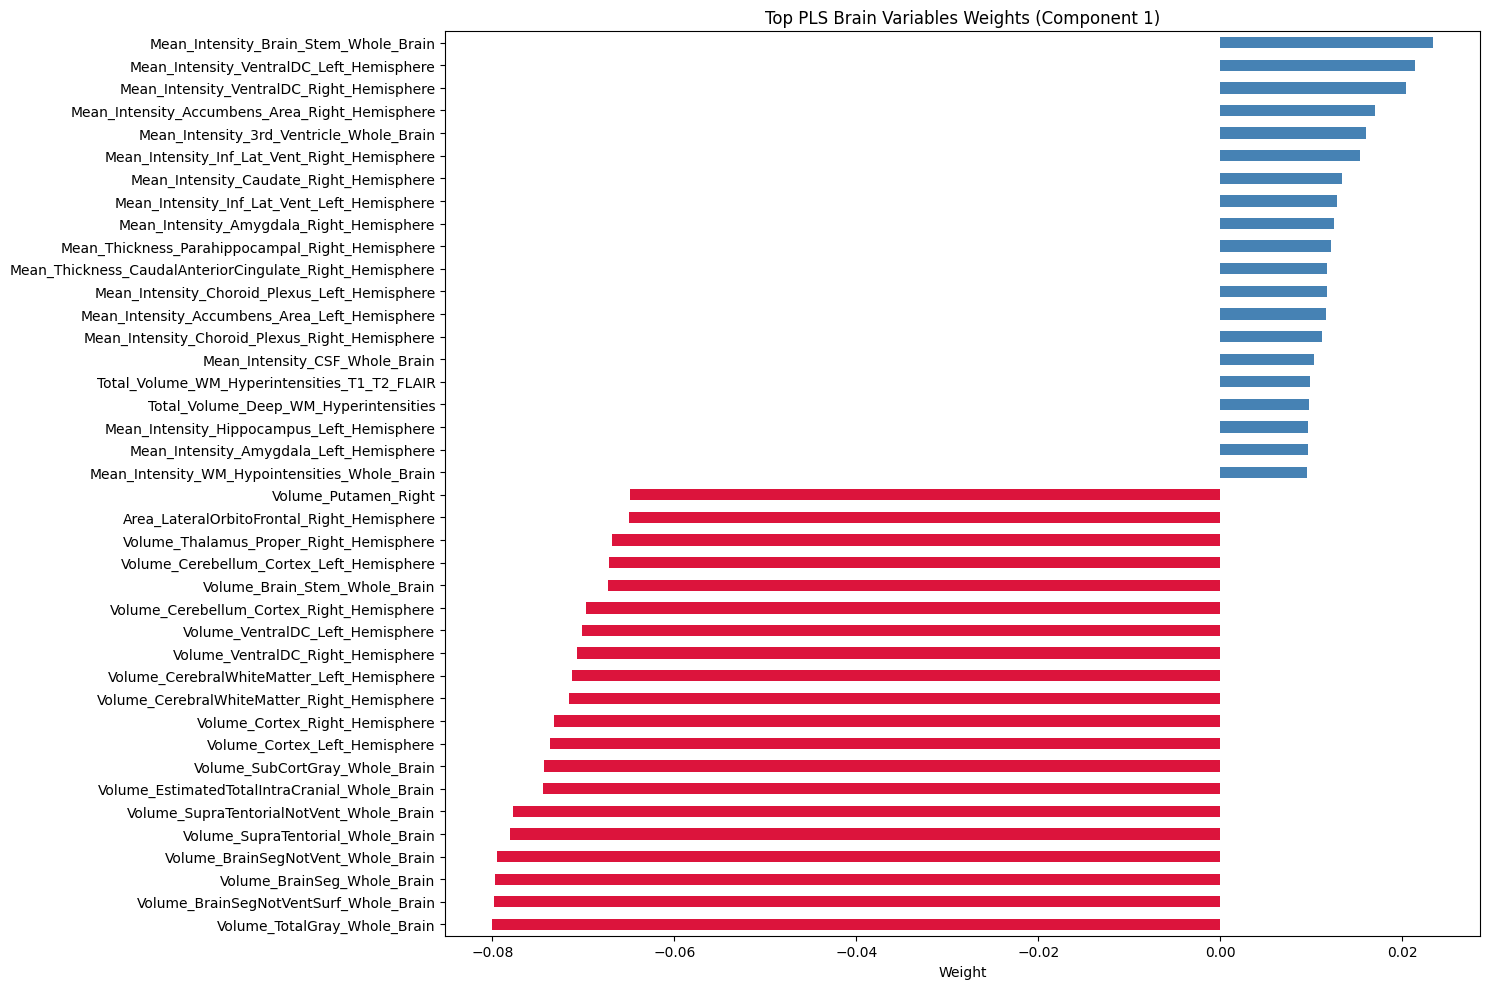

In [68]:
sorted_weights = pheno_weights_resid.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(15, 10))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Brain Variables Weights (Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [70]:
Immune_pheno = r"C:\Users\Romina\OneDrive\Desktop\Project\Clean Notebooks and files\correct but original immune data.csv"
Immune_pheno = pd.read_csv(Immune_pheno)

In [71]:
Immune_pheno

,eid,30000-0.0,30000-1.0,30000-2.0,30120-0.0,30120-1.0,30120-2.0,30130-0.0,30130-1.0,30130-2.0,...,30200-1.0,30200-2.0,30210-0.0,30210-1.0,30210-2.0,30220-0.0,30220-1.0,30220-2.0,30710-0.0,30710-1.0
0,1000018,5.22,NaN,NaN,1.89,NaN,NaN,0.27,NaN,NaN,...,NaN,NaN,1.81,NaN,NaN,0.31,NaN,NaN,0.79,NaN
1,1000024,7.50,NaN,NaN,2.00,NaN,NaN,0.60,NaN,NaN,...,NaN,NaN,8.80,NaN,NaN,0.30,NaN,NaN,0.39,NaN
2,1000031,8.27,NaN,NaN,2.94,NaN,NaN,0.62,NaN,NaN,...,NaN,NaN,2.84,NaN,NaN,3.21,NaN,NaN,0.72,NaN
3,1000043,5.22,NaN,NaN,1.60,NaN,NaN,0.31,NaN,NaN,...,NaN,NaN,1.85,NaN,NaN,0.56,NaN,NaN,0.75,NaN
4,1000059,7.70,NaN,NaN,1.40,NaN,NaN,0.20,NaN,NaN,...,NaN,NaN,2.00,NaN,NaN,0.10,NaN,NaN,1.63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394663,4946719,5.19,NaN,NaN,1.31,NaN,NaN,0.40,NaN,NaN,...,NaN,NaN,1.57,NaN,NaN,0.28,NaN,NaN,NaN,NaN
394664,4946727,6.19,NaN,NaN,1.03,NaN,NaN,0.48,NaN,NaN,...,NaN,NaN,5.03,NaN,NaN,0.70,NaN,NaN,0.72,NaN
394665,4946736,4.57,NaN,NaN,2.17,NaN,NaN,0.26,NaN,NaN,...,NaN,NaN,1.84,NaN,NaN,0.46,NaN,NaN,6.86,NaN
394666,4946742,5.80,NaN,NaN,1.70,NaN,NaN,0.40,NaN,NaN,...,NaN,NaN,3.00,NaN,NaN,0.20,NaN,NaN,1.23,NaN


In [75]:
# keep only shared participants
shared_eids = set(proteomics_df['eid']).intersection(set(Immune_pheno['eid']))
print(f"shared eids: {len(shared_eids)}")

shared eids: 41305


In [76]:
shared_eids = set(proteomics_df['eid']).intersection(set(Immune_pheno['eid']))
proteomics_shared = proteomics_df[proteomics_df['eid'].isin(shared_eids)].copy()
Immune_pheno_shared = Immune_pheno[Immune_pheno['eid'].isin(shared_eids)].copy()

In [77]:
Immune_merged_df = pd.merge(proteomics_shared, Immune_pheno_shared, on="eid", how="inner")

In [78]:
Immune_merged_df

,eid,Sex,Ethnic_background,Age_at_recruitment,Diagnoses_main_ICD10,Diagnoses_main_ICD10_1,Diagnoses_main_ICD10_2,Diagnoses_main_ICD10_3,Diagnoses_main_ICD10_4,Diagnoses_main_ICD10_5,...,30200-1.0,30200-2.0,30210-0.0,30210-1.0,30210-2.0,30220-0.0,30220-1.0,30220-2.0,30710-0.0,30710-1.0
0,1000024,0,1001.0,67,F019,G309,I48,I620,I639,M169,...,NaN,NaN,8.80,NaN,NaN,0.30,NaN,NaN,0.39,NaN
1,1000043,1,1001.0,65,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.85,NaN,NaN,0.56,NaN,NaN,0.75,NaN
2,1000156,0,1001.0,62,E871,H258,H269,R074,NaN,NaN,...,NaN,NaN,1.60,NaN,NaN,0.30,NaN,NaN,4.16,NaN
3,1000217,1,1003.0,63,C060,I269,R509,R69,NaN,NaN,...,NaN,NaN,1.40,NaN,NaN,0.35,NaN,NaN,1.79,NaN
4,1000309,1,4002.0,60,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12.70,NaN,NaN,0.30,NaN,NaN,0.27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41300,4946434,0,1001.0,62,A419,C509,G510,H042,I48,J690,...,NaN,NaN,1.44,NaN,NaN,0.40,NaN,NaN,1.26,NaN
41301,4946496,1,1001.0,67,C19,D124,D126,D235,I251,K029,...,NaN,NaN,3.84,NaN,NaN,0.38,NaN,NaN,0.71,NaN
41302,4946567,0,1001.0,41,A419,B59,C910,D728,J100,K635,...,NaN,NaN,9.49,NaN,NaN,0.67,NaN,NaN,0.59,NaN
41303,4946648,0,1001.0,53,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.51,NaN,NaN,0.27,NaN,NaN,1.47,NaN


In [81]:
Immune_cols_of_interest = ["30000-0.0", "30000-1.0", "30000-2.0"]
features_df = Immune_pheno_shared[Immune_pheno_shared[Immune_cols_of_interest].notna().any(axis=1)].copy()

In [82]:
start_col = "30000-0.0"
start_idx = list(features_df.columns).index(start_col)
features_cols_to_preprocess = features_df.columns[start_idx:]
features_cols_to_preprocess = features_cols_to_preprocess.drop("eid", errors="ignore")

In [83]:
# Missing value filter (≤50% missing)
missing_ratio = features_df[features_cols_to_preprocess].isna().mean()
columns_to_keep = missing_ratio[missing_ratio <= 0.5].index.tolist()

In [84]:
# Keep eid + valid imaging columns
columns_to_keep = ['eid'] + columns_to_keep
features_df = features_df[columns_to_keep]

In [85]:
numeric_cols = features_df.select_dtypes(include=[np.number]).columns.difference(['eid'])
z_scores = features_df[numeric_cols].apply(zscore)
features_df[numeric_cols] = features_df[numeric_cols].mask((z_scores > 3) | (z_scores < -3))

In [86]:
features_df[numeric_cols] = features_df[numeric_cols].fillna(features_df[numeric_cols].mean())

In [87]:
features_df

,eid,30000-0.0,30120-0.0,30130-0.0,30140-0.0,30150-0.0,30160-0.0,30180-0.0,30190-0.0,30200-0.0,30210-0.0,30220-0.0,30710-0.0
1,1000024,7.50,2.00,0.60,4.20,0.70,0.00,27.00,7.50,56.40,8.80,0.30,0.39
3,1000043,5.22,1.60,0.31,3.18,0.10,0.03,30.56,5.92,61.00,1.85,0.56,0.75
14,1000156,4.30,1.20,0.20,2.90,0.10,0.00,26.90,4.80,66.40,1.60,0.30,4.16
20,1000217,3.96,1.27,0.35,2.26,0.06,0.01,32.16,8.87,57.10,1.40,0.35,1.79
29,1000309,6.12,2.72,0.43,2.18,0.78,0.02,44.40,7.01,35.57,12.70,0.30,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394635,4946434,8.33,1.96,0.33,5.89,0.12,0.03,23.54,4.01,70.70,1.44,0.40,1.26
394641,4946496,9.68,2.92,0.55,5.81,0.37,0.04,30.12,5.71,60.00,3.84,0.38,0.71
394648,4946567,6.66,2.43,0.91,2.64,0.63,0.04,36.52,13.67,39.60,9.49,0.67,0.59
394656,4946648,4.37,1.49,0.44,2.36,0.07,0.01,34.12,10.15,54.00,1.51,0.27,1.47


In [88]:
rename_dict = {
    "30000-0.0": "WBC count", "30120-0.0": "Lymphocyte count", "30130-0.0": "Monocyte count", "30140-0.0": "Neutrophil count", "30150-0.0": "Eosinophil count", "30160-0.0": "Basophil count",
    "30180-0.0": "Lymphocyte percentage", "30190-0.0": "Monocyte percentage", "30200-0.0": "Neutrophil percentage","30210-0.0": "Eosinophil percentage", "30220-0.0": "Basophil percentage", "30710-0.0": "C-reactive protein"
}

features_df.rename(columns=rename_dict, inplace=True)

In [89]:
features_df

,eid,WBC count,Lymphocyte count,Monocyte count,Neutrophil count,Eosinophil count,Basophil count,Lymphocyte percentage,Monocyte percentage,Neutrophil percentage,Eosinophil percentage,Basophil percentage,C-reactive protein
1,1000024,7.50,2.00,0.60,4.20,0.70,0.00,27.00,7.50,56.40,8.80,0.30,0.39
3,1000043,5.22,1.60,0.31,3.18,0.10,0.03,30.56,5.92,61.00,1.85,0.56,0.75
14,1000156,4.30,1.20,0.20,2.90,0.10,0.00,26.90,4.80,66.40,1.60,0.30,4.16
20,1000217,3.96,1.27,0.35,2.26,0.06,0.01,32.16,8.87,57.10,1.40,0.35,1.79
29,1000309,6.12,2.72,0.43,2.18,0.78,0.02,44.40,7.01,35.57,12.70,0.30,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394635,4946434,8.33,1.96,0.33,5.89,0.12,0.03,23.54,4.01,70.70,1.44,0.40,1.26
394641,4946496,9.68,2.92,0.55,5.81,0.37,0.04,30.12,5.71,60.00,3.84,0.38,0.71
394648,4946567,6.66,2.43,0.91,2.64,0.63,0.04,36.52,13.67,39.60,9.49,0.67,0.59
394656,4946648,4.37,1.49,0.44,2.36,0.07,0.01,34.12,10.15,54.00,1.51,0.27,1.47


In [90]:
Immune_final_df = pd.merge(Brain_final_df, features_df, on="eid", how="left")

In [91]:
Immune_final_df

,eid,Sex,Ethnic_background,Age_at_recruitment,Diagnoses_main_ICD10,Diagnoses_main_ICD10_1,Diagnoses_main_ICD10_2,Diagnoses_main_ICD10_3,Diagnoses_main_ICD10_4,Diagnoses_main_ICD10_5,...,Monocyte count,Neutrophil count,Eosinophil count,Basophil count,Lymphocyte percentage,Monocyte percentage,Neutrophil percentage,Eosinophil percentage,Basophil percentage,C-reactive protein
0,1000024,0,1001.0,67,F019,G309,I48,I620,I639,M169,...,0.60,4.20,0.70,0.00,27.00,7.50,56.40,8.80,0.30,0.39
1,1000043,1,1001.0,65,NaN,NaN,NaN,NaN,NaN,NaN,...,0.31,3.18,0.10,0.03,30.56,5.92,61.00,1.85,0.56,0.75
2,1000156,0,1001.0,62,E871,H258,H269,R074,NaN,NaN,...,0.20,2.90,0.10,0.00,26.90,4.80,66.40,1.60,0.30,4.16
3,1000217,1,1003.0,63,C060,I269,R509,R69,NaN,NaN,...,0.35,2.26,0.06,0.01,32.16,8.87,57.10,1.40,0.35,1.79
4,1000309,1,4002.0,60,NaN,NaN,NaN,NaN,NaN,NaN,...,0.43,2.18,0.78,0.02,44.40,7.01,35.57,12.70,0.30,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41300,4946434,0,1001.0,62,A419,C509,G510,H042,I48,J690,...,0.33,5.89,0.12,0.03,23.54,4.01,70.70,1.44,0.40,1.26
41301,4946496,1,1001.0,67,C19,D124,D126,D235,I251,K029,...,0.55,5.81,0.37,0.04,30.12,5.71,60.00,3.84,0.38,0.71
41302,4946567,0,1001.0,41,A419,B59,C910,D728,J100,K635,...,0.91,2.64,0.63,0.04,36.52,13.67,39.60,9.49,0.67,0.59
41303,4946648,0,1001.0,53,NaN,NaN,NaN,NaN,NaN,NaN,...,0.44,2.36,0.07,0.01,34.12,10.15,54.00,1.51,0.27,1.47


## **PLS model for Immune (all possible participants)**

In [92]:
Immune_final_df["immune features"] = Immune_final_df["WBC count"].notna().astype(int)

In [93]:
Immune_final_df

,eid,Sex,Ethnic_background,Age_at_recruitment,Diagnoses_main_ICD10,Diagnoses_main_ICD10_1,Diagnoses_main_ICD10_2,Diagnoses_main_ICD10_3,Diagnoses_main_ICD10_4,Diagnoses_main_ICD10_5,...,Neutrophil count,Eosinophil count,Basophil count,Lymphocyte percentage,Monocyte percentage,Neutrophil percentage,Eosinophil percentage,Basophil percentage,C-reactive protein,immune features
0,1000024,0,1001.0,67,F019,G309,I48,I620,I639,M169,...,4.20,0.70,0.00,27.00,7.50,56.40,8.80,0.30,0.39,1
1,1000043,1,1001.0,65,NaN,NaN,NaN,NaN,NaN,NaN,...,3.18,0.10,0.03,30.56,5.92,61.00,1.85,0.56,0.75,1
2,1000156,0,1001.0,62,E871,H258,H269,R074,NaN,NaN,...,2.90,0.10,0.00,26.90,4.80,66.40,1.60,0.30,4.16,1
3,1000217,1,1003.0,63,C060,I269,R509,R69,NaN,NaN,...,2.26,0.06,0.01,32.16,8.87,57.10,1.40,0.35,1.79,1
4,1000309,1,4002.0,60,NaN,NaN,NaN,NaN,NaN,NaN,...,2.18,0.78,0.02,44.40,7.01,35.57,12.70,0.30,0.27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41300,4946434,0,1001.0,62,A419,C509,G510,H042,I48,J690,...,5.89,0.12,0.03,23.54,4.01,70.70,1.44,0.40,1.26,1
41301,4946496,1,1001.0,67,C19,D124,D126,D235,I251,K029,...,5.81,0.37,0.04,30.12,5.71,60.00,3.84,0.38,0.71,1
41302,4946567,0,1001.0,41,A419,B59,C910,D728,J100,K635,...,2.64,0.63,0.04,36.52,13.67,39.60,9.49,0.67,0.59,1
41303,4946648,0,1001.0,53,NaN,NaN,NaN,NaN,NaN,NaN,...,2.36,0.07,0.01,34.12,10.15,54.00,1.51,0.27,1.47,1


In [ ]:
Immune_final_df.to_csv("Immune and Brain variables with proteomics data.csv", index=False)

In [94]:
Immune_pheno = Immune_final_df[Immune_final_df["immune features"] == 1].copy()
print("Number of participants with immune features", Immune_pheno.shape[0])

Number of participants with immune features 40021


In [259]:
# Protein columns
protein_cols = Immune_pheno.loc[:, "A1BG": "ZPR1"].columns
X_immune_all = Immune_pheno[protein_cols]

In [260]:
start_col = "WBC count"
end_col = "C-reactive protein"
immune_all_outcome_cols = Immune_pheno.loc[:, start_col:end_col].columns

In [261]:
Y_immune_all = Immune_pheno[immune_all_outcome_cols]

In [262]:
print("X shape:", X_immune_all.shape)
print("Y shape:", Y_immune_all.shape)

X shape: (40021, 2923)
Y shape: (40021, 12)


In [263]:
X_immune_all_clean = X_immune_all.dropna()
Y_immune_all_clean = Y_immune_all.loc[X_immune_all_clean.index].dropna()

X_immune_all_clean = X_immune_all_clean.loc[Y_immune_all_clean.index]
print("Clean X shape:", X_immune_all_clean.shape)
print("Clean Y shape:", Y_immune_all_clean.shape)

Clean X shape: (40021, 2923)
Clean Y shape: (40021, 12)


In [264]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_immune_all_clean, Y_immune_all_clean, test_size=0.2, random_state=42
)

pls_model = PLSRegression(n_components=1)

pls_model.fit(X_train, Y_train)

Y_pred = pls_model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print("PLS Regression Test R² Score:", r2)

PLS Regression Test R² Score: 0.032086184701126785


In [265]:
# Extract weights
protein_weights = pd.Series(
    pls_model.x_weights_.flatten(),
    index=X_immune_all_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_proteins = protein_weights.abs().sort_values(ascending=False).head(10)

print(protein_weights.loc[top_proteins.index])

OSM        0.091968
TGFA       0.088667
MMP9       0.081362
HGF        0.079972
CEACAM8    0.077276
CLEC4D     0.076096
MMP8       0.070268
PGLYRP1    0.067914
PLAUR      0.067657
LCN2       0.063975
Name: PLS_Component_1_Weight, dtype: float64


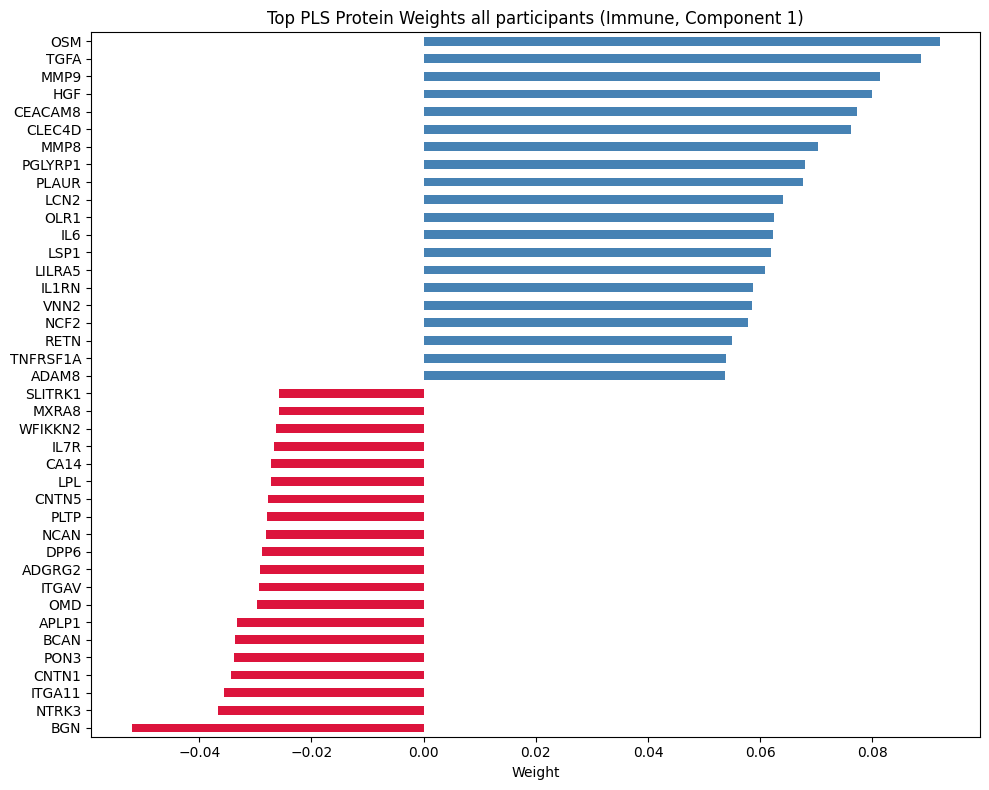

In [170]:
sorted_weights = protein_weights.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 8))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights all participants (Immune, Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [ ]:
# Extract weights
pheno_weights = pd.Series(
    pls_model.y_weights_.flatten(),
    index=Y_immune_all_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_pheno = pheno_weights.abs().sort_values(ascending=False).head(12)

# Display top 20 proteins (with their signed weights)
print(pheno_weights.loc[top_pheno.index])


WBC count                0.018561
Neutrophil count         0.018002
C-reactive protein       0.014595
Monocyte count           0.012123
Eosinophil count         0.008782
Lymphocyte count         0.007379
Lymphocyte percentage   -0.007009
Neutrophil percentage    0.005240
Basophil count           0.005054
Eosinophil percentage    0.002778
Monocyte percentage      0.001188
Basophil percentage     -0.000692
Name: PLS_Component_1_Weight, dtype: float64


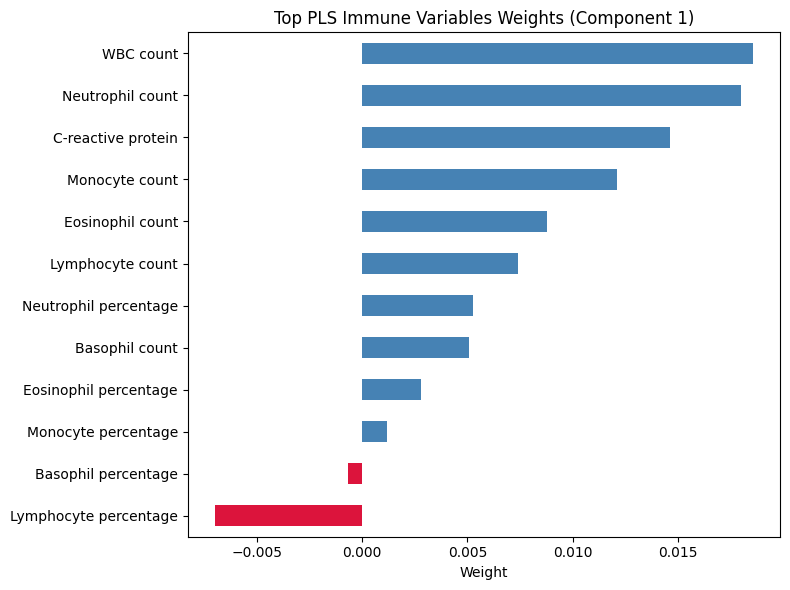

In [172]:
sorted_weights = pheno_weights.sort_values()
#top_n = 12
top_weights = sorted_weights
plt.figure(figsize=(8, 6))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Immune Variables Weights (Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

negative weight for lymphocyte percentage in the presence of positive weights for inflammatory markers like CRP and neutrophils is biologically meaningful and expected.

### **removed the first principal component (PC1) across proteins**

In [266]:
# 1. Standardize protein data
X_standardized = (X_immune_all_clean - X_immune_all_clean.mean()) / X_immune_all_clean.std()

In [267]:
# 2. Run PCA and extract the first principal component
pca = PCA(n_components=1)
pc1 = pca.fit_transform(X_standardized)

In [268]:
# 3. Regress out PC1 from each protein
X_residualized = pd.DataFrame(index=X_standardized.index, columns=X_standardized.columns)
for col in X_standardized.columns:
    model = LinearRegression()
    model.fit(pc1, X_standardized[col])
    predicted = model.predict(pc1)
    residual = X_standardized[col] - predicted
    X_residualized[col] = residual

In [269]:
# 4. the residualized protein data
X_residualized = X_residualized.astype(float)

In [270]:
print("Original X shape:", X_immune_all_clean.shape)
print("Residualized X shape:", X_residualized.shape)

Original X shape: (40021, 2923)
Residualized X shape: (40021, 2923)


In [271]:
# 1. Split the residualized data
X_train_resid, X_test_resid, Y_train_resid, Y_test_resid = train_test_split(
    X_residualized, Y_immune_all_clean, test_size=0.2, random_state=42
)

In [272]:
# 2. Define and fit the PLS model
pls_model_resid = PLSRegression(n_components=1)
pls_model_resid.fit(X_train_resid, Y_train_resid)

PLSRegression(n_components=1)

In [273]:
# 3. Predict on the test set
Y_pred_resid = pls_model_resid.predict(X_test_resid)

In [274]:
# 4. Evaluate performance
r2_resid = r2_score(Y_test_resid, Y_pred_resid)
r2_resid

0.04625752986847983

In [275]:
# 5. Extract top X weights (proteins)
protein_weights_resid = pd.Series(
    pls_model_resid.x_weights_.flatten(),
    index=X_residualized.columns,
    name="PLS_Component_1_Weight"
)
top_proteins_resid = protein_weights_resid.abs().sort_values(ascending=False).head(10)
top_protein_weights = protein_weights_resid.loc[top_proteins_resid.index]
top_protein_weights

OSM        0.114041
TGFA       0.107933
MMP9       0.100860
HGF        0.094310
CLEC4D     0.094044
CEACAM8    0.093975
MMP8       0.085120
PGLYRP1    0.082929
PLAUR      0.080459
LCN2       0.078108
Name: PLS_Component_1_Weight, dtype: float64

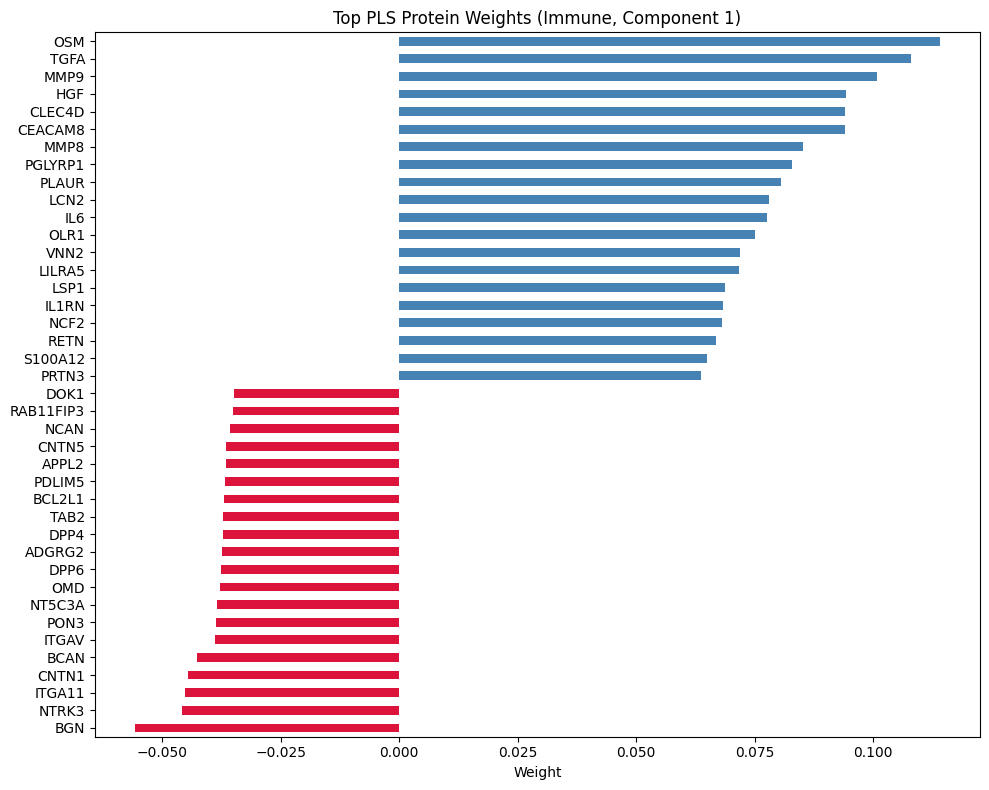

In [110]:
sorted_weights = protein_weights_resid.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 8))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights (Immune, Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [276]:
# 6. Extract top Y weights (phenotypes)
pheno_weights_resid = pd.Series(
    pls_model_resid.y_weights_.flatten(),
    index=Y_immune_all_clean.columns,
    name="PLS_Component_1_Weight"
)
top_pheno_resid = pheno_weights_resid.abs().sort_values(ascending=False).head(20)
top_pheno_weights = pheno_weights_resid.loc[top_pheno_resid.index]

top_pheno_weights

Neutrophil count         0.032623
WBC count                0.031956
C-reactive protein       0.029648
Monocyte count           0.022700
Lymphocyte percentage   -0.017297
Eosinophil count         0.015274
Neutrophil percentage    0.012852
Lymphocyte count         0.010248
Basophil count           0.006662
Eosinophil percentage    0.004865
Monocyte percentage      0.004320
Basophil percentage     -0.000677
Name: PLS_Component_1_Weight, dtype: float64

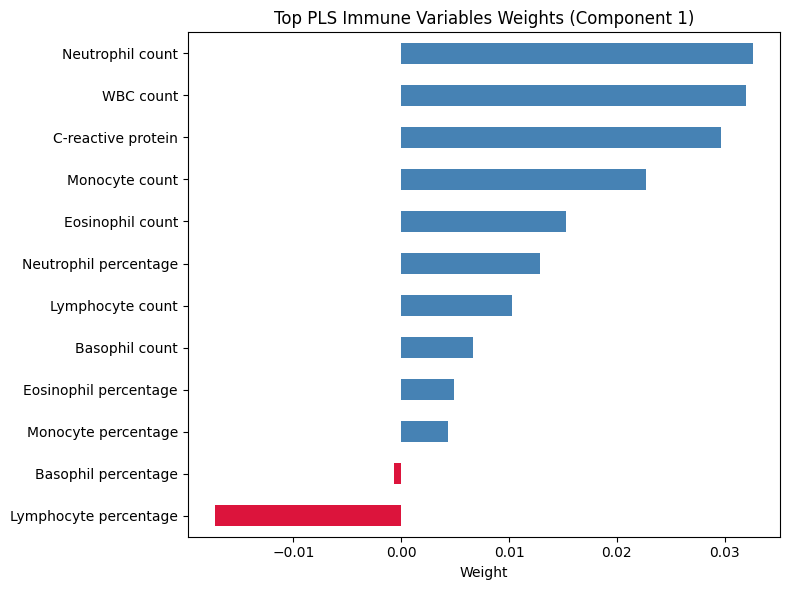

In [112]:
sorted_weights = pheno_weights_resid.sort_values()
# top_n = 20
top_weights = sorted_weights
plt.figure(figsize=(8, 6))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Immune Variables Weights (Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

## **PLS model for immune (only participants with imaging data )**

In [95]:
Immune_pheno = Immune_final_df[ (Immune_final_df["immune features"] == 1) & (Immune_final_df["imaging"] == 1)].copy()
print("Number of participants with immune variables and imaging:", Immune_pheno.shape[0])

Number of participants with immune variables and imaging: 4585


In [96]:
# Protein columns
protein_cols = Immune_pheno.loc[:, "A1BG": "ZPR1"].columns
X_immune = Immune_pheno[protein_cols]

In [97]:
start_col = "WBC count"
end_col = "C-reactive protein"
immune_outcome_cols = Immune_pheno.loc[:, start_col:end_col].columns

In [98]:
Y_immune = Immune_pheno[immune_outcome_cols]

In [99]:
print("X shape:", X_immune.shape)
print("Y shape:", Y_immune.shape)

X shape: (4585, 2923)
Y shape: (4585, 12)


In [100]:
X_immune_clean = X_immune.dropna()
Y_immune_clean = Y_immune.loc[X_immune_clean.index].dropna()

X_immune_clean = X_immune_clean.loc[Y_immune_clean.index]
print("Clean X shape:", X_immune_clean.shape)
print("Clean Y shape:", Y_immune_clean.shape)

Clean X shape: (4585, 2923)
Clean Y shape: (4585, 12)


In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_immune_clean, Y_immune_clean, test_size=0.2, random_state=42
)

pls_model = PLSRegression(n_components=1)

pls_model.fit(X_train, Y_train)

Y_pred = pls_model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print("PLS Regression Test R² Score:", r2)

PLS Regression Test R² Score: 0.015631094833067877


In [102]:
# Extract weights
protein_weights = pd.Series(
    pls_model.x_weights_.flatten(),
    index=X_immune_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_proteins = protein_weights.abs().sort_values(ascending=False).head(10)

print(protein_weights.loc[top_proteins.index])

OSM        0.101490
TGFA       0.094686
HGF        0.092954
MMP9       0.090147
CEACAM8    0.083870
LSP1       0.080401
CLEC4D     0.079149
MMP8       0.078703
OLR1       0.071705
LILRA5     0.071098
Name: PLS_Component_1_Weight, dtype: float64


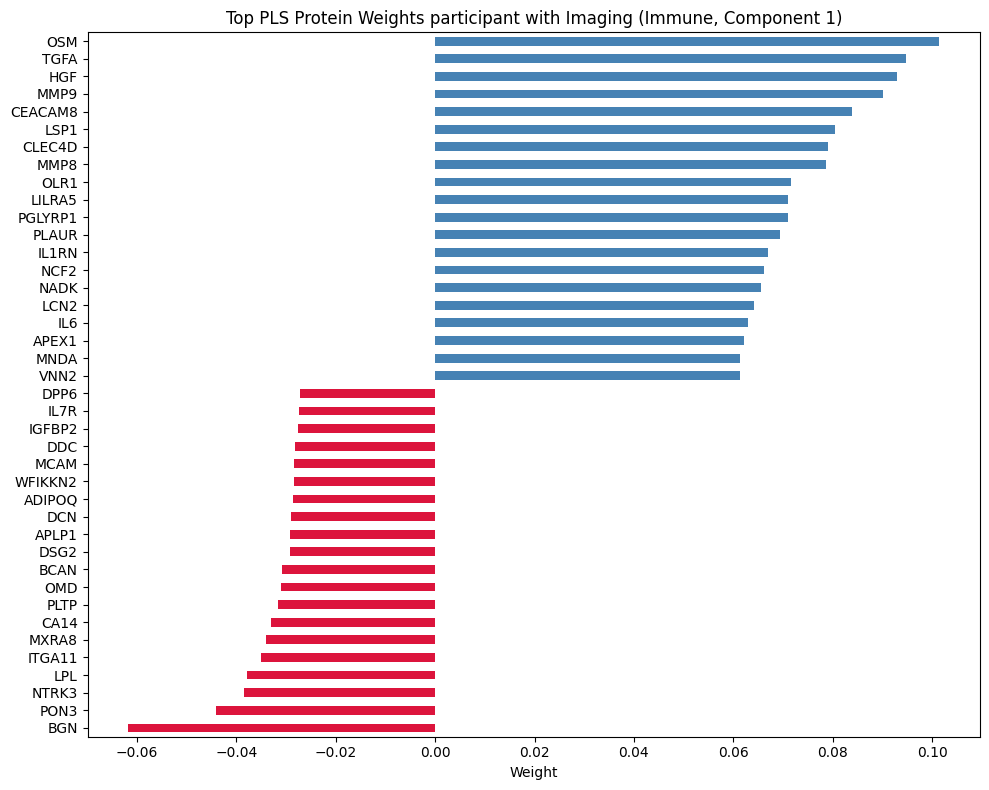

In [121]:
sorted_weights = protein_weights.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 8))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights participant with Imaging (Immune, Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [103]:
# Extract weights
pheno_weights = pd.Series(
    pls_model.y_weights_.flatten(),
    index=Y_immune_clean.columns,
    name="PLS_Component_1_Weight"
)

# Sort by absolute weight (strongest influence on component)
top_pheno = pheno_weights.abs().sort_values(ascending=False).head(12)

# Display top 20 proteins (with their signed weights)
print(pheno_weights.loc[top_pheno.index])

WBC count                0.021431
Neutrophil count         0.017265
Monocyte count           0.014437
Lymphocyte count         0.013735
C-reactive protein       0.013676
Eosinophil count         0.009541
Basophil count           0.006431
Lymphocyte percentage   -0.004240
Eosinophil percentage    0.002987
Neutrophil percentage    0.002328
Monocyte percentage      0.002189
Basophil percentage     -0.000846
Name: PLS_Component_1_Weight, dtype: float64


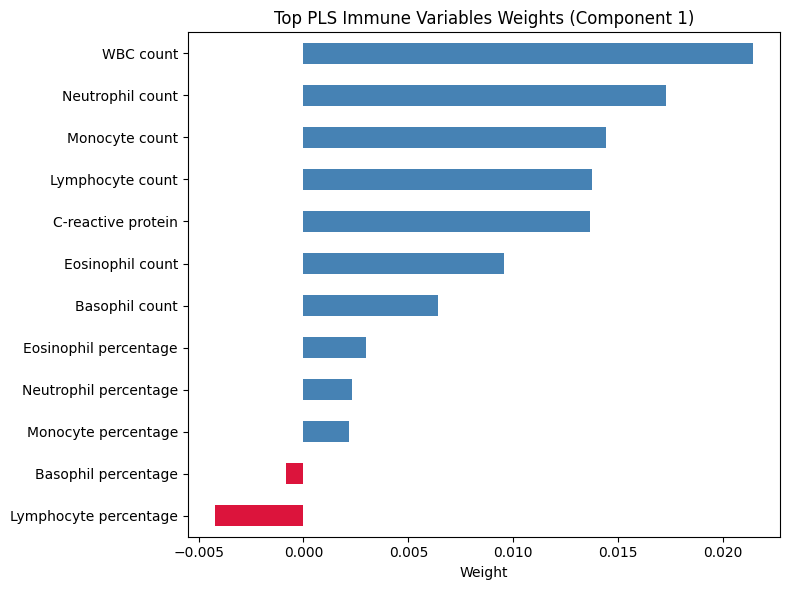

In [123]:
sorted_weights = pheno_weights.sort_values()
#top_n = 12
top_weights = sorted_weights
plt.figure(figsize=(8, 6))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Immune Variables Weights (Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

### **removed the first principal component (PC1) across proteins**

In [104]:
# 1. Standardize protein data
X_standardized = (X_immune_clean - X_immune_clean.mean()) / X_immune_clean.std()

In [105]:
# 2. Run PCA and extract the first principal component
pca = PCA(n_components=1)
pc1 = pca.fit_transform(X_standardized)

In [106]:
# 3. Regress out PC1 from each protein
X_residualized = pd.DataFrame(index=X_standardized.index, columns=X_standardized.columns)
for col in X_standardized.columns:
    model = LinearRegression()
    model.fit(pc1, X_standardized[col])
    predicted = model.predict(pc1)
    residual = X_standardized[col] - predicted
    X_residualized[col] = residual

In [107]:
# 4. the residualized protein data
X_residualized = X_residualized.astype(float)

In [108]:
print("Original X shape:", X_immune_clean.shape)
print("Residualized X shape:", X_residualized.shape)

Original X shape: (4585, 2923)
Residualized X shape: (4585, 2923)


In [109]:
# 1. Split the residualized data
X_train_resid, X_test_resid, Y_train_resid, Y_test_resid = train_test_split(
    X_residualized, Y_immune_clean, test_size=0.2, random_state=42
)

In [110]:
# 2. Define and fit the PLS model
pls_model_resid = PLSRegression(n_components=1)
pls_model_resid.fit(X_train_resid, Y_train_resid)

PLSRegression(n_components=1)

In [111]:
# 3. Predict on the test set
Y_pred_resid = pls_model_resid.predict(X_test_resid)

In [112]:
# 4. Evaluate performance
r2_resid = r2_score(Y_test_resid, Y_pred_resid)
r2_resid

0.036926881596211596

In [113]:
# 5. Extract top X weights (proteins)
protein_weights_resid = pd.Series(
    pls_model_resid.x_weights_.flatten(),
    index=X_residualized.columns,
    name="PLS_Component_1_Weight"
)
top_proteins_resid = protein_weights_resid.abs().sort_values(ascending=False).head(10)
top_protein_weights = protein_weights_resid.loc[top_proteins_resid.index]
top_protein_weights

OSM        0.128751
TGFA       0.115602
MMP9       0.114261
HGF        0.108527
CEACAM8    0.103594
CLEC4D     0.099055
MMP8       0.097726
OLR1       0.089815
LSP1       0.089644
PGLYRP1    0.087939
Name: PLS_Component_1_Weight, dtype: float64

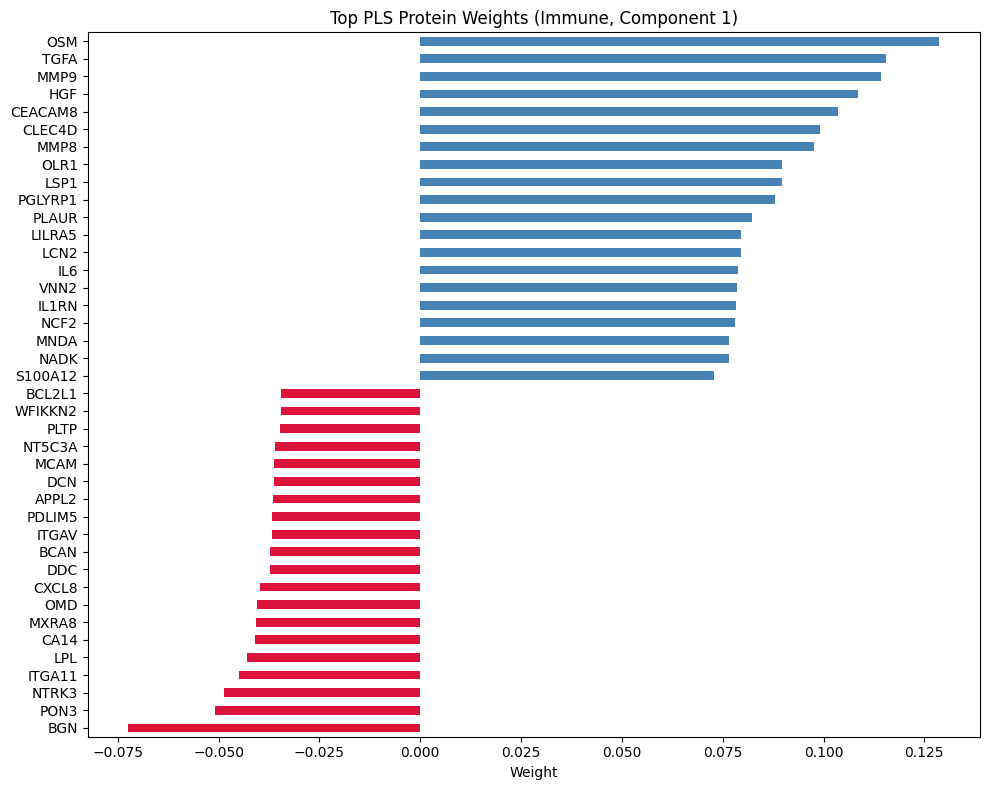

In [134]:
sorted_weights = protein_weights_resid.sort_values()
top_n = 20
top_weights = pd.concat([sorted_weights.head(top_n), sorted_weights.tail(top_n)])
plt.figure(figsize=(10, 8))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Protein Weights (Immune, Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [114]:
# 6. Extract top Y weights (phenotypes)
pheno_weights_resid = pd.Series(
    pls_model_resid.y_weights_.flatten(),
    index=Y_immune_clean.columns,
    name="PLS_Component_1_Weight"
)
top_pheno_resid = pheno_weights_resid.abs().sort_values(ascending=False).head(20)
top_pheno_weights = pheno_weights_resid.loc[top_pheno_resid.index]

top_pheno_weights

WBC count                0.051713
Neutrophil count         0.045823
C-reactive protein       0.035942
Monocyte count           0.031668
Lymphocyte count         0.026131
Eosinophil count         0.019618
Lymphocyte percentage   -0.018241
Neutrophil percentage    0.013925
Basophil count           0.011813
Eosinophil percentage    0.004156
Monocyte percentage      0.003358
Basophil percentage     -0.002111
Name: PLS_Component_1_Weight, dtype: float64

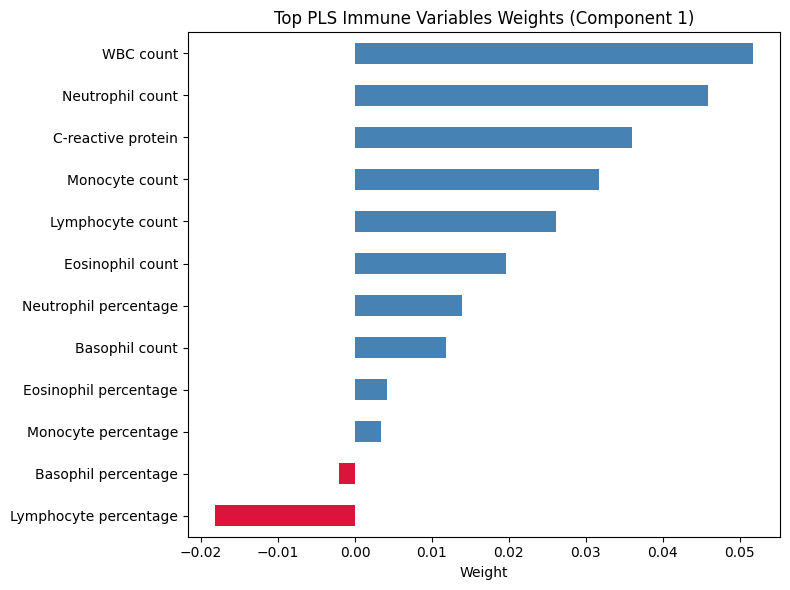

In [136]:
sorted_weights = pheno_weights_resid.sort_values()
# top_n = 20
top_weights = sorted_weights
plt.figure(figsize=(8, 6))
top_weights.plot(kind='barh', color=["crimson" if w < 0 else "steelblue" for w in top_weights])
plt.title("Top PLS Immune Variables Weights (Component 1)")
plt.xlabel("Weight")
plt.tight_layout()
plt.show()

In [38]:
pls_scores = pls_model.transform(X_brain_clean)

In [39]:
Brain_pheno_filtered = Brain_pheno.loc[X_brain_clean.index].copy() 
Brain_pheno_filtered["PLS_Brain_Component1"] = pls_scores[:, 0]

In [40]:
Brain_pheno_filtered

,eid,Sex,Ethnic_background,Age_at_recruitment,Diagnoses_main_ICD10,Diagnoses_main_ICD10_1,Diagnoses_main_ICD10_2,Diagnoses_main_ICD10_3,Diagnoses_main_ICD10_4,Diagnoses_main_ICD10_5,...,Volume_RostralAnteriorCingulate_Right_Hemisphere,Volume_RostralMiddle,Volume_Superiorfrontal_Right_Hemisphere,Volume_Superiorparietal_Right_Hemisphere,Volume_Superiortemporal_Right_Hemisphere,Volume_Supramarginal_Right_Hemisphere,Volume_Transversetemporal_Right_Hemisphere,Volume_Insula_Right_Hemisphere,imaging,PLS_Brain_Component1
1,1000043,1,1001.0,65,NaN,NaN,NaN,NaN,NaN,NaN,...,2790.0,14412.0,27460.0,11672.0,16217.0,11242.0,915.0,6353.0,1,-10.836096
9,1000773,0,1001.0,53,D124,NaN,NaN,NaN,NaN,NaN,...,3088.0,13278.0,27148.0,13325.0,18054.0,10632.0,966.0,7236.0,1,9.297626
15,1001606,1,1001.0,65,K409,K449,K575,Z092,NaN,NaN,...,3100.0,12231.0,33313.0,12440.0,17936.0,9731.0,996.0,7434.0,1,-8.857236
33,1003296,0,1001.0,54,N12,NaN,NaN,NaN,NaN,NaN,...,2972.0,11246.0,25722.0,9534.0,15631.0,9995.0,888.0,6016.0,1,8.549508
43,1003897,0,1001.0,63,F453,K449,K900,NaN,NaN,NaN,...,2509.0,10598.0,25418.0,11603.0,15049.0,10231.0,938.0,5893.0,1,1.261635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41228,4938629,0,1001.0,52,R073,R195,S3200,NaN,NaN,NaN,...,2249.0,13262.0,31694.0,10253.0,14903.0,8685.0,983.0,6546.0,1,3.354802
41231,4938712,0,1001.0,43,O16,O701,NaN,NaN,NaN,NaN,...,2406.0,10918.0,26404.0,11563.0,16986.0,11000.0,907.0,6627.0,1,5.195904
41260,4942598,0,1001.0,43,D123,K635,R073,Z121,NaN,NaN,...,2642.0,14022.0,30926.0,11406.0,15589.0,10012.0,943.0,5934.0,1,-1.945802
41265,4942789,0,1001.0,44,L721,Z121,NaN,NaN,NaN,NaN,...,2657.0,11304.0,28588.0,11818.0,16217.0,10441.0,926.0,6462.0,1,9.241706


In [41]:
icd10_codes_mapping = {
    'alzheimer': ['G300', 'G309', 'G301', 'G310'],
    'dementia': ['F000', 'F001', 'F002', 'F009', 'F010', 'F011', 'F012', 'F013', 'F018', 'F019', 'F020', 'F021', 'F022', 'F023', 'F024', 'F028'],
    'stroke': ['I689', 'I635', 'I633', 'I638', 'I634'],
    'lbd': ['G318'],  
    'ms': ['G35'],  
    'als': ['G122'],  
    'parkinson': ['G20'],
    'delirium': ['F051'],   # Overlaps with dementia in older adults 
    'neurocognitive_disorder' : ['F067'], 
    'ns_degeneration' : ['G319', 'G328']
    
    }

In [42]:
main_icd10_columns = [col for col in Brain_pheno_filtered.columns if col.startswith("Diagnoses_main_ICD10")]
secondary_icd10_columns = [col for col in Brain_pheno_filtered.columns if col.startswith("Diagnoses_secondary_ICD10")]
icd10_columns = [col for col in Brain_pheno_filtered.columns if col.startswith("Diagnoses_ICD10")]

In [43]:
all_diagnosis_columns = main_icd10_columns + secondary_icd10_columns + icd10_columns

In [44]:
def check_diagnosis(row, disease_codes, diagnosis_columns):
    for col in diagnosis_columns:
        if col in row:
            for code in disease_codes:
                if code in str(row[col]): 
                    return 1  
    return 0

In [45]:
# Binary columns for each diseases 
for disease, codes in icd10_codes_mapping.items():
    column_name = disease.lower() 
    Brain_pheno_filtered[column_name] = Brain_pheno_filtered.apply(lambda row: check_diagnosis(row, codes, all_diagnosis_columns), axis=1)

In [46]:
disease_columns = ['alzheimer', 'dementia', 'stroke', 'lbd', 'ms', 'als', 'parkinson', 'delirium', 'neurocognitive_disorder', 'ns_degeneration']
for disease in disease_columns:
    total = Brain_pheno_filtered[disease].sum()
    print(f"participants diagnosed with {disease.capitalize()}: {total}")

participants diagnosed with Alzheimer: 4
participants diagnosed with Dementia: 6
participants diagnosed with Stroke: 16
participants diagnosed with Lbd: 3
participants diagnosed with Ms: 84
participants diagnosed with Als: 4
participants diagnosed with Parkinson: 54
participants diagnosed with Delirium: 2
participants diagnosed with Neurocognitive_disorder: 3
participants diagnosed with Ns_degeneration: 5


In [47]:
pls_columns = ["PLS_Brain_Component1"]

diagnosis_columns = ["alzheimer", "dementia", "stroke", "lbd", "ms", "als", "parkinson", "delirium", "neurocognitive_disorder", "ns_degeneration"]

In [48]:
t_test_results = {}

for pls in pls_columns:
    for diagnosis in diagnosis_columns:
        if pls not in Brain_pheno_filtered.columns or diagnosis not in Brain_pheno_filtered.columns:
            print(f"Skipping {pls} or {diagnosis} because it's missing from dataset.")
            continue
        
        diagnosed_group = Brain_pheno_filtered[Brain_pheno_filtered[diagnosis] == 1][pls].dropna()
        non_diagnosed_group = Brain_pheno_filtered[Brain_pheno_filtered[diagnosis] == 0][pls].dropna()
        
        
        t_stat, p_value = ttest_ind(diagnosed_group, non_diagnosed_group, nan_policy='omit')
        
        t_test_results[(pls, diagnosis)] = {"t_stat": t_stat, "p_value": p_value}
t_test_results_df = pd.DataFrame.from_dict(t_test_results, orient='index')

In [49]:
t_test_results_df

t_stat   p_value
PLS_Brain_Component1 alzheimer               -0.064398  0.948656
                     dementia                 0.729777  0.465563
                     stroke                   1.452853  0.146331
                     lbd                      0.187901  0.850962
                     ms                       2.514982  0.011937
                     als                     -0.239512  0.810719
                     parkinson               -1.067867  0.285635
                     delirium                -1.064791  0.287025
                     neurocognitive_disorder -1.250374  0.211225
                     ns_degeneration          0.747167  0.455000

C:\Users\Romina\AppData\Local\Temp\ipykernel_34364\2718691443.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=disease_to_plot, y=component_col, data=plot_df, palette="Set2")


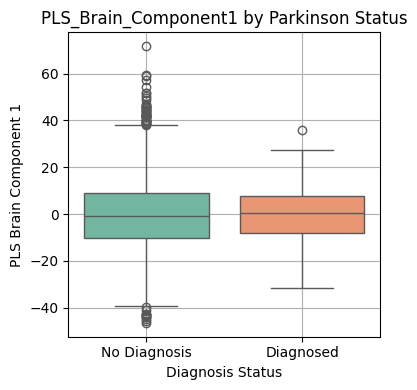

In [149]:

disease_to_plot = "parkinson"
component_col = "PLS_Brain_Component1"

plot_df = Brain_pheno_filtered[[component_col, disease_to_plot]].copy()
plot_df[disease_to_plot] = plot_df[disease_to_plot].map({0: "No Diagnosis", 1: "Diagnosed"})

plt.figure(figsize=(4, 4))
sns.boxplot(x=disease_to_plot, y=component_col, data=plot_df, palette="Set2")
plt.title(f"PLS_Brain_Component1 by {disease_to_plot.capitalize()} Status")
plt.ylabel("PLS Brain Component 1")
plt.xlabel("Diagnosis Status")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Romina\AppData\Local\Temp\ipykernel_34364\3825480113.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=disease, y=component_col, data=plot_df, palette="Set2", ax=ax)
C:\Users\Romina\AppData\Local\Temp\ipykernel_34364\3825480113.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=disease, y=component_col, data=plot_df, palette="Set2", ax=ax)
C:\Users\Romina\AppData\Local\Temp\ipykernel_34364\3825480113.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=disease, y=component_col, data=plot_df, palette="Set2", ax=ax)
C:\User

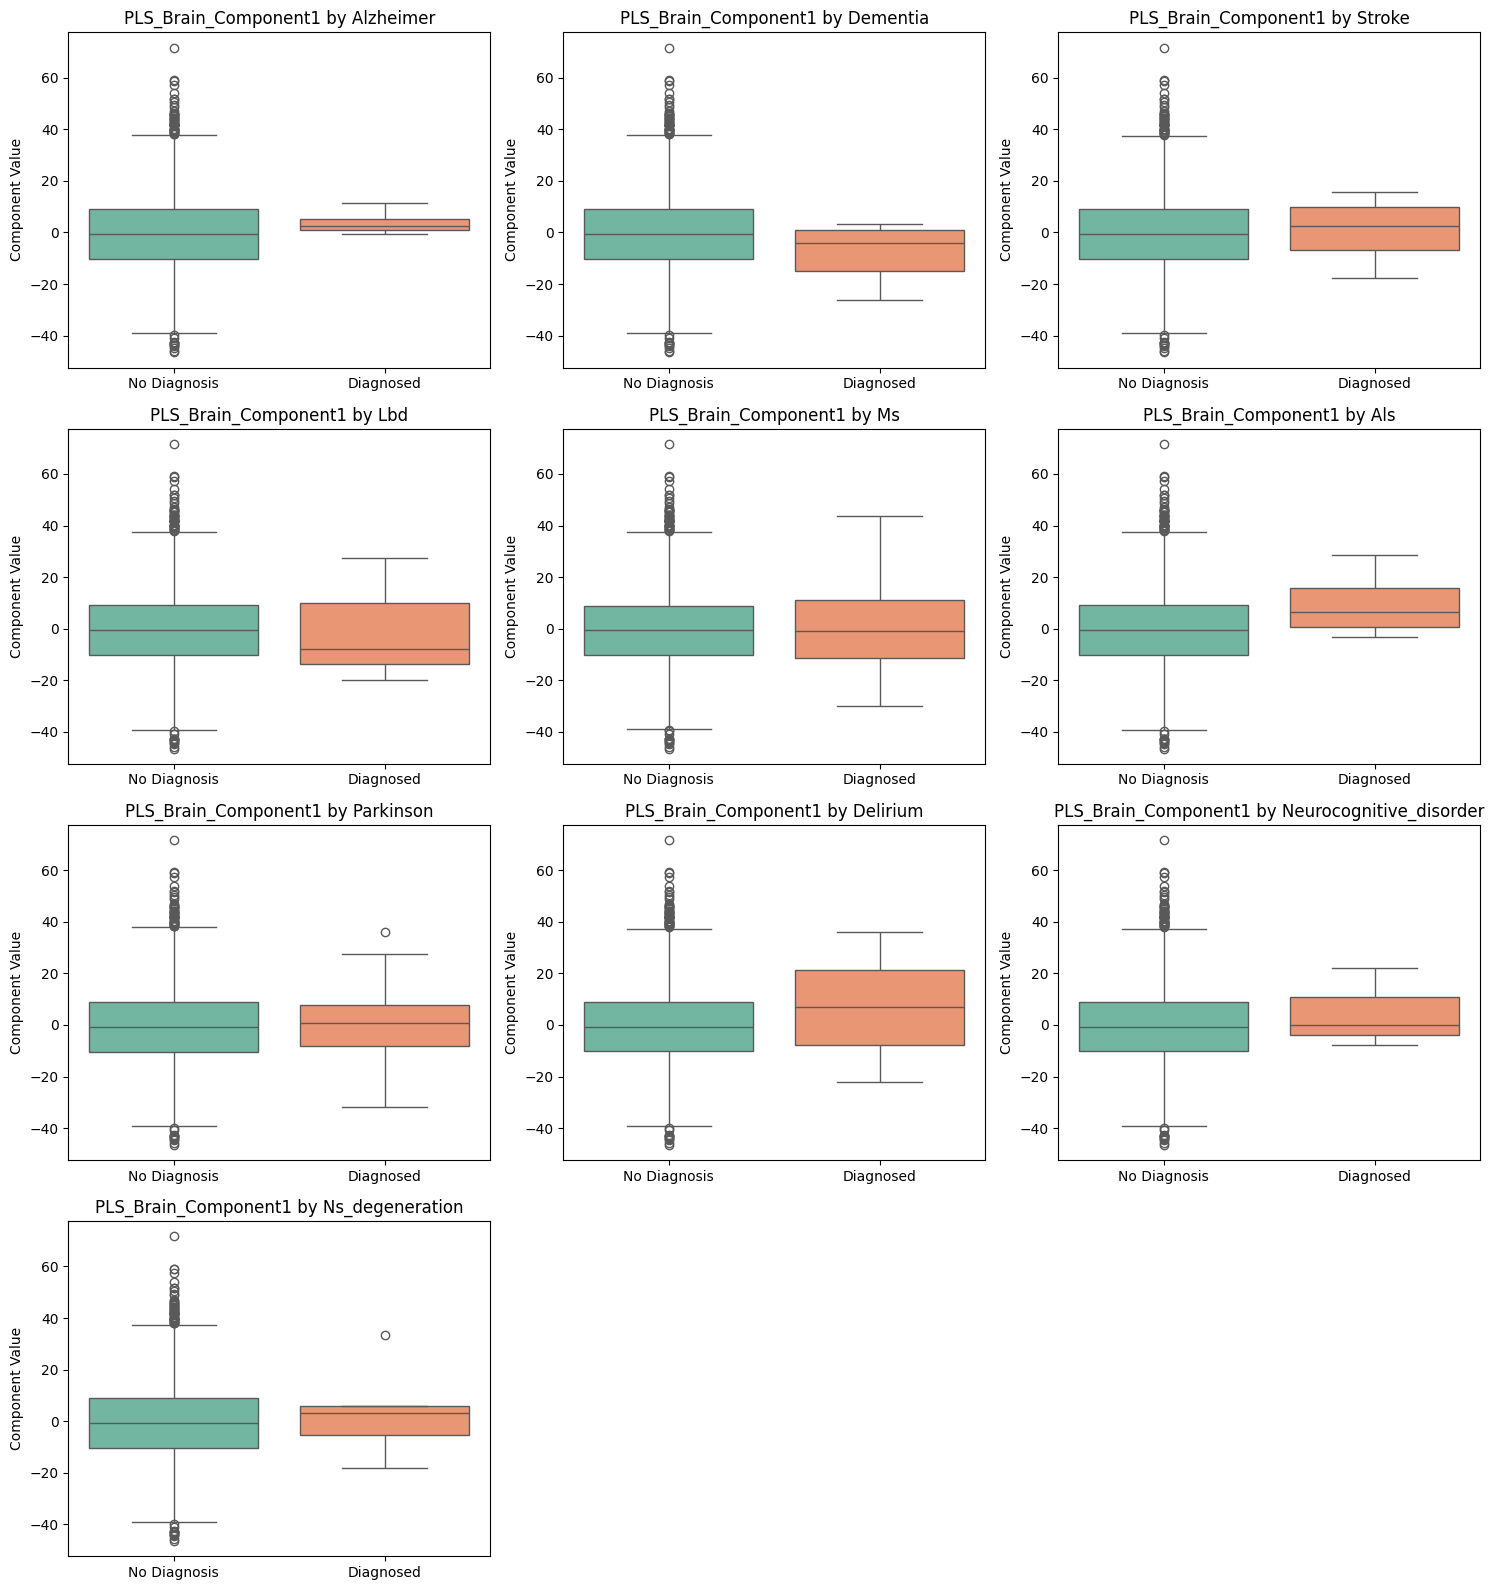

In [191]:
diseases = ["alzheimer", "dementia", "stroke", "lbd", "ms", "als", 
            "parkinson", "delirium", "neurocognitive_disorder", "ns_degeneration"]

component_col = "PLS_Brain_Component1"

n_cols = 3
n_rows = (len(diseases) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, disease in enumerate(diseases):
    ax = axes[i]
    plot_df = Brain_pheno_filtered[[component_col, disease]].dropna().copy()
    plot_df[disease] = plot_df[disease].map({0: "No Diagnosis", 1: "Diagnosed"})

    sns.boxplot(x=disease, y=component_col, data=plot_df, palette="Set2", ax=ax)
    ax.set_title(f"{component_col} by {disease.capitalize()}")
    ax.set_xlabel("")
    ax.set_ylabel("Component Value")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [198]:
print(Brain_pheno_filtered.columns.tolist())

['eid', 'Sex', 'Ethnic_background', 'Age_at_recruitment', 'Diagnoses_main_ICD10', 'Diagnoses_main_ICD10_1', 'Diagnoses_main_ICD10_2', 'Diagnoses_main_ICD10_3', 'Diagnoses_main_ICD10_4', 'Diagnoses_main_ICD10_5', 'Diagnoses_main_ICD10_6', 'Diagnoses_main_ICD10_7', 'Diagnoses_main_ICD10_8', 'Diagnoses_main_ICD10_9', 'Diagnoses_main_ICD10_10', 'Diagnoses_main_ICD10_11', 'Diagnoses_main_ICD10_12', 'Diagnoses_main_ICD10_13', 'Diagnoses_main_ICD10_14', 'Diagnoses_main_ICD10_15', 'Diagnoses_main_ICD10_16', 'Diagnoses_main_ICD10_17', 'Diagnoses_main_ICD10_18', 'Diagnoses_main_ICD10_19', 'Diagnoses_main_ICD10_20', 'Diagnoses_main_ICD10_21', 'Diagnoses_main_ICD10_22', 'Diagnoses_main_ICD10_23', 'Diagnoses_main_ICD10_24', 'Diagnoses_main_ICD10_25', 'Diagnoses_main_ICD10_26', 'Diagnoses_main_ICD10_27', 'Diagnoses_main_ICD10_28', 'Diagnoses_main_ICD10_29', 'Diagnoses_main_ICD10_30', 'Diagnoses_main_ICD10_31', 'Diagnoses_main_ICD10_32', 'Diagnoses_main_ICD10_33', 'Diagnoses_main_ICD10_34', 'Diagnose

In [53]:
brain_region_cols = [col for col in Brain_pheno_filtered.columns if "Mean_Thickness_" in col]

# Covariates to adjust for
covariates = ["Age_at_recruitment", "Sex"]

# Define which PLS component to analyze
pls_component_col = "PLS_Brain_Component1"

# Initialize dictionaries to store results
t_values_pls = {}
p_values_pls = {}

# Perform OLS for each brain region
for brain_region in brain_region_cols:
    if brain_region not in Brain_pheno_filtered.columns:
        continue

    X = Brain_pheno_filtered[[pls_component_col] + covariates].copy()
    y = Brain_pheno_filtered[brain_region].copy()

    X = sm.add_constant(X)  # Add intercept
    model = sm.OLS(y, X, missing="drop").fit()

    t_values_pls[brain_region] = model.tvalues[pls_component_col]
    p_values_pls[brain_region] = model.pvalues[pls_component_col]

# Convert results to DataFrames
t_values_pls_df = pd.DataFrame(t_values_pls, index=[pls_component_col])
p_values_pls_df = pd.DataFrame(p_values_pls, index=[pls_component_col])

# Combine for export
t_values_pls_df.columns = [f"T-Value_{col}" for col in t_values_pls_df.columns]
p_values_pls_df.columns = [f"P-Value_{col}" for col in p_values_pls_df.columns]

combined_results_pls = pd.concat([t_values_pls_df, p_values_pls_df], axis=1)

# combined_results_pls.to_csv("PLS_Component1_vs_Brain_Thickness.csv")
combined_results_pls

,T-Value_Mean_Thickness_CaudalAnteriorCingulate_Left_Hemisphere,T-Value_Mean_Thickness_CaudalMiddleFrontal_Left_Hemisphere,T-Value_Mean_Thickness_Cuneus_Left_Hemisphere,T-Value_Mean_Thickness_Entorhinal_Left_Hemisphere,T-Value_Mean_Thickness_Fusiform_Left_Hemisphere,T-Value_Mean_Thickness_InferiorParietal_Left_Hemisphere,T-Value_Mean_Thickness_InferiorTemporal_Left_Hemisphere,T-Value_Mean_Thickness_IsthmusCingulate_Left_Hemisphere,T-Value_Mean_Thickness_LateralOccipital_Left_Hemisphere,T-Value_Mean_Thickness_LateralOrbitoFrontal_Left_Hemisphere,...,P-Value_Mean_Thickness_Precentral_Right_Hemisphere,P-Value_Mean_Thickness_Precuneus_Right_Hemisphere,P-Value_Mean_Thickness_RostralAnteriorCingulate_Right_Hemisphere,P-Value_Mean_Thickness_RostralMiddleFrontal_Right_Hemisphere,P-Value_Mean_Thickness_SuperiorFrontal_Right_Hemisphere,P-Value_Mean_Thickness_SuperiorParietal_Right_Hemisphere,P-Value_Mean_Thickness_SuperiorTemporal_Right_Hemisphere,P-Value_Mean_Thickness_Supramarginal_Right_Hemisphere,P-Value_Mean_Thickness_TransverseTemporal_Right_Hemisphere,P-Value_Mean_Thickness_Insula_Right_Hemisphere
PLS_Brain_Component1,0.765691,-1.614127,-0.746731,-0.562145,-1.864748,-3.104273,-1.033004,-0.334406,-0.948825,-2.266118,...,0.006811,0.032093,0.544963,0.139718,0.16731,0.006338,0.003224,0.032097,0.320474,0.020733


In [55]:
combined_results_pls.to_csv("PLS_Component1_vs_Brain_Thickness.csv")

In [ ]:

t_values = combined_results_pls.iloc[0]
t_values = combined_results_pls.iloc[0]  
plt.figure(figsize=(40, 15)) 
x_positions = range(len(t_values))
plt.bar(t_values.index, t_values.values, color='skyblue')  

plt.ylabel("T-Values")      
plt.xticks(x_positions, rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

In [131]:
# Mapping from your column names to ggseg Desikan-Killiany atlas names
cortical_mapping = {
    "T-Value_Mean_Thickness_CaudalAnteriorCingulate_Left_Hemisphere": "caudalanteriorcingulate_left",
    "T-Value_Mean_Thickness_CaudalMiddleFrontal_Left_Hemisphere": "caudalmiddlefrontal_left",
    "T-Value_Mean_Thickness_Cuneus_Left_Hemisphere": "cuneus_left",
    "T-Value_Mean_Thickness_Entorhinal_Left_Hemisphere": "entorhinal_left",
    "T-Value_Mean_Thickness_Fusiform_Left_Hemisphere": "fusiform_left",
    "T-Value_Mean_Thickness_InferiorParietal_Left_Hemisphere": "inferiorparietal_left",
    "T-Value_Mean_Thickness_InferiorTemporal_Left_Hemisphere": "inferiortemporal_left",
    "T-Value_Mean_Thickness_IsthmusCingulate_Left_Hemisphere": "isthmuscingulate_left",
    "T-Value_Mean_Thickness_LateralOccipital_Left_Hemisphere": "lateraloccipital_left",
    "T-Value_Mean_Thickness_LateralOrbitoFrontal_Left_Hemisphere": "lateralorbitofrontal_left",
    "T-Value_Mean_Thickness_Lingual_Left_Hemisphere": "lingual_left",
    "T-Value_Mean_Thickness_MedialOrbitoFrontal_Left_Hemisphere": "medialorbitofrontal_left",
    "T-Value_Mean_Thickness_MiddleTemporal_Left_Hemisphere": "middletemporal_left",
    "T-Value_Mean_Thickness_Parahippocampal_Left_Hemisphere": "parahippocampal_left",
    "T-Value_Mean_Thickness_Paracentral_Left_Hemisphere": "paracentral_left",
    "T-Value_Mean_Thickness_ParsOpercularis_Left_Hemisphere": "parsopercularis_left",
    "T-Value_Mean_Thickness_ParsOrbitalis_Left_Hemisphere": "parsorbitalis_left",
    "T-Value_Mean_Thickness_ParsTriangularis_Left_Hemisphere": "parstriangularis_left",
    "T-Value_Mean_Thickness_Pericalcarine_Left_Hemisphere": "pericalcarine_left",
    "T-Value_Mean_Thickness_Postcentral_Left_Hemisphere": "postcentral_left",
    "T-Value_Mean_Thickness_PosteriorCingulate_Left_Hemisphere": "posteriorcingulate_left",
    "T-Value_Mean_Thickness_Precentral_Left_Hemisphere": "precentral_left",
    "T-Value_Mean_Thickness_Precuneus_Left_Hemisphere": "precuneus_left",
    "T-Value_Mean_Thickness_RostralAnteriorCingulate_Left_Hemisphere": "rostralanteriorcingulate_left",
    "T-Value_Mean_Thickness_RostralMiddleFrontal_Left_Hemisphere": "rostralmiddlefrontal_left",
    "T-Value_Mean_Thickness_SuperiorFrontal_Left_Hemisphere": "superiorfrontal_left",
    "T-Value_Mean_Thickness_SuperiorParietal_Left_Hemisphere": "superiorparietal_left",
    "T-Value_Mean_Thickness_SuperiorTemporal_Left_Hemisphere": "superiortemporal_left",
    "T-Value_Mean_Thickness_Supramarginal_Left_Hemisphere": "supramarginal_left",
    "T-Value_Mean_Thickness_TransverseTemporal_Left_Hemisphere": "transversetemporal_left",
    "T-Value_Mean_Thickness_Insula_Left_Hemisphere": "insula_left",
    
    "T-Value_Mean_Thickness_CaudalAnteriorCingulate_Right_Hemisphere": "caudalanteriorcingulate_right",
    "T-Value_Mean_Thickness_CaudalMiddleFrontal_Right_Hemisphere": "caudalmiddlefrontal_right",
    "T-Value_Mean_Thickness_Cuneus_Right_Hemisphere": "cuneus_right",
    "T-Value_Mean_Thickness_Entorhinal_Right_Hemisphere": "entorhinal_right",
    "T-Value_Mean_Thickness_Fusiform_Right_Hemisphere": "fusiform_right",
    "T-Value_Mean_Thickness_InferiorParietal_Right_Hemisphere": "inferiorparietal_right",
    "T-Value_Mean_Thickness_InferiorTemporal_Right_Hemisphere": "inferiortemporal_right",
    "T-Value_Mean_Thickness_IsthmusCingulate_Right_Hemisphere": "isthmuscingulate_right",
    "T-Value_Mean_Thickness_LateralOccipital_Right_Hemisphere": "lateraloccipital_right",
    "T-Value_Mean_Thickness_LateralOrbitoFrontal_Right_Hemisphere": "lateralorbitofrontal_right",
    "T-Value_Mean_Thickness_Lingual_Right_Hemisphere": "lingual_right",
    "T-Value_Mean_Thickness_MedialOrbitoFrontal_Right_Hemisphere": "medialorbitofrontal_right",
    "T-Value_Mean_Thickness_MiddleTemporal_Right_Hemisphere": "middletemporal_right",
    "T-Value_Mean_Thickness_Parahippocampal_Right_Hemisphere": "parahippocampal_right",
    "T-Value_Mean_Thickness_Paracentral_Right_Hemisphere": "paracentral_right",
    "T-Value_Mean_Thickness_ParsOpercularis_Right_Hemisphere": "parsopercularis_right",
    "T-Value_Mean_Thickness_ParsOrbitalis_Right_Hemisphere": "parsorbitalis_right",
    "T-Value_Mean_Thickness_ParsTriangularis_Right_Hemisphere": "parstriangularis_right",
    "T-Value_Mean_Thickness_Pericalcarine_Right_Hemisphere": "pericalcarine_right",
    "T-Value_Mean_Thickness_Postcentral_Right_Hemisphere": "postcentral_right",
    "T-Value_Mean_Thickness_PosteriorCingulate_Right_Hemisphere": "posteriorcingulate_right",
    "T-Value_Mean_Thickness_Precentral_Right_Hemisphere": "precentral_right",
    "T-Value_Mean_Thickness_Precuneus_Right_Hemisphere": "precuneus_right",
    "T-Value_Mean_Thickness_RostralAnteriorCingulate_Right_Hemisphere": "rostralanteriorcingulate_right",
    "T-Value_Mean_Thickness_RostralMiddleFrontal_Right_Hemisphere": "rostralmiddlefrontal_right",
    "T-Value_Mean_Thickness_SuperiorFrontal_Right_Hemisphere": "superiorfrontal_right",
    "T-Value_Mean_Thickness_SuperiorParietal_Right_Hemisphere": "superiorparietal_right",
    "T-Value_Mean_Thickness_SuperiorTemporal_Right_Hemisphere": "superiortemporal_right",
    "T-Value_Mean_Thickness_Supramarginal_Right_Hemisphere": "supramarginal_right",
    "T-Value_Mean_Thickness_TransverseTemporal_Right_Hemisphere": "transversetemporal_right",
    "T-Value_Mean_Thickness_Insula_Right_Hemisphere": "insula_right",
}


Processing PLS_Brain_Component1: Extracted 62 valid T-values


<Figure size 800x800 with 0 Axes>

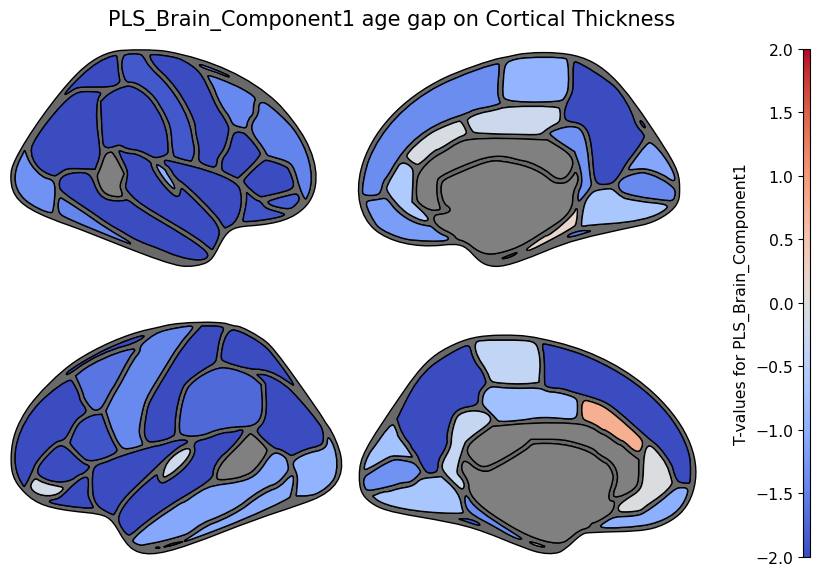

In [62]:
brain_region_columns = [col for col in combined_results_pls.columns if "Mean_Thickness_" in col]
for organ in combined_results_pls.index:
    
 
    t_values_dict = {
        cortical_mapping[col]: combined_results_pls.loc[organ, col]
        for col in brain_region_columns if col in cortical_mapping  
    }

   
    t_values_dict = {k: v for k, v in t_values_dict.items() if not pd.isna(v)}

    if not t_values_dict:
        continue

    
    print(f"Processing {organ}: Extracted {len(t_values_dict)} valid T-values")

    import ggseg
    plt.figure(figsize=(8, 8))
    ggseg.plot_dk(
        t_values_dict, cmap="coolwarm", figsize=(8, 8), background="white", 
        edgecolor="black", bordercolor="dimgray", ylabel=f"T-values for {organ}", 
        title=f"{organ} age gap on Cortical Thickness", vminmax=[-2, 2]
    )
    plt.show()

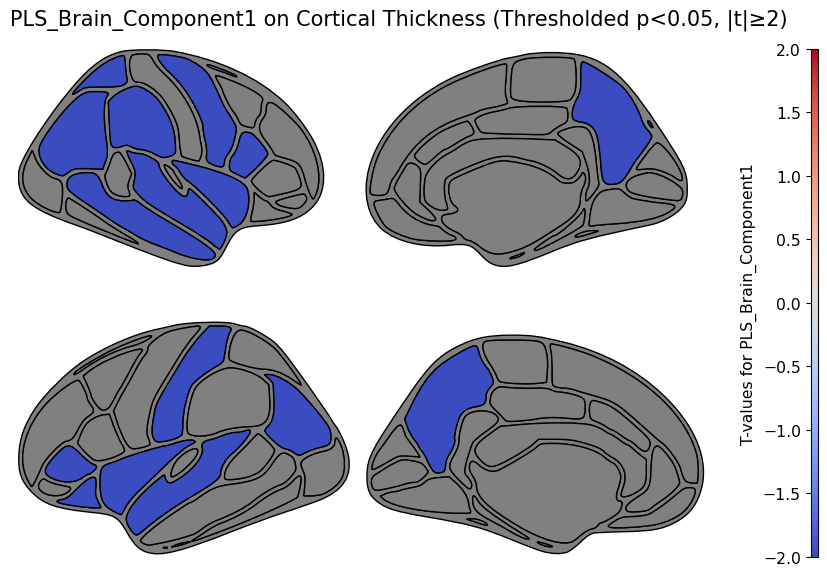

In [134]:
t_values_thresholded_pls = combined_results_pls.copy()

# Apply significance threshold (p < 0.05) and T-value threshold (|t| ≥ 3)
for organ in combined_results_pls.index:
    for region in combined_results_pls.columns:
        p_value = float(combined_results_pls.loc[organ, region])
        t_value = float(combined_results_pls.loc[organ, region])
        if p_value >= 0.05 or abs(t_value) < 2:
            t_values_thresholded_pls.loc[organ, region] = 0


for organ in t_values_thresholded_pls.index:
    t_values_dict = {
        cortical_mapping[col]: t_values_thresholded_pls.loc[organ, col]
        for col in t_values_thresholded_pls.columns if col in cortical_mapping
    }
    t_values_dict = {k: v for k, v in t_values_dict.items() if v != 0}

    if t_values_dict:
        ggseg.plot_dk(
            t_values_dict, cmap="coolwarm", figsize=(8, 8), background="white",
            edgecolor="black", bordercolor="gray", ylabel=f"T-values for {organ}",
            title=f"{organ} on Cortical Thickness (Thresholded p<0.05, |t|≥2)",
            vminmax= [-2, 2]
        )


Immune (shard participants with imaging)

In [65]:

t_test_results_df = pd.DataFrame({
    't_stat': {
        ('PLS_Brain_Component1', 'alzheimer'): 0.545891,
        ('PLS_Brain_Component1', 'dementia'): -1.266575,
        ('PLS_Brain_Component1', 'stroke'): 0.392920,
        ('PLS_Brain_Component1', 'lbd'): 0.022849,
        ('PLS_Brain_Component1', 'ms'): 0.235189,
        ('PLS_Brain_Component1', 'als'): 1.338713,
        ('PLS_Brain_Component1', 'parkinson'): 0.158256,
        ('PLS_Brain_Component1', 'delirium'): 0.682329,
        ('PLS_Brain_Component1', 'neurocognitive_disorder'): 0.582581,
        ('PLS_Brain_Component1', 'ns_degeneration'): 0.612560
    },
    'p_value': {
        ('PLS_Brain_Component1', 'alzheimer'): 0.585167,
        ('PLS_Brain_Component1', 'dementia'): 0.205370,
        ('PLS_Brain_Component1', 'stroke'): 0.694396,
        ('PLS_Brain_Component1', 'lbd'): 0.981772,
        ('PLS_Brain_Component1', 'ms'): 0.814072,
        ('PLS_Brain_Component1', 'als'): 0.180729,
        ('PLS_Brain_Component1', 'parkinson'): 0.874262,
        ('PLS_Brain_Component1', 'delirium'): 0.495064,
        ('PLS_Brain_Component1', 'neurocognitive_disorder'): 0.560203,
        ('PLS_Brain_Component1', 'ns_degeneration'): 0.540197
    }
})

# Reformat the DataFrame for easier plotting
summary_df = t_test_results_df.reset_index()
summary_df.columns = ['Component', 'Diagnosis', 't_stat', 'p_value']

# Add significance and direction columns
summary_df['Significant (p < 0.05)'] = summary_df['p_value'] < 0.05
summary_df['Direction'] = summary_df['t_stat'].apply(lambda x: 'Higher in diagnosed' if x > 0 else 'Lower in diagnosed')

# Display the summary table
summary_df


,Component,Diagnosis,t_stat,p_value,Significant (p < 0.05),Direction
0,PLS_Brain_Component1,alzheimer,0.545891,0.585167,False,Higher in diagnosed
1,PLS_Brain_Component1,dementia,-1.266575,0.205370,False,Lower in diagnosed
2,PLS_Brain_Component1,stroke,0.392920,0.694396,False,Higher in diagnosed
3,PLS_Brain_Component1,lbd,0.022849,0.981772,False,Higher in diagnosed
4,PLS_Brain_Component1,ms,0.235189,0.814072,False,Higher in diagnosed
5,PLS_Brain_Component1,als,1.338713,0.180729,False,Higher in diagnosed
6,PLS_Brain_Component1,parkinson,0.158256,0.874262,False,Higher in diagnosed
7,PLS_Brain_Component1,delirium,0.682329,0.495064,False,Higher in diagnosed
8,PLS_Brain_Component1,neurocognitive_disorder,0.582581,0.560203,False,Higher in diagnosed
9,PLS_Brain_Component1,ns_degeneration,0.612560,0.540197,False,Higher in diagnosed


In [115]:
pls_scores = pls_model.transform(X_immune_clean)

In [116]:
Immune_pheno = Immune_pheno.loc[X_immune_clean.index].copy() 
Immune_pheno["PLS_Immune_Component1"] = pls_scores[:, 0]

In [117]:
# Binary columns for each diseases 
for disease, codes in icd10_codes_mapping.items():
    column_name = disease.lower() 
    Immune_pheno[column_name] = Immune_pheno.apply(lambda row: check_diagnosis(row, codes, all_diagnosis_columns), axis=1)

In [118]:
disease_columns = ['alzheimer', 'dementia', 'stroke', 'lbd', 'ms', 'als', 'parkinson', 'delirium', 'neurocognitive_disorder', 'ns_degeneration']
for disease in disease_columns:
    total = Immune_pheno[disease].sum()
    print(f"participants diagnosed with {disease.capitalize()}: {total}")

participants diagnosed with Alzheimer: 4
participants diagnosed with Dementia: 6
participants diagnosed with Stroke: 16
participants diagnosed with Lbd: 3
participants diagnosed with Ms: 82
participants diagnosed with Als: 4
participants diagnosed with Parkinson: 54
participants diagnosed with Delirium: 2
participants diagnosed with Neurocognitive_disorder: 3
participants diagnosed with Ns_degeneration: 5


In [119]:
pls_columns = ["PLS_Immune_Component1"]

diagnosis_columns = ["alzheimer", "dementia", "stroke", "lbd", "ms", "als", "parkinson", "delirium", "neurocognitive_disorder", "ns_degeneration"]

In [120]:
t_test_results = {}

for pls in pls_columns:
    for diagnosis in diagnosis_columns:
        if pls not in Immune_pheno.columns or diagnosis not in Brain_pheno_filtered.columns:
            print(f"Skipping {pls} or {diagnosis} because it's missing from dataset.")
            continue
        
        diagnosed_group = Immune_pheno[Immune_pheno[diagnosis] == 1][pls].dropna()
        non_diagnosed_group = Immune_pheno[Immune_pheno[diagnosis] == 0][pls].dropna()
        
        
        t_stat, p_value = ttest_ind(diagnosed_group, non_diagnosed_group, nan_policy='omit')
        
        t_test_results[(pls, diagnosis)] = {"t_stat": t_stat, "p_value": p_value}
t_test_results_df = pd.DataFrame.from_dict(t_test_results, orient='index')

In [121]:
t_test_results_df

t_stat   p_value
PLS_Immune_Component1 alzheimer                0.537058  0.591254
                      dementia                -1.276298  0.201915
                      stroke                   0.375646  0.707197
                      lbd                      0.015459  0.987667
                      ms                       0.153690  0.877861
                      als                      1.329425  0.183774
                      parkinson                0.126715  0.899171
                      delirium                 0.675911  0.499131
                      neurocognitive_disorder  0.574868  0.565409
                      ns_degeneration          0.602683  0.546749

all possible participants

In [277]:
pls_scores = pls_model.transform(X_immune_all_clean)

In [278]:
Immune_pheno = Immune_pheno.loc[X_immune_all_clean.index].copy() 
Immune_pheno["PLS_Immune_all_Component1"] = pls_scores[:, 0]

In [279]:
# Binary columns for each diseases 
for disease, codes in icd10_codes_mapping.items():
    column_name = disease.lower() 
    Immune_pheno[column_name] = Immune_pheno.apply(lambda row: check_diagnosis(row, codes, all_diagnosis_columns), axis=1)

In [280]:
disease_columns = ['alzheimer', 'dementia', 'stroke', 'lbd', 'ms', 'als', 'parkinson', 'delirium', 'neurocognitive_disorder', 'ns_degeneration']
for disease in disease_columns:
    total = Immune_pheno[disease].sum()
    print(f"participants diagnosed with {disease.capitalize()}: {total}")

participants diagnosed with Alzheimer: 534
participants diagnosed with Dementia: 727
participants diagnosed with Stroke: 382
participants diagnosed with Lbd: 108
participants diagnosed with Ms: 329
participants diagnosed with Als: 235
participants diagnosed with Parkinson: 722
participants diagnosed with Delirium: 176
participants diagnosed with Neurocognitive_disorder: 114
participants diagnosed with Ns_degeneration: 234


In [281]:
pls_columns = ["PLS_Immune_all_Component1"]

diagnosis_columns = ["alzheimer", "dementia", "stroke", "lbd", "ms", "als", "parkinson", "delirium", "neurocognitive_disorder", "ns_degeneration"]

In [282]:
t_test_results = {}

for pls in pls_columns:
    for diagnosis in diagnosis_columns:
        if pls not in Immune_pheno.columns or diagnosis not in Brain_pheno_filtered.columns:
            print(f"Skipping {pls} or {diagnosis} because it's missing from dataset.")
            continue
        
        diagnosed_group = Immune_pheno[Immune_pheno[diagnosis] == 1][pls].dropna()
        non_diagnosed_group = Immune_pheno[Immune_pheno[diagnosis] == 0][pls].dropna()
        
        
        t_stat, p_value = ttest_ind(diagnosed_group, non_diagnosed_group, nan_policy='omit')
        
        t_test_results[(pls, diagnosis)] = {"t_stat": t_stat, "p_value": p_value}
t_test_results_df = pd.DataFrame.from_dict(t_test_results, orient='index')

In [283]:
t_test_results_df

t_stat       p_value
PLS_Immune_all_Component1 alzheimer                2.795604  5.182752e-03
                          dementia                 4.106793  4.019871e-05
                          stroke                   6.616939  3.713275e-11
                          lbd                      1.508699  1.313835e-01
                          ms                      -0.574253  5.658002e-01
                          als                      2.344538  1.905555e-02
                          parkinson                2.216067  2.669255e-02
                          delirium                 1.980310  4.767556e-02
                          neurocognitive_disorder  3.848186  1.191803e-04
                          ns_degeneration          4.202381  2.646943e-05

C:\Users\Romina\AppData\Local\Temp\ipykernel_34364\856846622.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=disease, y=component_col, data=plot_df, palette="Set2", ax=ax)
C:\Users\Romina\AppData\Local\Temp\ipykernel_34364\856846622.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=disease, y=component_col, data=plot_df, palette="Set2", ax=ax)
C:\Users\Romina\AppData\Local\Temp\ipykernel_34364\856846622.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=disease, y=component_col, data=plot_df, palette="Set2", ax=ax)
C:\Users\R

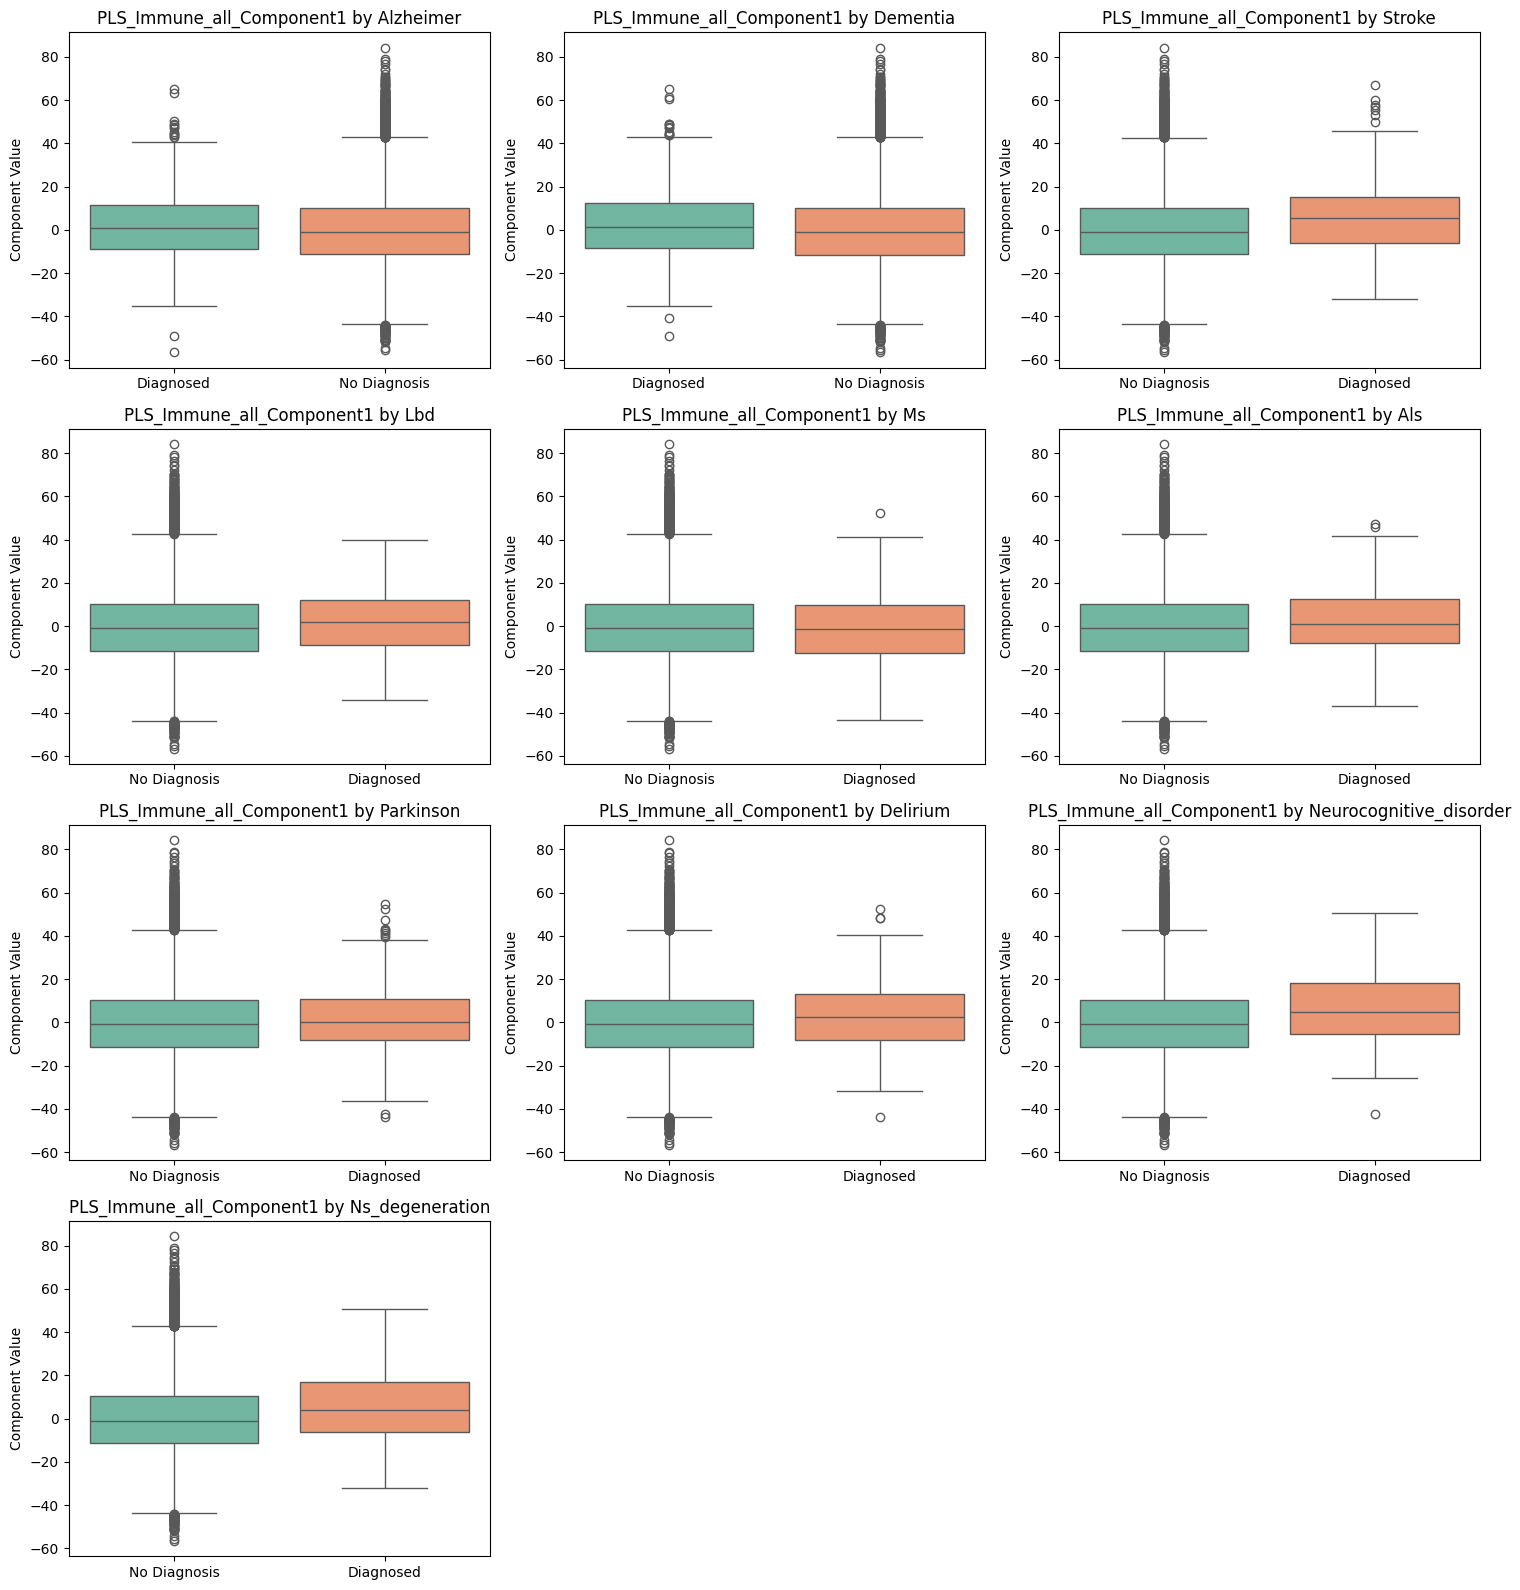

In [284]:
diseases = ["alzheimer", "dementia", "stroke", "lbd", "ms", "als", 
            "parkinson", "delirium", "neurocognitive_disorder", "ns_degeneration"]

component_col = "PLS_Immune_all_Component1"

n_cols = 3
n_rows = (len(diseases) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, disease in enumerate(diseases):
    ax = axes[i]
    plot_df = Immune_pheno[[component_col, disease]].dropna().copy()
    plot_df[disease] = plot_df[disease].map({0: "No Diagnosis", 1: "Diagnosed"})

    sns.boxplot(x=disease, y=component_col, data=plot_df, palette="Set2", ax=ax)
    ax.set_title(f"{component_col} by {disease.capitalize()}")
    ax.set_xlabel("")
    ax.set_ylabel("Component Value")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [254]:
Immune_pheno

,eid,Sex,Ethnic_background,Age_at_recruitment,Diagnoses_main_ICD10,Diagnoses_main_ICD10_1,Diagnoses_main_ICD10_2,Diagnoses_main_ICD10_3,Diagnoses_main_ICD10_4,Diagnoses_main_ICD10_5,...,alzheimer,dementia,stroke,lbd,ms,als,parkinson,delirium,neurocognitive_disorder,ns_degeneration
1,1000043,1,1001.0,65,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9,1000773,0,1001.0,53,D124,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
15,1001606,1,1001.0,65,K409,K449,K575,Z092,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
33,1003296,0,1001.0,54,N12,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
51,1004899,0,1001.0,54,K30,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41228,4938629,0,1001.0,52,R073,R195,S3200,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
41231,4938712,0,1001.0,43,O16,O701,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
41260,4942598,0,1001.0,43,D123,K635,R073,Z121,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
41265,4942789,0,1001.0,44,L721,Z121,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [127]:
immune_region_cols = [col for col in Immune_pheno.columns if "Mean_Thickness_" in col]

# Covariates to adjust for
covariates = ["Age_at_recruitment", "Sex"]

# Define which PLS component to analyze
pls_component_col = "PLS_Immune_Component1"

# Initialize dictionaries to store results
t_values_immune_pls = {}
p_values_immune_pls = {}

# Perform OLS for each brain region
for immune_region in immune_region_cols:
    if immune_region not in Immune_pheno.columns:
        continue

    X = Immune_pheno[[pls_component_col] + covariates].copy()
    y = Immune_pheno[immune_region].copy()

    X = sm.add_constant(X)  # Add intercept
    model = sm.OLS(y, X, missing="drop").fit()

    t_values_immune_pls[immune_region] = model.tvalues[pls_component_col]
    p_values_immune_pls[immune_region] = model.pvalues[pls_component_col]

# Convert results to DataFrames
t_values_immune_pls_df = pd.DataFrame(t_values_immune_pls, index=[pls_component_col])
p_values_immune_pls_df = pd.DataFrame(p_values_immune_pls, index=[pls_component_col])

# Combine for export
t_values_immune_pls_df.columns = [f"T-Value_{col}" for col in t_values_immune_pls_df.columns]
p_values_immune_pls_df.columns = [f"P-Value_{col}" for col in p_values_immune_pls_df.columns]

Immune_combined_results_pls = pd.concat([t_values_immune_pls_df, p_values_immune_pls_df], axis=1)

Immune_combined_results_pls.to_csv("PLS_Component1_vs_Immune_Thickness.csv")
Immune_combined_results_pls

,T-Value_Mean_Thickness_CaudalAnteriorCingulate_Left_Hemisphere,T-Value_Mean_Thickness_CaudalMiddleFrontal_Left_Hemisphere,T-Value_Mean_Thickness_Cuneus_Left_Hemisphere,T-Value_Mean_Thickness_Entorhinal_Left_Hemisphere,T-Value_Mean_Thickness_Fusiform_Left_Hemisphere,T-Value_Mean_Thickness_InferiorParietal_Left_Hemisphere,T-Value_Mean_Thickness_InferiorTemporal_Left_Hemisphere,T-Value_Mean_Thickness_IsthmusCingulate_Left_Hemisphere,T-Value_Mean_Thickness_LateralOccipital_Left_Hemisphere,T-Value_Mean_Thickness_LateralOrbitoFrontal_Left_Hemisphere,...,P-Value_Mean_Thickness_Precentral_Right_Hemisphere,P-Value_Mean_Thickness_Precuneus_Right_Hemisphere,P-Value_Mean_Thickness_RostralAnteriorCingulate_Right_Hemisphere,P-Value_Mean_Thickness_RostralMiddleFrontal_Right_Hemisphere,P-Value_Mean_Thickness_SuperiorFrontal_Right_Hemisphere,P-Value_Mean_Thickness_SuperiorParietal_Right_Hemisphere,P-Value_Mean_Thickness_SuperiorTemporal_Right_Hemisphere,P-Value_Mean_Thickness_Supramarginal_Right_Hemisphere,P-Value_Mean_Thickness_TransverseTemporal_Right_Hemisphere,P-Value_Mean_Thickness_Insula_Right_Hemisphere
PLS_Immune_Component1,-2.015185,-1.047343,1.41841,-4.297534,-1.883751,-0.191005,-2.565482,-0.388492,1.120471,-2.430741,...,0.046219,0.105932,0.49377,0.644717,0.69808,0.474697,0.000102,0.193473,0.937002,0.018842


Processing PLS_Immune_Component1: Extracted 62 valid T-values


<Figure size 800x800 with 0 Axes>

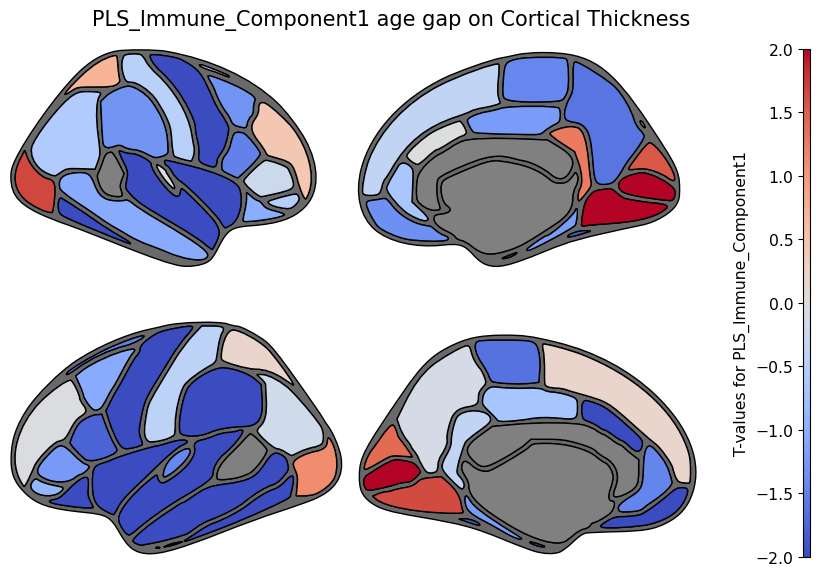

In [128]:
immune_region_columns = [col for col in t_values_immune_pls_df.columns if "Mean_Thickness_" in col]
for organ in t_values_immune_pls_df.index:
    
 
    t_values_immune_dict = {
        cortical_mapping[col]: t_values_immune_pls_df.loc[organ, col]
        for col in immune_region_columns if col in cortical_mapping  
    }

   
    t_values_immune_dict = {k: v for k, v in t_values_immune_dict.items() if not pd.isna(v)}

    if not t_values_immune_dict:
        continue

    
    print(f"Processing {organ}: Extracted {len(t_values_immune_dict)} valid T-values")

    import ggseg
    plt.figure(figsize=(8, 8))
    ggseg.plot_dk(
        t_values_immune_dict, cmap="coolwarm", figsize=(8, 8), background="white", 
        edgecolor="black", bordercolor="dimgray", ylabel=f"T-values for {organ}", 
        title=f"{organ} age gap on Cortical Thickness", vminmax=[-2, 2]
    )
    plt.show()

<Figure size 800x800 with 0 Axes>

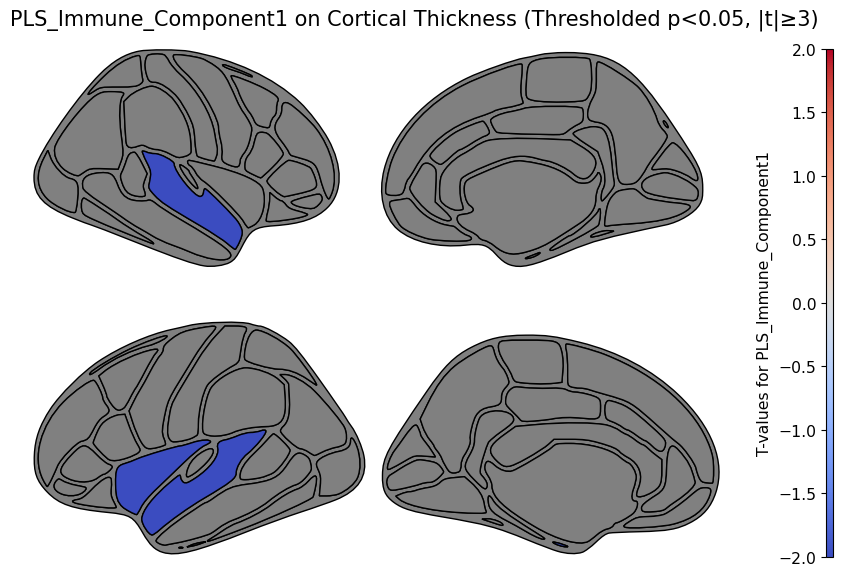

In [137]:
# Apply significance threshold (p < 0.05) and T-value threshold (|t| ≥ 3) to Immune data
t_values_thresholded_immune_pls = t_values_immune_pls_df.copy()

for organ in t_values_immune_pls_df.index:
    for region in t_values_immune_pls_df.columns:
        p_value = t_values_immune_pls_df.loc[organ, region]  # Get p-value from immune data
        t_value = t_values_immune_pls_df.loc[organ, region]  # Get t-value from immune data

        # Apply the thresholding: p-value < 0.05 AND |t-value| ≥ 3
        if p_value >= 0.05 or abs(t_value) < 3:  
            t_values_thresholded_immune_pls.loc[organ, region] = 0  # Set values that don't meet the threshold to zero

# Now plot only the regions that meet the threshold
for organ in t_values_thresholded_immune_pls.index:
    t_values_immune_dict = {
        cortical_mapping[col]: t_values_thresholded_immune_pls.loc[organ, col]
        for col in t_values_thresholded_immune_pls.columns if col in cortical_mapping
    }
    
    # Filter out any regions that are zero after thresholding
    t_values_immune_dict = {k: v for k, v in t_values_immune_dict.items() if v != 0}

    # Only plot if there are valid (non-zero) T-values
    if t_values_immune_dict:
        plt.figure(figsize=(8, 8))
        ggseg.plot_dk(
            t_values_immune_dict, cmap="coolwarm", figsize=(8, 8), background="white", 
            edgecolor="black", bordercolor="gray", ylabel=f"T-values for {organ}", 
            title=f"{organ} on Cortical Thickness (Thresholded p<0.05, |t|≥3)",
            vminmax=[-2, 2]
        )
        plt.show()
